In [0]:
# save the dataset in the files before continuing. 

In [1]:
!pip show tensorflow


Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\pratik moghe\anaconda2\envs\pythoncpu\lib\site-packages
Requires: grpcio, astor, six, termcolor, wheel, opt-einsum, numpy, protobuf, tensorflow-estimator, absl-py, tensorboard, wrapt, google-pasta, keras-preprocessing, keras-applications, gast
Required-by: 


In [2]:
!pip install talos

In [3]:
# LSTM for electricity forecasting problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
# Helper Function
# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# fix random seed for reproducibility
numpy.random.seed(42)

In [0]:
# load the dataset
dataframe = read_csv('/Users/pratik moghe/Documents/final.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [0]:
print(dataset[:10])


[[3689.962]
 [3462.219]
 [3089.361]
 [2777.098]
 [2539.251]
 [2348.379]
 [2162.925]
 [2014.073]
 [1891.656]
 [1813.172]]


In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [0]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [0]:
# reshape into X=t and Y=t+1
look_back = 48
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
trainX[:2]

array([[[0.44517192, 0.40456685, 0.33808872, 0.2824142 , 0.24000764,
         0.2059764 , 0.17291117, 0.14637181, 0.12454566, 0.11055249,
         0.09825933, 0.09205115, 0.0992319 , 0.10687482, 0.11116511,
         0.12622857, 0.13813129, 0.17776644, 0.22705534, 0.28718108,
         0.3614662 , 0.4180936 , 0.48298654, 0.5364871 , 0.5533575 ,
         0.59870887, 0.61694515, 0.61078644, 0.57459414, 0.55255866,
         0.555604  , 0.56142485, 0.60079134, 0.70079577, 0.75462794,
         0.78949857, 0.77214587, 0.76662624, 0.7442137 , 0.7003666 ,
         0.67101955, 0.662133  , 0.6446836 , 0.6293764 , 0.57999694,
         0.53487265, 0.50145745, 0.45074025]],

       [[0.40456685, 0.33808872, 0.2824142 , 0.24000764, 0.2059764 ,
         0.17291117, 0.14637181, 0.12454566, 0.11055249, 0.09825933,
         0.09205115, 0.0992319 , 0.10687482, 0.11116511, 0.12622857,
         0.13813129, 0.17776644, 0.22705534, 0.28718108, 0.3614662 ,
         0.4180936 , 0.48298654, 0.5364871 , 0.5533575 

In [0]:
testX[:2]

array([[[0.33504984, 0.3328893 , 0.3418539 , 0.36403093, 0.39719066,
         0.4226267 , 0.4509708 , 0.4559655 , 0.41780266, 0.3840185 ,
         0.3888786 , 0.4141325 , 0.42492548, 0.4770517 , 0.5130446 ,
         0.47485742, 0.41442224, 0.3478727 , 0.2844821 , 0.21223521,
         0.15017018, 0.10865381, 0.07180822, 0.04721531, 0.03056325,
         0.02269764, 0.01902889, 0.01635486, 0.01416542, 0.01583104,
         0.02186877, 0.0425663 , 0.07608619, 0.10627842, 0.19464922,
         0.28171444, 0.3282934 , 0.31972823, 0.34415123, 0.35488108,
         0.36245784, 0.35523894, 0.35871014, 0.34592238, 0.36394873,
         0.38177237, 0.3674151 , 0.33679858]],

       [[0.3328893 , 0.3418539 , 0.36403093, 0.39719066, 0.4226267 ,
         0.4509708 , 0.4559655 , 0.41780266, 0.3840185 , 0.3888786 ,
         0.4141325 , 0.42492548, 0.4770517 , 0.5130446 , 0.47485742,
         0.41442224, 0.3478727 , 0.2844821 , 0.21223521, 0.15017018,
         0.10865381, 0.07180822, 0.04721531, 0.03056325

In [0]:
# Defining parameters

# Parameters for test runs. 
# p = {
#     'first_neurons': [2],
#     'optimizer': ['adam'], 
#     'epochs': [20],
#     'batch_size': [30, 40]
# }

# Run this for final Round
p = {
    'first_neurons': [2, 4, 8],
    'optimizer': ['adam'], 
    'epochs': [20, 35, 50, 100, 200],
    'batch_size': [1, 2, 4, 6, 8, 10, 20, 40]
}

In [0]:
def lstm_model(trainX, trainY, testX, testY, params):
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(params['first_neurons'] , input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_percentage_error', optimizer=params['optimizer'])
    # train model
    out = model.fit(trainX, trainY, epochs=params['epochs'], batch_size=params['batch_size'], verbose=2)

    return out, model

In [0]:
import talos

In [14]:
scan_object = talos.Scan(x = trainX,
                         y = trainY,
                         model = lstm_model,
                         params = p,
                         experiment_name = 'lstm_hyp_opt')

  0%|                                                                                          | 0/120 [00:00<?, ?it/s]





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





 - 38s - loss: 797.3253
Epoch 2/20
 - 34s - loss: 17955.7680
Epoch 3/20
 - 34s - loss: 2028.1573
Epoch 4/20
 - 32s - loss: 13822.3386
Epoch 5/20
 - 14s - loss: 543.7724
Epoch 6/20
 - 15s - loss: 17333.9563
Epoch 7/20
 - 16s - loss: 676.6652
Epoch 8/20
 - 15s - loss: 16187.6006
Epoch 9/20
 - 15s - loss: 656.4504
Epoch 10/20
 - 16s - loss: 9721.9752
Epoch 11/20
 - 16s - loss: 5182.6286
Epoch 12/20
 - 16s - loss: 11122.6108
Epoch 13/20
 - 16s - loss: 718.4635
Epoch 14/20
 - 16s - loss: 14224.3120
Epoch 15/20
 - 16s - loss: 839.2939
Epoch 16/20
 - 16s - loss: 14503.6473
Epoch 17/20
 - 17s - loss: 802.9355
Epoch 18/20
 - 17s - loss: 14660.8656
Epoch 19/20
 - 17s - loss: 826.6823
Epoch 20/20
 - 17s - loss: 9808.1590




  1%|▋                                                                             | 1/120 [06:39<13:11:28, 399.06s/it]

Epoch 1/20
 - 18s - loss: 352.9306
Epoch 2/20
 - 20s - loss: 17609.1577
Epoch 3/20
 - 17s - loss: 545.4934
Epoch 4/20
 - 16s - loss: 747.2325
Epoch 5/20
 - 15s - loss: 16931.7549
Epoch 6/20
 - 15s - loss: 1054.7299
Epoch 7/20
 - 16s - loss: 6727.5534
Epoch 8/20
 - 17s - loss: 8200.6955
Epoch 9/20
 - 15s - loss: 2334.4724
Epoch 10/20
 - 15s - loss: 2015.3580
Epoch 11/20
 - 16s - loss: 8930.7528
Epoch 12/20
 - 16s - loss: 1156.5004
Epoch 13/20
 - 16s - loss: 14745.1330
Epoch 14/20
 - 15s - loss: 1098.0881
Epoch 15/20
 - 15s - loss: 8730.8180
Epoch 16/20
 - 15s - loss: 2335.4668
Epoch 17/20
 - 16s - loss: 6923.4946
Epoch 18/20
 - 16s - loss: 3883.9445
Epoch 19/20
 - 15s - loss: 551.5324
Epoch 20/20
 - 16s - loss: 12344.8114


  2%|█▎                                                                            | 2/120 [11:59<12:18:35, 375.56s/it]

Epoch 1/20
 - 18s - loss: 1074.4490
Epoch 2/20
 - 17s - loss: 34738.7980
Epoch 3/20
 - 17s - loss: 992.3044
Epoch 4/20
 - 17s - loss: 21923.5839
Epoch 5/20
 - 17s - loss: 1323.5130
Epoch 6/20
 - 17s - loss: 14442.6246
Epoch 7/20
 - 17s - loss: 2456.1403
Epoch 8/20
 - 17s - loss: 677.8243
Epoch 9/20
 - 18s - loss: 492.3383
Epoch 10/20
 - 17s - loss: 5012.2580
Epoch 11/20
 - 17s - loss: 25645.7815
Epoch 12/20
 - 17s - loss: 11014.2537
Epoch 13/20
 - 18s - loss: 2525.3022
Epoch 14/20
 - 17s - loss: 29274.9150
Epoch 15/20
 - 17s - loss: 365.1804
Epoch 16/20
 - 17s - loss: 1334.2969
Epoch 17/20
 - 17s - loss: 35635.4574
Epoch 18/20
 - 17s - loss: 1421.8568
Epoch 19/20
 - 17s - loss: 33081.9971
Epoch 20/20
 - 17s - loss: 5124.4423


  2%|█▉                                                                            | 3/120 [17:46<11:55:10, 366.76s/it]

Epoch 1/35
 - 18s - loss: 1224.8723
Epoch 2/35
 - 17s - loss: 11798.3122
Epoch 3/35
 - 17s - loss: 2874.6183
Epoch 4/35
 - 17s - loss: 5047.8565
Epoch 5/35
 - 17s - loss: 4753.2509
Epoch 6/35
 - 17s - loss: 3212.1540
Epoch 7/35
 - 17s - loss: 1524.6618
Epoch 8/35
 - 17s - loss: 11432.4984
Epoch 9/35
 - 16s - loss: 4100.9806
Epoch 10/35
 - 17s - loss: 8037.9735
Epoch 11/35
 - 17s - loss: 5331.2826
Epoch 12/35
 - 17s - loss: 8106.8927
Epoch 13/35
 - 17s - loss: 4890.6195
Epoch 14/35
 - 17s - loss: 3450.6545
Epoch 15/35
 - 17s - loss: 5266.0257
Epoch 16/35
 - 17s - loss: 3862.6177
Epoch 17/35
 - 17s - loss: 6259.2734
Epoch 18/35
 - 16s - loss: 590.7613
Epoch 19/35
 - 17s - loss: 8272.6270
Epoch 20/35
 - 16s - loss: 1399.2646
Epoch 21/35
 - 17s - loss: 7990.5350
Epoch 22/35
 - 17s - loss: 1660.9682
Epoch 23/35
 - 16s - loss: 7085.5063
Epoch 24/35
 - 16s - loss: 1082.6216
Epoch 25/35
 - 17s - loss: 8299.3162
Epoch 26/35
 - 17s - loss: 1112.9281
Epoch 27/35
 - 17s - loss: 3360.6107
Epoch 28/

  3%|██▌                                                                           | 4/120 [27:34<13:57:55, 433.41s/it]

Epoch 1/35
 - 16s - loss: 1870.1590
Epoch 2/35
 - 15s - loss: 11678.5810
Epoch 3/35
 - 15s - loss: 1082.9495
Epoch 4/35
 - 15s - loss: 9605.9036
Epoch 5/35
 - 15s - loss: 1186.1133
Epoch 6/35
 - 15s - loss: 5527.3661
Epoch 7/35
 - 15s - loss: 1324.2974
Epoch 8/35
 - 15s - loss: 5061.0142
Epoch 9/35
 - 15s - loss: 1798.6774
Epoch 10/35
 - 15s - loss: 1043.2592
Epoch 11/35
 - 15s - loss: 7928.4389
Epoch 12/35
 - 15s - loss: 4477.8120
Epoch 13/35
 - 15s - loss: 3307.5792
Epoch 14/35
 - 15s - loss: 6630.2956
Epoch 15/35
 - 15s - loss: 134.1449
Epoch 16/35
 - 15s - loss: 10582.5621
Epoch 17/35
 - 14s - loss: 621.5489
Epoch 18/35
 - 15s - loss: 7387.7077
Epoch 19/35
 - 15s - loss: 349.3844
Epoch 20/35
 - 15s - loss: 401.3672
Epoch 21/35
 - 15s - loss: 12412.4428
Epoch 22/35
 - 15s - loss: 740.7694
Epoch 23/35
 - 15s - loss: 1833.1895
Epoch 24/35
 - 15s - loss: 10898.2797
Epoch 25/35
 - 15s - loss: 1863.2767
Epoch 26/35
 - 15s - loss: 11519.8228
Epoch 27/35
 - 15s - loss: 1496.9750
Epoch 28/3

  4%|███▎                                                                          | 5/120 [36:14<14:40:27, 459.37s/it]

Epoch 1/35
 - 15s - loss: 2051.9223
Epoch 2/35
 - 14s - loss: 8881.9513
Epoch 3/35
 - 14s - loss: 9207.2982
Epoch 4/35
 - 14s - loss: 5051.5145
Epoch 5/35
 - 14s - loss: 12838.2389
Epoch 6/35
 - 14s - loss: 165.6388
Epoch 7/35
 - 14s - loss: 1199.2021
Epoch 8/35
 - 15s - loss: 326.3601
Epoch 9/35
 - 14s - loss: 826.0139
Epoch 10/35
 - 14s - loss: 1620.1087
Epoch 11/35
 - 14s - loss: 2505.5043
Epoch 12/35
 - 15s - loss: 27030.7944
Epoch 13/35
 - 14s - loss: 1486.3838
Epoch 14/35
 - 15s - loss: 27631.0540
Epoch 15/35
 - 14s - loss: 641.2469
Epoch 16/35
 - 15s - loss: 26924.3457
Epoch 17/35
 - 15s - loss: 1663.2219
Epoch 18/35
 - 14s - loss: 5715.8100
Epoch 19/35
 - 14s - loss: 19261.0286
Epoch 20/35
 - 14s - loss: 4349.7035
Epoch 21/35
 - 15s - loss: 2200.7812
Epoch 22/35
 - 14s - loss: 20321.4873
Epoch 23/35
 - 15s - loss: 2398.7719
Epoch 24/35
 - 14s - loss: 14406.1658
Epoch 25/35
 - 14s - loss: 3137.4249
Epoch 26/35
 - 14s - loss: 2089.0053
Epoch 27/35
 - 16s - loss: 21945.8781
Epoch 

  5%|███▉                                                                          | 6/120 [44:44<15:01:35, 474.52s/it]

Epoch 1/50
 - 17s - loss: 1759.9208
Epoch 2/50
 - 16s - loss: 5879.1047
Epoch 3/50
 - 16s - loss: 4857.5387
Epoch 4/50
 - 16s - loss: 553.7090
Epoch 5/50
 - 16s - loss: 9094.3843
Epoch 6/50
 - 16s - loss: 1145.1842
Epoch 7/50
 - 16s - loss: 5171.9921
Epoch 8/50
 - 16s - loss: 326.1115
Epoch 9/50
 - 16s - loss: 977.6879
Epoch 10/50
 - 17s - loss: 9467.0175
Epoch 11/50
 - 16s - loss: 1646.8570
Epoch 12/50
 - 16s - loss: 9079.2610
Epoch 13/50
 - 16s - loss: 1061.0305
Epoch 14/50
 - 16s - loss: 345.1999
Epoch 15/50
 - 16s - loss: 1196.0382
Epoch 16/50
 - 16s - loss: 14153.5115
Epoch 17/50
 - 16s - loss: 3074.6182
Epoch 18/50
 - 16s - loss: 10412.8002
Epoch 19/50
 - 16s - loss: 7603.4815
Epoch 20/50
 - 16s - loss: 317.2051
Epoch 21/50
 - 16s - loss: 15759.5515
Epoch 22/50
 - 16s - loss: 282.6259
Epoch 23/50
 - 16s - loss: 15355.5055
Epoch 24/50
 - 17s - loss: 443.9596
Epoch 25/50
 - 16s - loss: 13584.9346
Epoch 26/50
 - 16s - loss: 489.7713
Epoch 27/50
 - 16s - loss: 12491.4457
Epoch 28/50


  6%|████▌                                                                         | 7/120 [58:22<18:07:38, 577.51s/it]

Epoch 1/50
 - 17s - loss: 977.1165
Epoch 2/50
 - 16s - loss: 19093.3960
Epoch 3/50
 - 16s - loss: 1130.1843
Epoch 4/50
 - 16s - loss: 10762.0190
Epoch 5/50
 - 16s - loss: 2167.9578
Epoch 6/50
 - 16s - loss: 7530.4429
Epoch 7/50
 - 16s - loss: 2392.1688
Epoch 8/50
 - 16s - loss: 6189.6497
Epoch 9/50
 - 16s - loss: 1424.5457
Epoch 10/50
 - 16s - loss: 12629.4666
Epoch 11/50
 - 16s - loss: 1154.9849
Epoch 12/50
 - 16s - loss: 12880.1191
Epoch 13/50
 - 16s - loss: 1096.9651
Epoch 14/50
 - 16s - loss: 809.5791
Epoch 15/50
 - 16s - loss: 7754.4419
Epoch 16/50
 - 16s - loss: 6229.9105
Epoch 17/50
 - 16s - loss: 9224.9437
Epoch 18/50
 - 16s - loss: 1765.0422
Epoch 19/50
 - 16s - loss: 12148.3501
Epoch 20/50
 - 16s - loss: 2883.1682
Epoch 21/50
 - 16s - loss: 413.8047
Epoch 22/50
 - 16s - loss: 18348.5585
Epoch 23/50
 - 16s - loss: 1991.8373
Epoch 24/50
 - 16s - loss: 15181.6432
Epoch 25/50
 - 16s - loss: 295.1381
Epoch 26/50
 - 16s - loss: 18882.5679
Epoch 27/50
 - 16s - loss: 606.9379
Epoch 2

  7%|█████                                                                       | 8/120 [1:11:50<20:07:01, 646.62s/it]

Epoch 1/50
 - 20s - loss: 1179.7495
Epoch 2/50
 - 21s - loss: 1533.0500
Epoch 3/50
 - 20s - loss: 26985.6305
Epoch 4/50
 - 19s - loss: 1232.8972
Epoch 5/50
 - 24s - loss: 2003.0661
Epoch 6/50
 - 22s - loss: 30885.7769
Epoch 7/50
 - 19s - loss: 589.5666
Epoch 8/50
 - 19s - loss: 1988.7830
Epoch 9/50
 - 21s - loss: 39297.4319
Epoch 10/50
 - 20s - loss: 1947.6213
Epoch 11/50
 - 19s - loss: 37222.7526
Epoch 12/50
 - 19s - loss: 1953.5464
Epoch 13/50
 - 19s - loss: 29622.9428
Epoch 14/50
 - 20s - loss: 4657.3501
Epoch 15/50
 - 19s - loss: 998.3374
Epoch 16/50
 - 22s - loss: 34984.3496
Epoch 17/50
 - 20s - loss: 329.7375
Epoch 18/50
 - 19s - loss: 36033.1866
Epoch 19/50
 - 21s - loss: 139.6823
Epoch 20/50
 - 18s - loss: 28723.3534
Epoch 21/50
 - 18s - loss: 1688.8958
Epoch 22/50
 - 18s - loss: 30004.8594
Epoch 23/50
 - 17s - loss: 496.3681
Epoch 24/50
 - 19s - loss: 31750.6514
Epoch 25/50
 - 17s - loss: 4108.5837
Epoch 26/50
 - 17s - loss: 3815.1690
Epoch 27/50
 - 17s - loss: 28391.7270
Epoc

  8%|█████▋                                                                      | 9/120 [1:26:50<22:17:06, 722.76s/it]

Epoch 1/100
 - 16s - loss: 486.0920
Epoch 2/100
 - 16s - loss: 9989.1123
Epoch 3/100
 - 16s - loss: 1727.0051
Epoch 4/100
 - 15s - loss: 6412.1629
Epoch 5/100
 - 15s - loss: 1661.1662
Epoch 6/100
 - 15s - loss: 3898.2563
Epoch 7/100
 - 16s - loss: 1534.1000
Epoch 8/100
 - 16s - loss: 6716.2242
Epoch 9/100
 - 15s - loss: 1384.8609
Epoch 10/100
 - 15s - loss: 4265.5939
Epoch 11/100
 - 16s - loss: 1362.1888
Epoch 12/100
 - 16s - loss: 398.5399
Epoch 13/100
 - 16s - loss: 8397.3601
Epoch 14/100
 - 16s - loss: 309.3907
Epoch 15/100
 - 16s - loss: 3530.7833
Epoch 16/100
 - 16s - loss: 701.2606
Epoch 17/100
 - 16s - loss: 8540.8537
Epoch 18/100
 - 16s - loss: 824.5548
Epoch 19/100
 - 16s - loss: 7395.3138
Epoch 20/100
 - 16s - loss: 874.3605
Epoch 21/100
 - 16s - loss: 195.9240
Epoch 22/100
 - 16s - loss: 9379.7086
Epoch 23/100
 - 16s - loss: 406.7799
Epoch 24/100
 - 16s - loss: 6934.2924
Epoch 25/100
 - 16s - loss: 484.7822
Epoch 26/100
 - 16s - loss: 699.4859
Epoch 27/100
 - 16s - loss: 120

  8%|██████▎                                                                    | 10/120 [1:53:18<30:00:41, 982.20s/it]

Epoch 1/100
 - 16s - loss: 548.2006
Epoch 2/100
 - 15s - loss: 9221.1126
Epoch 3/100
 - 16s - loss: 7709.2332
Epoch 4/100
 - 16s - loss: 3797.0187
Epoch 5/100
 - 16s - loss: 1662.0816
Epoch 6/100
 - 15s - loss: 192.2808
Epoch 7/100
 - 16s - loss: 857.8074
Epoch 8/100
 - 16s - loss: 7499.3525
Epoch 9/100
 - 16s - loss: 750.6676
Epoch 10/100
 - 16s - loss: 5785.4868
Epoch 11/100
 - 16s - loss: 2607.0903
Epoch 12/100
 - 16s - loss: 704.9138
Epoch 13/100
 - 16s - loss: 7525.9633
Epoch 14/100
 - 16s - loss: 4666.0709
Epoch 15/100
 - 16s - loss: 2298.8346
Epoch 16/100
 - 16s - loss: 7158.9118
Epoch 17/100
 - 16s - loss: 1952.7688
Epoch 18/100
 - 16s - loss: 7089.6355
Epoch 19/100
 - 16s - loss: 846.1960
Epoch 20/100
 - 16s - loss: 5720.6546
Epoch 21/100
 - 16s - loss: 2308.9763
Epoch 22/100
 - 15s - loss: 6498.1854
Epoch 23/100
 - 15s - loss: 933.4105
Epoch 24/100
 - 16s - loss: 5681.6072
Epoch 25/100
 - 16s - loss: 1959.2847
Epoch 26/100
 - 16s - loss: 5878.8752
Epoch 27/100
 - 16s - loss: 

  9%|██████▊                                                                   | 11/120 [2:19:15<34:57:54, 1154.81s/it]

Epoch 1/100
 - 18s - loss: 535.5804
Epoch 2/100
 - 18s - loss: 21762.1684
Epoch 3/100
 - 17s - loss: 976.8938
Epoch 4/100
 - 17s - loss: 124.0884
Epoch 5/100
 - 17s - loss: 19207.5650
Epoch 6/100
 - 17s - loss: 4200.6868
Epoch 7/100
 - 17s - loss: 12014.3763
Epoch 8/100
 - 17s - loss: 5479.4248
Epoch 9/100
 - 17s - loss: 9205.0553
Epoch 10/100
 - 17s - loss: 5904.6531
Epoch 11/100
 - 18s - loss: 2852.8547
Epoch 12/100
 - 18s - loss: 604.4587
Epoch 13/100
 - 17s - loss: 1363.9660
Epoch 14/100
 - 18s - loss: 715.7550
Epoch 15/100
 - 17s - loss: 1054.6341
Epoch 16/100
 - 18s - loss: 28140.9662
Epoch 17/100
 - 17s - loss: 852.7499
Epoch 18/100
 - 18s - loss: 27850.9267
Epoch 19/100
 - 17s - loss: 803.0801
Epoch 20/100
 - 17s - loss: 3367.5012
Epoch 21/100
 - 17s - loss: 1937.7651
Epoch 22/100
 - 18s - loss: 1512.3606
Epoch 23/100
 - 18s - loss: 29571.9546
Epoch 24/100
 - 17s - loss: 600.8804
Epoch 25/100
 - 17s - loss: 31344.5480
Epoch 26/100
 - 17s - loss: 667.8017
Epoch 27/100
 - 18s - l

 10%|███████▍                                                                  | 12/120 [2:48:17<39:55:15, 1330.70s/it]

Epoch 1/200
 - 16s - loss: 1323.2297
Epoch 2/200
 - 15s - loss: 1033.8806
Epoch 3/200
 - 15s - loss: 3084.0176
Epoch 4/200
 - 15s - loss: 722.3317
Epoch 5/200
 - 15s - loss: 1917.0655
Epoch 6/200
 - 15s - loss: 8143.6310
Epoch 7/200
 - 16s - loss: 3881.9079
Epoch 8/200
 - 15s - loss: 426.6697
Epoch 9/200
 - 16s - loss: 10033.3755
Epoch 10/200
 - 16s - loss: 660.0217
Epoch 11/200
 - 16s - loss: 8359.2323
Epoch 12/200
 - 16s - loss: 670.8508
Epoch 13/200
 - 15s - loss: 48.5623
Epoch 14/200
 - 15s - loss: 10330.9279
Epoch 15/200
 - 16s - loss: 43.2441
Epoch 16/200
 - 15s - loss: 12236.9626
Epoch 17/200
 - 16s - loss: 490.8559
Epoch 18/200
 - 16s - loss: 3136.9155
Epoch 19/200
 - 16s - loss: 5149.3352
Epoch 20/200
 - 16s - loss: 4174.1467
Epoch 21/200
 - 16s - loss: 4732.0395
Epoch 22/200
 - 15s - loss: 2866.6939
Epoch 23/200
 - 16s - loss: 4717.0380
Epoch 24/200
 - 16s - loss: 1361.0561
Epoch 25/200
 - 16s - loss: 6354.7992
Epoch 26/200
 - 15s - loss: 209.1576
Epoch 27/200
 - 16s - loss: 

 11%|████████                                                                  | 13/120 [3:41:31<56:10:20, 1889.91s/it]

Epoch 1/200
 - 16s - loss: 380.8812
Epoch 2/200
 - 16s - loss: 12605.4323
Epoch 3/200
 - 16s - loss: 2298.2460
Epoch 4/200
 - 16s - loss: 8884.8410
Epoch 5/200
 - 16s - loss: 1106.7639
Epoch 6/200
 - 16s - loss: 8895.2785
Epoch 7/200
 - 16s - loss: 1065.8151
Epoch 8/200
 - 16s - loss: 5759.0139
Epoch 9/200
 - 16s - loss: 313.1458
Epoch 10/200
 - 18s - loss: 7278.5867
Epoch 11/200
 - 16s - loss: 1371.9942
Epoch 12/200
 - 16s - loss: 852.6691
Epoch 13/200
 - 16s - loss: 1896.1343
Epoch 14/200
 - 16s - loss: 5981.8754
Epoch 15/200
 - 16s - loss: 1129.1209
Epoch 16/200
 - 16s - loss: 1057.2781
Epoch 17/200
 - 16s - loss: 1024.3726
Epoch 18/200
 - 16s - loss: 12660.5587
Epoch 19/200
 - 16s - loss: 4011.9142
Epoch 20/200
 - 16s - loss: 360.7923
Epoch 21/200
 - 16s - loss: 19929.8942
Epoch 22/200
 - 16s - loss: 517.4621
Epoch 23/200
 - 17s - loss: 19650.3362
Epoch 24/200
 - 17s - loss: 556.0437
Epoch 25/200
 - 17s - loss: 18491.4075
Epoch 26/200
 - 17s - loss: 451.8490
Epoch 27/200
 - 16s - l

 12%|████████▋                                                                 | 14/120 [4:35:33<67:35:29, 2295.56s/it]

Epoch 1/200
 - 16s - loss: 200.6981
Epoch 2/200
 - 15s - loss: 21983.9066
Epoch 3/200
 - 15s - loss: 858.0395
Epoch 4/200
 - 16s - loss: 709.3842
Epoch 5/200
 - 16s - loss: 20416.2082
Epoch 6/200
 - 15s - loss: 364.2213
Epoch 7/200
 - 15s - loss: 19437.8526
Epoch 8/200
 - 15s - loss: 606.4004
Epoch 9/200
 - 16s - loss: 18683.7082
Epoch 10/200
 - 15s - loss: 1729.4556
Epoch 11/200
 - 15s - loss: 876.7821
Epoch 12/200
 - 15s - loss: 23006.1867
Epoch 13/200
 - 16s - loss: 784.7882
Epoch 14/200
 - 15s - loss: 935.6640
Epoch 15/200
 - 15s - loss: 972.4575
Epoch 16/200
 - 15s - loss: 34110.0983
Epoch 17/200
 - 16s - loss: 2877.7921
Epoch 18/200
 - 15s - loss: 24867.1501
Epoch 19/200
 - 15s - loss: 1039.6946
Epoch 20/200
 - 15s - loss: 33908.0985
Epoch 21/200
 - 15s - loss: 905.6018
Epoch 22/200
 - 15s - loss: 34165.1680
Epoch 23/200
 - 15s - loss: 647.3001
Epoch 24/200
 - 16s - loss: 30924.2357
Epoch 25/200
 - 16s - loss: 454.1750
Epoch 26/200
 - 15s - loss: 32706.4948
Epoch 27/200
 - 16s - 

 12%|█████████▎                                                                | 15/120 [5:26:52<73:48:14, 2530.43s/it]

Epoch 1/20
 - 8s - loss: 466.0825
Epoch 2/20
 - 7s - loss: 13706.3148
Epoch 3/20
 - 8s - loss: 879.6929
Epoch 4/20
 - 8s - loss: 7993.0835
Epoch 5/20
 - 8s - loss: 782.5715
Epoch 6/20
 - 8s - loss: 5261.3496
Epoch 7/20
 - 8s - loss: 907.3726
Epoch 8/20
 - 8s - loss: 3536.5475
Epoch 9/20
 - 8s - loss: 1155.4497
Epoch 10/20
 - 8s - loss: 2788.0725
Epoch 11/20
 - 7s - loss: 1108.3804
Epoch 12/20
 - 8s - loss: 479.0349
Epoch 13/20
 - 8s - loss: 939.2316
Epoch 14/20
 - 8s - loss: 7745.1116
Epoch 15/20
 - 7s - loss: 2718.4815
Epoch 16/20
 - 7s - loss: 4057.1044
Epoch 17/20
 - 8s - loss: 4977.3264
Epoch 18/20
 - 8s - loss: 3563.1416
Epoch 19/20
 - 7s - loss: 4345.5081
Epoch 20/20
 - 7s - loss: 3623.4270


 13%|█████████▊                                                                | 16/120 [5:29:27<52:30:56, 1817.85s/it]

Epoch 1/20
 - 8s - loss: 548.2684
Epoch 2/20
 - 8s - loss: 19599.1785
Epoch 3/20
 - 8s - loss: 571.1459
Epoch 4/20
 - 8s - loss: 10624.4408
Epoch 5/20
 - 8s - loss: 110.8971
Epoch 6/20
 - 8s - loss: 5288.3852
Epoch 7/20
 - 8s - loss: 2079.0191
Epoch 8/20
 - 8s - loss: 3471.2709
Epoch 9/20
 - 8s - loss: 1418.9125
Epoch 10/20
 - 8s - loss: 2671.7368
Epoch 11/20
 - 8s - loss: 1292.3696
Epoch 12/20
 - 8s - loss: 3818.2219
Epoch 13/20
 - 8s - loss: 1285.6930
Epoch 14/20
 - 8s - loss: 2674.6047
Epoch 15/20
 - 8s - loss: 1530.6687
Epoch 16/20
 - 8s - loss: 2420.2021
Epoch 17/20
 - 8s - loss: 1880.0789
Epoch 18/20
 - 8s - loss: 4261.8364
Epoch 19/20
 - 8s - loss: 1176.7846
Epoch 20/20
 - 8s - loss: 5758.1110


 14%|██████████▍                                                               | 17/120 [5:32:07<37:46:42, 1320.41s/it]

Epoch 1/20
 - 9s - loss: 1057.2553
Epoch 2/20
 - 8s - loss: 23744.8145
Epoch 3/20
 - 8s - loss: 16289.6304
Epoch 4/20
 - 8s - loss: 21114.2442
Epoch 5/20
 - 8s - loss: 6230.8994
Epoch 6/20
 - 8s - loss: 22966.8547
Epoch 7/20
 - 8s - loss: 3122.2880
Epoch 8/20
 - 8s - loss: 21259.6933
Epoch 9/20
 - 8s - loss: 377.2015
Epoch 10/20
 - 8s - loss: 27599.9884
Epoch 11/20
 - 8s - loss: 2141.7460
Epoch 12/20
 - 8s - loss: 17311.9781
Epoch 13/20
 - 8s - loss: 2133.9883
Epoch 14/20
 - 8s - loss: 13315.1044
Epoch 15/20
 - 8s - loss: 2961.1699
Epoch 16/20
 - 8s - loss: 10181.6171
Epoch 17/20
 - 8s - loss: 3190.0008
Epoch 18/20
 - 8s - loss: 8660.9625
Epoch 19/20
 - 8s - loss: 2754.5859
Epoch 20/20
 - 8s - loss: 8914.0637


 15%|███████████▎                                                               | 18/120 [5:34:49<27:34:02, 972.97s/it]

Epoch 1/35
 - 9s - loss: 2370.1367
Epoch 2/35
 - 8s - loss: 10649.3562
Epoch 3/35
 - 8s - loss: 9301.8077
Epoch 4/35
 - 8s - loss: 6714.7347
Epoch 5/35
 - 8s - loss: 6586.1992
Epoch 6/35
 - 8s - loss: 9131.6260
Epoch 7/35
 - 8s - loss: 4987.1281
Epoch 8/35
 - 8s - loss: 9088.1177
Epoch 9/35
 - 8s - loss: 5662.0393
Epoch 10/35
 - 8s - loss: 7961.9968
Epoch 11/35
 - 8s - loss: 5973.8240
Epoch 12/35
 - 8s - loss: 5835.5876
Epoch 13/35
 - 8s - loss: 6509.1062
Epoch 14/35
 - 8s - loss: 4114.6290
Epoch 15/35
 - 8s - loss: 6855.5302
Epoch 16/35
 - 8s - loss: 1398.4570
Epoch 17/35
 - 8s - loss: 7754.8634
Epoch 18/35
 - 8s - loss: 549.3785
Epoch 19/35
 - 8s - loss: 7205.2027
Epoch 20/35
 - 8s - loss: 584.1499
Epoch 21/35
 - 8s - loss: 7241.3668
Epoch 22/35
 - 8s - loss: 342.6459
Epoch 23/35
 - 8s - loss: 7213.3569
Epoch 24/35
 - 8s - loss: 154.2058
Epoch 25/35
 - 8s - loss: 6401.4033
Epoch 26/35
 - 8s - loss: 827.4261
Epoch 27/35
 - 8s - loss: 5306.4044
Epoch 28/35
 - 8s - loss: 1302.9500
Epoch

 16%|███████████▉                                                               | 19/120 [5:39:34<21:30:08, 766.42s/it]

Epoch 1/35
 - 8s - loss: 621.5202
Epoch 2/35
 - 8s - loss: 14668.5484
Epoch 3/35
 - 8s - loss: 648.4890
Epoch 4/35
 - 8s - loss: 8846.7437
Epoch 5/35
 - 8s - loss: 244.8547
Epoch 6/35
 - 8s - loss: 5667.5431
Epoch 7/35
 - 8s - loss: 250.9825
Epoch 8/35
 - 8s - loss: 3910.9928
Epoch 9/35
 - 8s - loss: 2780.2558
Epoch 10/35
 - 7s - loss: 1085.5684
Epoch 11/35
 - 7s - loss: 6841.7025
Epoch 12/35
 - 7s - loss: 785.1852
Epoch 13/35
 - 8s - loss: 6494.2230
Epoch 14/35
 - 8s - loss: 214.2173
Epoch 15/35
 - 7s - loss: 7990.3376
Epoch 16/35
 - 7s - loss: 851.5838
Epoch 17/35
 - 8s - loss: 1789.6112
Epoch 18/35
 - 8s - loss: 1367.5561
Epoch 19/35
 - 8s - loss: 15712.1542
Epoch 20/35
 - 8s - loss: 1061.6197
Epoch 21/35
 - 8s - loss: 12918.2910
Epoch 22/35
 - 7s - loss: 2769.3208
Epoch 23/35
 - 7s - loss: 1929.2538
Epoch 24/35
 - 7s - loss: 19674.1585
Epoch 25/35
 - 8s - loss: 621.8330
Epoch 26/35
 - 8s - loss: 19910.9875
Epoch 27/35
 - 7s - loss: 594.9159
Epoch 28/35
 - 7s - loss: 19715.1390
Epoc

 17%|████████████▌                                                              | 20/120 [5:44:01<17:07:47, 616.67s/it]

Epoch 1/35
 - 9s - loss: 355.8132
Epoch 2/35
 - 8s - loss: 26467.6081
Epoch 3/35
 - 8s - loss: 940.2375
Epoch 4/35
 - 8s - loss: 21498.9342
Epoch 5/35
 - 8s - loss: 964.0720
Epoch 6/35
 - 8s - loss: 20350.6078
Epoch 7/35
 - 8s - loss: 316.3435
Epoch 8/35
 - 9s - loss: 16057.8715
Epoch 9/35
 - 8s - loss: 1311.4647
Epoch 10/35
 - 8s - loss: 10458.4508
Epoch 11/35
 - 8s - loss: 3391.3184
Epoch 12/35
 - 8s - loss: 6227.3524
Epoch 13/35
 - 8s - loss: 3918.7437
Epoch 14/35
 - 8s - loss: 5516.1439
Epoch 15/35
 - 8s - loss: 3551.0930
Epoch 16/35
 - 8s - loss: 58.8656
Epoch 17/35
 - 8s - loss: 1118.4668
Epoch 18/35
 - 8s - loss: 15887.3883
Epoch 19/35
 - 8s - loss: 1033.9063
Epoch 20/35
 - 8s - loss: 15025.7035
Epoch 21/35
 - 8s - loss: 1953.5143
Epoch 22/35
 - 8s - loss: 9638.3878
Epoch 23/35
 - 8s - loss: 1160.2203
Epoch 24/35
 - 8s - loss: 23264.7313
Epoch 25/35
 - 8s - loss: 433.3568
Epoch 26/35
 - 8s - loss: 17929.1176
Epoch 27/35
 - 8s - loss: 1904.8715
Epoch 28/35
 - 8s - loss: 13937.748

 18%|█████████████▏                                                             | 21/120 [5:48:39<14:09:48, 515.03s/it]

Epoch 1/50
 - 9s - loss: 1402.0383
Epoch 2/50
 - 8s - loss: 15569.2226
Epoch 3/50
 - 8s - loss: 263.1422
Epoch 4/50
 - 8s - loss: 12499.2900
Epoch 5/50
 - 8s - loss: 1170.6760
Epoch 6/50
 - 8s - loss: 7135.3550
Epoch 7/50
 - 8s - loss: 249.3883
Epoch 8/50
 - 8s - loss: 6943.8968
Epoch 9/50
 - 8s - loss: 241.3684
Epoch 10/50
 - 8s - loss: 5738.8734
Epoch 11/50
 - 8s - loss: 886.3283
Epoch 12/50
 - 8s - loss: 6977.0776
Epoch 13/50
 - 8s - loss: 1325.6473
Epoch 14/50
 - 8s - loss: 4908.0688
Epoch 15/50
 - 8s - loss: 1846.2513
Epoch 16/50
 - 8s - loss: 4452.9208
Epoch 17/50
 - 8s - loss: 1874.2203
Epoch 18/50
 - 8s - loss: 3948.3644
Epoch 19/50
 - 8s - loss: 2044.1498
Epoch 20/50
 - 9s - loss: 3037.1748
Epoch 21/50
 - 8s - loss: 2382.9771
Epoch 22/50
 - 8s - loss: 1977.2519
Epoch 23/50
 - 8s - loss: 2598.9770
Epoch 24/50
 - 8s - loss: 1357.4050
Epoch 25/50
 - 8s - loss: 2033.4372
Epoch 26/50
 - 8s - loss: 2626.7262
Epoch 27/50
 - 8s - loss: 402.2156
Epoch 28/50
 - 8s - loss: 6356.9780
Epoc

 18%|█████████████▋                                                             | 22/120 [5:55:22<13:06:23, 481.47s/it]

Epoch 1/50
 - 8s - loss: 1593.3195
Epoch 2/50
 - 8s - loss: 27932.4453
Epoch 3/50
 - 8s - loss: 1164.2967
Epoch 4/50
 - 8s - loss: 20030.5483
Epoch 5/50
 - 8s - loss: 1556.8145
Epoch 6/50
 - 8s - loss: 9710.5306
Epoch 7/50
 - 8s - loss: 1193.5480
Epoch 8/50
 - 8s - loss: 5884.8408
Epoch 9/50
 - 8s - loss: 243.3593
Epoch 10/50
 - 8s - loss: 4154.7856
Epoch 11/50
 - 8s - loss: 143.1611
Epoch 12/50
 - 8s - loss: 3817.5587
Epoch 13/50
 - 8s - loss: 2479.9046
Epoch 14/50
 - 8s - loss: 304.8099
Epoch 15/50
 - 8s - loss: 11110.4804
Epoch 16/50
 - 7s - loss: 2263.4814
Epoch 17/50
 - 7s - loss: 5613.9870
Epoch 18/50
 - 8s - loss: 2514.8673
Epoch 19/50
 - 7s - loss: 5302.6536
Epoch 20/50
 - 8s - loss: 2137.9436
Epoch 21/50
 - 8s - loss: 518.1579
Epoch 22/50
 - 8s - loss: 11246.6777
Epoch 23/50
 - 8s - loss: 1239.7015
Epoch 24/50
 - 8s - loss: 10508.1233
Epoch 25/50
 - 7s - loss: 975.9057
Epoch 26/50
 - 7s - loss: 10906.5160
Epoch 27/50
 - 7s - loss: 513.7863
Epoch 28/50
 - 7s - loss: 10983.9888


 19%|██████████████▍                                                            | 23/120 [6:01:44<12:10:27, 451.83s/it]

Epoch 1/50
 - 9s - loss: 303.2719
Epoch 2/50
 - 8s - loss: 28189.5157
Epoch 3/50
 - 8s - loss: 946.1100
Epoch 4/50
 - 8s - loss: 24806.3680
Epoch 5/50
 - 8s - loss: 6249.1353
Epoch 6/50
 - 8s - loss: 4155.2729
Epoch 7/50
 - 8s - loss: 23781.4382
Epoch 8/50
 - 8s - loss: 1657.2272
Epoch 9/50
 - 8s - loss: 24558.6637
Epoch 10/50
 - 8s - loss: 1873.7573
Epoch 11/50
 - 8s - loss: 2052.8932
Epoch 12/50
 - 8s - loss: 862.7070
Epoch 13/50
 - 8s - loss: 41503.0268
Epoch 14/50
 - 8s - loss: 515.8979
Epoch 15/50
 - 8s - loss: 737.5105
Epoch 16/50
 - 8s - loss: 47075.5849
Epoch 17/50
 - 8s - loss: 6410.7810
Epoch 18/50
 - 8s - loss: 42159.1345
Epoch 19/50
 - 8s - loss: 6807.0916
Epoch 20/50
 - 8s - loss: 36537.1568
Epoch 21/50
 - 8s - loss: 9515.7864
Epoch 22/50
 - 8s - loss: 35705.2455
Epoch 23/50
 - 8s - loss: 10173.9234
Epoch 24/50
 - 8s - loss: 1482.3588
Epoch 25/50
 - 8s - loss: 51551.1518
Epoch 26/50
 - 8s - loss: 6945.9734
Epoch 27/50
 - 8s - loss: 48325.1214
Epoch 28/50
 - 8s - loss: 3375

 20%|███████████████                                                            | 24/120 [6:08:18<11:35:00, 434.39s/it]

Epoch 1/100
 - 9s - loss: 1537.1845
Epoch 2/100
 - 8s - loss: 20076.2723
Epoch 3/100
 - 8s - loss: 1103.3331
Epoch 4/100
 - 8s - loss: 13726.0802
Epoch 5/100
 - 8s - loss: 154.6420
Epoch 6/100
 - 8s - loss: 12300.6389
Epoch 7/100
 - 8s - loss: 1237.9638
Epoch 8/100
 - 8s - loss: 7303.9177
Epoch 9/100
 - 8s - loss: 1225.0075
Epoch 10/100
 - 8s - loss: 5690.2968
Epoch 11/100
 - 8s - loss: 1075.0673
Epoch 12/100
 - 10s - loss: 3916.5116
Epoch 13/100
 - 9s - loss: 2133.1573
Epoch 14/100
 - 8s - loss: 3449.9374
Epoch 15/100
 - 8s - loss: 1492.3732
Epoch 16/100
 - 9s - loss: 4976.6516
Epoch 17/100
 - 9s - loss: 1053.6100
Epoch 18/100
 - 9s - loss: 4767.2376
Epoch 19/100
 - 8s - loss: 624.4922
Epoch 20/100
 - 10s - loss: 5277.3038
Epoch 21/100
 - 8s - loss: 423.7318
Epoch 22/100
 - 8s - loss: 5306.2482
Epoch 23/100
 - 8s - loss: 134.0019
Epoch 24/100
 - 8s - loss: 5277.1851
Epoch 25/100
 - 8s - loss: 222.4552
Epoch 26/100
 - 8s - loss: 4432.8953
Epoch 27/100
 - 8s - loss: 1325.8705
Epoch 28/1

 21%|███████████████▋                                                           | 25/120 [6:21:42<14:23:19, 545.25s/it]

Epoch 1/100
 - 8s - loss: 420.2186
Epoch 2/100
 - 8s - loss: 30887.6792
Epoch 3/100
 - 8s - loss: 1471.1827
Epoch 4/100
 - 8s - loss: 19655.4529
Epoch 5/100
 - 8s - loss: 2697.5624
Epoch 6/100
 - 8s - loss: 11246.0706
Epoch 7/100
 - 8s - loss: 2584.3546
Epoch 8/100
 - 8s - loss: 8893.8356
Epoch 9/100
 - 8s - loss: 635.4401
Epoch 10/100
 - 8s - loss: 10604.7154
Epoch 11/100
 - 8s - loss: 913.0949
Epoch 12/100
 - 8s - loss: 9233.1920
Epoch 13/100
 - 8s - loss: 88.9941
Epoch 14/100
 - 8s - loss: 7420.3816
Epoch 15/100
 - 8s - loss: 198.2200
Epoch 16/100
 - 8s - loss: 6736.3731
Epoch 17/100
 - 8s - loss: 950.4521
Epoch 18/100
 - 8s - loss: 1954.3026
Epoch 19/100
 - 8s - loss: 10811.1174
Epoch 20/100
 - 8s - loss: 2051.3367
Epoch 21/100
 - 8s - loss: 9371.9266
Epoch 22/100
 - 8s - loss: 2131.0486
Epoch 23/100
 - 8s - loss: 7575.0199
Epoch 24/100
 - 8s - loss: 2396.0941
Epoch 25/100
 - 8s - loss: 5667.5014
Epoch 26/100
 - 8s - loss: 3692.5037
Epoch 27/100
 - 8s - loss: 493.4723
Epoch 28/100


 22%|████████████████▎                                                          | 26/120 [6:34:42<16:04:43, 615.78s/it]

Epoch 1/100
 - 9s - loss: 1123.6982
Epoch 2/100
 - 8s - loss: 30992.0084
Epoch 3/100
 - 8s - loss: 2641.6231
Epoch 4/100
 - 8s - loss: 18749.8813
Epoch 5/100
 - 8s - loss: 2909.5547
Epoch 6/100
 - 8s - loss: 15429.1024
Epoch 7/100
 - 8s - loss: 932.9657
Epoch 8/100
 - 8s - loss: 1284.8048
Epoch 9/100
 - 8s - loss: 17582.2268
Epoch 10/100
 - 8s - loss: 957.8431
Epoch 11/100
 - 8s - loss: 331.2086
Epoch 12/100
 - 8s - loss: 23943.8669
Epoch 13/100
 - 8s - loss: 1120.4626
Epoch 14/100
 - 8s - loss: 2219.9409
Epoch 15/100
 - 8s - loss: 2609.1751
Epoch 16/100
 - 8s - loss: 45611.8618
Epoch 17/100
 - 8s - loss: 1206.9885
Epoch 18/100
 - 8s - loss: 46468.1463
Epoch 19/100
 - 8s - loss: 4425.0694
Epoch 20/100
 - 8s - loss: 35801.5870
Epoch 21/100
 - 8s - loss: 3826.9054
Epoch 22/100
 - 8s - loss: 37204.1222
Epoch 23/100
 - 8s - loss: 3339.8025
Epoch 24/100
 - 8s - loss: 29923.5471
Epoch 25/100
 - 8s - loss: 11246.9246
Epoch 26/100
 - 8s - loss: 21657.7313
Epoch 27/100
 - 8s - loss: 1827.3362
E

 22%|████████████████▉                                                          | 27/120 [6:47:46<17:12:18, 666.01s/it]

Epoch 1/200
 - 8s - loss: 1533.3020
Epoch 2/200
 - 7s - loss: 13838.8114
Epoch 3/200
 - 7s - loss: 236.4106
Epoch 4/200
 - 8s - loss: 11094.5259
Epoch 5/200
 - 8s - loss: 866.0701
Epoch 6/200
 - 7s - loss: 6589.6589
Epoch 7/200
 - 7s - loss: 1608.9708
Epoch 8/200
 - 7s - loss: 2834.0738
Epoch 9/200
 - 7s - loss: 2767.6432
Epoch 10/200
 - 7s - loss: 2002.4211
Epoch 11/200
 - 7s - loss: 2192.3425
Epoch 12/200
 - 7s - loss: 1750.0362
Epoch 13/200
 - 8s - loss: 2678.3982
Epoch 14/200
 - 8s - loss: 1039.0094
Epoch 15/200
 - 8s - loss: 6002.6227
Epoch 16/200
 - 8s - loss: 1217.8677
Epoch 17/200
 - 8s - loss: 6142.5347
Epoch 18/200
 - 8s - loss: 743.2764
Epoch 19/200
 - 8s - loss: 7342.4508
Epoch 20/200
 - 8s - loss: 1340.2990
Epoch 21/200
 - 8s - loss: 6219.1130
Epoch 22/200
 - 7s - loss: 1180.9751
Epoch 23/200
 - 7s - loss: 5821.0570
Epoch 24/200
 - 7s - loss: 699.9931
Epoch 25/200
 - 7s - loss: 6512.5729
Epoch 26/200
 - 8s - loss: 774.0128
Epoch 27/200
 - 8s - loss: 5016.6817
Epoch 28/200


 23%|█████████████████▌                                                         | 28/120 [7:13:00<23:31:32, 920.57s/it]

Epoch 1/200
 - 9s - loss: 184.6344
Epoch 2/200
 - 8s - loss: 14329.8030
Epoch 3/200
 - 8s - loss: 1115.1589
Epoch 4/200
 - 8s - loss: 9871.8921
Epoch 5/200
 - 8s - loss: 1685.3687
Epoch 6/200
 - 8s - loss: 8619.1779
Epoch 7/200
 - 8s - loss: 263.9115
Epoch 8/200
 - 8s - loss: 10115.8014
Epoch 9/200
 - 8s - loss: 56.0773
Epoch 10/200
 - 8s - loss: 9557.0717
Epoch 11/200
 - 8s - loss: 156.2714
Epoch 12/200
 - 8s - loss: 313.8928
Epoch 13/200
 - 8s - loss: 10024.1026
Epoch 14/200
 - 8s - loss: 389.9619
Epoch 15/200
 - 8s - loss: 2089.9211
Epoch 16/200
 - 8s - loss: 15480.0918
Epoch 17/200
 - 8s - loss: 588.5668
Epoch 18/200
 - 8s - loss: 15849.4329
Epoch 19/200
 - 8s - loss: 828.6934
Epoch 20/200
 - 8s - loss: 15480.7554
Epoch 21/200
 - 8s - loss: 479.1479
Epoch 22/200
 - 8s - loss: 5333.3734
Epoch 23/200
 - 8s - loss: 655.6001
Epoch 24/200
 - 8s - loss: 26771.1973
Epoch 25/200
 - 8s - loss: 1462.8132
Epoch 26/200
 - 8s - loss: 26614.2023
Epoch 27/200
 - 8s - loss: 796.2421
Epoch 28/200
 

 24%|█████████████████▉                                                        | 29/120 [7:39:52<28:30:52, 1128.05s/it]

Epoch 1/200
 - 9s - loss: 249.2253
Epoch 2/200
 - 8s - loss: 27256.9757
Epoch 3/200
 - 8s - loss: 8830.9796
Epoch 4/200
 - 8s - loss: 20236.8639
Epoch 5/200
 - 8s - loss: 4469.6540
Epoch 6/200
 - 8s - loss: 19422.0889
Epoch 7/200
 - 9s - loss: 124.5642
Epoch 8/200
 - 8s - loss: 18383.4139
Epoch 9/200
 - 8s - loss: 877.2452
Epoch 10/200
 - 8s - loss: 14773.9694
Epoch 11/200
 - 8s - loss: 1834.0277
Epoch 12/200
 - 8s - loss: 15591.0758
Epoch 13/200
 - 8s - loss: 1299.7351
Epoch 14/200
 - 8s - loss: 11838.8654
Epoch 15/200
 - 8s - loss: 1976.0156
Epoch 16/200
 - 8s - loss: 1205.5501
Epoch 17/200
 - 9s - loss: 13045.7346
Epoch 18/200
 - 8s - loss: 1476.5860
Epoch 19/200
 - 8s - loss: 198.2056
Epoch 20/200
 - 8s - loss: 19420.1585
Epoch 21/200
 - 8s - loss: 643.8823
Epoch 22/200
 - 8s - loss: 207.5690
Epoch 23/200
 - 8s - loss: 926.4399
Epoch 24/200
 - 8s - loss: 31120.1676
Epoch 25/200
 - 8s - loss: 2181.4084
Epoch 26/200
 - 8s - loss: 29306.1450
Epoch 27/200
 - 8s - loss: 2410.2929
Epoch 

 25%|██████████████████▌                                                       | 30/120 [8:07:27<32:09:14, 1286.16s/it]

Epoch 1/20
 - 4s - loss: 2323.7450
Epoch 2/20
 - 4s - loss: 12769.0297
Epoch 3/20
 - 4s - loss: 5564.2170
Epoch 4/20
 - 4s - loss: 15105.2525
Epoch 5/20
 - 4s - loss: 1043.4978
Epoch 6/20
 - 4s - loss: 14715.1182
Epoch 7/20
 - 4s - loss: 1884.7731
Epoch 8/20
 - 4s - loss: 12629.9452
Epoch 9/20
 - 4s - loss: 1930.4709
Epoch 10/20
 - 4s - loss: 11299.2686
Epoch 11/20
 - 4s - loss: 442.2994
Epoch 12/20
 - 4s - loss: 10888.9636
Epoch 13/20
 - 4s - loss: 1595.5682
Epoch 14/20
 - 4s - loss: 8169.8222
Epoch 15/20
 - 4s - loss: 1072.6202
Epoch 16/20
 - 4s - loss: 4937.0531
Epoch 17/20
 - 4s - loss: 3126.7559
Epoch 18/20
 - 4s - loss: 3492.9283
Epoch 19/20
 - 4s - loss: 2238.2295
Epoch 20/20
 - 4s - loss: 3614.4950


 26%|███████████████████▍                                                       | 31/120 [8:08:47<22:50:54, 924.20s/it]

Epoch 1/20
 - 5s - loss: 89.1981
Epoch 2/20
 - 4s - loss: 27397.2400
Epoch 3/20
 - 4s - loss: 4236.6472
Epoch 4/20
 - 4s - loss: 16698.8555
Epoch 5/20
 - 4s - loss: 2009.4999
Epoch 6/20
 - 4s - loss: 16547.0209
Epoch 7/20
 - 4s - loss: 3087.4889
Epoch 8/20
 - 4s - loss: 8169.5327
Epoch 9/20
 - 4s - loss: 3532.3853
Epoch 10/20
 - 4s - loss: 5043.7521
Epoch 11/20
 - 4s - loss: 3599.3774
Epoch 12/20
 - 4s - loss: 2476.9074
Epoch 13/20
 - 4s - loss: 3920.6656
Epoch 14/20
 - 4s - loss: 1236.5904
Epoch 15/20
 - 4s - loss: 214.6666
Epoch 16/20
 - 4s - loss: 10764.8438
Epoch 17/20
 - 4s - loss: 1310.4710
Epoch 18/20
 - 4s - loss: 6396.7554
Epoch 19/20
 - 4s - loss: 570.2930
Epoch 20/20
 - 4s - loss: 5699.2934


 27%|████████████████████                                                       | 32/120 [8:10:04<16:22:49, 670.11s/it]

Epoch 1/20
 - 5s - loss: 631.7917
Epoch 2/20
 - 4s - loss: 32832.3984
Epoch 3/20
 - 4s - loss: 3013.8953
Epoch 4/20
 - 4s - loss: 25584.7513
Epoch 5/20
 - 4s - loss: 2571.1375
Epoch 6/20
 - 4s - loss: 25205.6312
Epoch 7/20
 - 4s - loss: 4559.3739
Epoch 8/20
 - 4s - loss: 14875.9087
Epoch 9/20
 - 4s - loss: 11427.0580
Epoch 10/20
 - 4s - loss: 9220.3039
Epoch 11/20
 - 4s - loss: 12501.7235
Epoch 12/20
 - 4s - loss: 8329.4377
Epoch 13/20
 - 4s - loss: 10962.3387
Epoch 14/20
 - 4s - loss: 7720.5758
Epoch 15/20
 - 4s - loss: 9867.8421
Epoch 16/20
 - 4s - loss: 7986.0824
Epoch 17/20
 - 4s - loss: 7964.7362
Epoch 18/20
 - 4s - loss: 7063.9698
Epoch 19/20
 - 4s - loss: 6666.9685
Epoch 20/20
 - 4s - loss: 810.1276


 28%|████████████████████▋                                                      | 33/120 [8:11:28<11:56:37, 494.23s/it]

Epoch 1/35
 - 5s - loss: 578.5437
Epoch 2/35
 - 4s - loss: 19857.0363
Epoch 3/35
 - 4s - loss: 3120.8347
Epoch 4/35
 - 4s - loss: 12301.1419
Epoch 5/35
 - 4s - loss: 3008.4618
Epoch 6/35
 - 4s - loss: 7359.7688
Epoch 7/35
 - 4s - loss: 1662.9666
Epoch 8/35
 - 4s - loss: 5864.8061
Epoch 9/35
 - 4s - loss: 1880.4215
Epoch 10/35
 - 4s - loss: 3666.6499
Epoch 11/35
 - 4s - loss: 1812.0412
Epoch 12/35
 - 4s - loss: 1790.8574
Epoch 13/35
 - 4s - loss: 2336.9157
Epoch 14/35
 - 4s - loss: 1397.9767
Epoch 15/35
 - 4s - loss: 2876.6297
Epoch 16/35
 - 4s - loss: 1278.1637
Epoch 17/35
 - 4s - loss: 2430.5310
Epoch 18/35
 - 4s - loss: 1584.7315
Epoch 19/35
 - 4s - loss: 1844.4297
Epoch 20/35
 - 4s - loss: 1815.1232
Epoch 21/35
 - 4s - loss: 2003.9455
Epoch 22/35
 - 4s - loss: 694.5541
Epoch 23/35
 - 4s - loss: 5610.3259
Epoch 24/35
 - 4s - loss: 1033.1523
Epoch 25/35
 - 4s - loss: 5716.4725
Epoch 26/35
 - 4s - loss: 484.2670
Epoch 27/35
 - 4s - loss: 6145.3362
Epoch 28/35
 - 4s - loss: 827.8760
Epo

 28%|█████████████████████▌                                                      | 34/120 [8:13:52<9:17:36, 389.03s/it]

Epoch 1/35
 - 4s - loss: 688.1454
Epoch 2/35
 - 4s - loss: 19737.1403
Epoch 3/35
 - 4s - loss: 231.3038
Epoch 4/35
 - 4s - loss: 20387.2912
Epoch 5/35
 - 4s - loss: 4402.6141
Epoch 6/35
 - 4s - loss: 11822.5953
Epoch 7/35
 - 4s - loss: 784.7811
Epoch 8/35
 - 4s - loss: 12344.3709
Epoch 9/35
 - 4s - loss: 2241.3906
Epoch 10/35
 - 4s - loss: 7829.8706
Epoch 11/35
 - 4s - loss: 1892.2782
Epoch 12/35
 - 4s - loss: 7537.1222
Epoch 13/35
 - 4s - loss: 543.9783
Epoch 14/35
 - 4s - loss: 5899.4931
Epoch 15/35
 - 4s - loss: 1525.8606
Epoch 16/35
 - 4s - loss: 5561.9127
Epoch 17/35
 - 4s - loss: 2039.6504
Epoch 18/35
 - 4s - loss: 5540.2570
Epoch 19/35
 - 4s - loss: 875.0655
Epoch 20/35
 - 4s - loss: 5595.8918
Epoch 21/35
 - 4s - loss: 51.7519
Epoch 22/35
 - 4s - loss: 5270.4909
Epoch 23/35
 - 4s - loss: 54.6970
Epoch 24/35
 - 4s - loss: 4071.6030
Epoch 25/35
 - 4s - loss: 470.8831
Epoch 26/35
 - 4s - loss: 4202.6476
Epoch 27/35
 - 4s - loss: 1810.7379
Epoch 28/35
 - 4s - loss: 6427.1584
Epoch 2

 29%|██████████████████████▏                                                     | 35/120 [8:16:10<7:24:22, 313.67s/it]

Epoch 1/35
 - 4s - loss: 3582.8437
Epoch 2/35
 - 4s - loss: 13022.4324
Epoch 3/35
 - 4s - loss: 14430.1585
Epoch 4/35
 - 4s - loss: 9060.7362
Epoch 5/35
 - 4s - loss: 7987.0282
Epoch 6/35
 - 4s - loss: 8307.3890
Epoch 7/35
 - 4s - loss: 2764.4635
Epoch 8/35
 - 4s - loss: 8460.4715
Epoch 9/35
 - 4s - loss: 459.1217
Epoch 10/35
 - 4s - loss: 8144.5014
Epoch 11/35
 - 4s - loss: 587.2594
Epoch 12/35
 - 4s - loss: 7159.2070
Epoch 13/35
 - 4s - loss: 292.0641
Epoch 14/35
 - 4s - loss: 5601.7015
Epoch 15/35
 - 4s - loss: 984.1194
Epoch 16/35
 - 4s - loss: 7939.5892
Epoch 17/35
 - 4s - loss: 76.1677
Epoch 18/35
 - 4s - loss: 5726.0184
Epoch 19/35
 - 4s - loss: 639.5003
Epoch 20/35
 - 4s - loss: 3744.6109
Epoch 21/35
 - 4s - loss: 1426.1817
Epoch 22/35
 - 4s - loss: 3136.5258
Epoch 23/35
 - 4s - loss: 293.1821
Epoch 24/35
 - 4s - loss: 692.2911
Epoch 25/35
 - 4s - loss: 805.0126
Epoch 26/35
 - 4s - loss: 395.7813
Epoch 27/35
 - 4s - loss: 24971.2623
Epoch 28/35
 - 4s - loss: 1316.4182
Epoch 29/

 30%|██████████████████████▊                                                     | 36/120 [8:18:22<6:03:05, 259.35s/it]

Epoch 1/50
 - 5s - loss: 2552.3651
Epoch 2/50
 - 4s - loss: 7176.2212
Epoch 3/50
 - 4s - loss: 11601.0170
Epoch 4/50
 - 4s - loss: 3232.9779
Epoch 5/50
 - 4s - loss: 8180.3206
Epoch 6/50
 - 4s - loss: 4883.2340
Epoch 7/50
 - 4s - loss: 8216.0221
Epoch 8/50
 - 4s - loss: 2899.8947
Epoch 9/50
 - 4s - loss: 7815.4837
Epoch 10/50
 - 4s - loss: 230.6725
Epoch 11/50
 - 4s - loss: 9440.6694
Epoch 12/50
 - 4s - loss: 1957.6716
Epoch 13/50
 - 4s - loss: 6643.5966
Epoch 14/50
 - 4s - loss: 1362.4276
Epoch 15/50
 - 4s - loss: 6494.0142
Epoch 16/50
 - 4s - loss: 1909.8077
Epoch 17/50
 - 4s - loss: 5554.3800
Epoch 18/50
 - 4s - loss: 1629.3097
Epoch 19/50
 - 4s - loss: 5262.2859
Epoch 20/50
 - 4s - loss: 1319.0060
Epoch 21/50
 - 4s - loss: 4840.9304
Epoch 22/50
 - 4s - loss: 1614.3109
Epoch 23/50
 - 4s - loss: 4721.0467
Epoch 24/50
 - 4s - loss: 1050.0962
Epoch 25/50
 - 4s - loss: 4934.8540
Epoch 26/50
 - 4s - loss: 839.5286
Epoch 27/50
 - 4s - loss: 5063.1497
Epoch 28/50
 - 4s - loss: 820.9778
Epo

 31%|███████████████████████▍                                                    | 37/120 [8:21:46<5:35:38, 242.64s/it]

Epoch 1/50
 - 4s - loss: 2107.6939
Epoch 2/50
 - 4s - loss: 25098.4897
Epoch 3/50
 - 4s - loss: 4198.2216
Epoch 4/50
 - 4s - loss: 14631.6384
Epoch 5/50
 - 4s - loss: 5011.5721
Epoch 6/50
 - 4s - loss: 9655.8297
Epoch 7/50
 - 4s - loss: 2836.0867
Epoch 8/50
 - 4s - loss: 9226.9732
Epoch 9/50
 - 4s - loss: 862.1932
Epoch 10/50
 - 4s - loss: 8260.2291
Epoch 11/50
 - 4s - loss: 115.0501
Epoch 12/50
 - 4s - loss: 6778.7154
Epoch 13/50
 - 4s - loss: 717.1405
Epoch 14/50
 - 4s - loss: 5752.7573
Epoch 15/50
 - 4s - loss: 1280.4754
Epoch 16/50
 - 4s - loss: 5582.1253
Epoch 17/50
 - 4s - loss: 709.0634
Epoch 18/50
 - 4s - loss: 4832.4479
Epoch 19/50
 - 4s - loss: 1390.5488
Epoch 20/50
 - 4s - loss: 4181.6528
Epoch 21/50
 - 4s - loss: 1804.6389
Epoch 22/50
 - 4s - loss: 972.5202
Epoch 23/50
 - 4s - loss: 269.5806
Epoch 24/50
 - 4s - loss: 11674.4423
Epoch 25/50
 - 4s - loss: 955.9955
Epoch 26/50
 - 4s - loss: 9626.3169
Epoch 27/50
 - 4s - loss: 805.1412
Epoch 28/50
 - 4s - loss: 8873.4933
Epoch 

 32%|████████████████████████                                                    | 38/120 [8:25:03<5:12:59, 229.02s/it]

Epoch 1/50
 - 4s - loss: 1717.4345
Epoch 2/50
 - 4s - loss: 11879.1441
Epoch 3/50
 - 4s - loss: 37299.5089
Epoch 4/50
 - 4s - loss: 6244.7383
Epoch 5/50
 - 4s - loss: 27649.2723
Epoch 6/50
 - 4s - loss: 5725.0565
Epoch 7/50
 - 4s - loss: 24116.4065
Epoch 8/50
 - 4s - loss: 4231.1790
Epoch 9/50
 - 4s - loss: 20643.9905
Epoch 10/50
 - 4s - loss: 413.1298
Epoch 11/50
 - 4s - loss: 25940.5211
Epoch 12/50
 - 4s - loss: 3165.2125
Epoch 13/50
 - 4s - loss: 16149.4005
Epoch 14/50
 - 4s - loss: 948.2052
Epoch 15/50
 - 4s - loss: 13077.6909
Epoch 16/50
 - 4s - loss: 2152.6941
Epoch 17/50
 - 4s - loss: 12988.1771
Epoch 18/50
 - 4s - loss: 814.3609
Epoch 19/50
 - 4s - loss: 1040.2846
Epoch 20/50
 - 4s - loss: 1677.9719
Epoch 21/50
 - 4s - loss: 16347.0093
Epoch 22/50
 - 4s - loss: 1492.2430
Epoch 23/50
 - 4s - loss: 2287.5444
Epoch 24/50
 - 4s - loss: 950.1694
Epoch 25/50
 - 4s - loss: 22675.6350
Epoch 26/50
 - 4s - loss: 275.9640
Epoch 27/50
 - 4s - loss: 24088.7260
Epoch 28/50
 - 4s - loss: 920.

 32%|████████████████████████▋                                                   | 39/120 [8:28:09<4:51:34, 215.98s/it]

Epoch 1/100
 - 4s - loss: 568.7645
Epoch 2/100
 - 4s - loss: 19142.7241
Epoch 3/100
 - 4s - loss: 4617.5957
Epoch 4/100
 - 4s - loss: 14018.8719
Epoch 5/100
 - 4s - loss: 2752.0093
Epoch 6/100
 - 4s - loss: 13744.4786
Epoch 7/100
 - 4s - loss: 569.7550
Epoch 8/100
 - 4s - loss: 11167.7040
Epoch 9/100
 - 4s - loss: 768.0307
Epoch 10/100
 - 4s - loss: 9758.4839
Epoch 11/100
 - 4s - loss: 1384.7541
Epoch 12/100
 - 4s - loss: 6872.4898
Epoch 13/100
 - 4s - loss: 3885.1074
Epoch 14/100
 - 4s - loss: 5631.7566
Epoch 15/100
 - 4s - loss: 3805.7350
Epoch 16/100
 - 4s - loss: 3292.1154
Epoch 17/100
 - 4s - loss: 4438.3695
Epoch 18/100
 - 4s - loss: 2546.3392
Epoch 19/100
 - 4s - loss: 5735.2562
Epoch 20/100
 - 4s - loss: 123.4389
Epoch 21/100
 - 4s - loss: 6427.5385
Epoch 22/100
 - 4s - loss: 2438.9476
Epoch 23/100
 - 4s - loss: 4706.6128
Epoch 24/100
 - 4s - loss: 1953.8333
Epoch 25/100
 - 4s - loss: 4918.7383
Epoch 26/100
 - 4s - loss: 1130.8933
Epoch 27/100
 - 4s - loss: 5817.8222
Epoch 28/1

 33%|█████████████████████████▎                                                  | 40/120 [8:34:47<6:00:50, 270.63s/it]

Epoch 1/100
 - 4s - loss: 2492.5792
Epoch 2/100
 - 4s - loss: 8843.9379
Epoch 3/100
 - 4s - loss: 15329.0621
Epoch 4/100
 - 4s - loss: 3582.7675
Epoch 5/100
 - 4s - loss: 13060.8383
Epoch 6/100
 - 4s - loss: 334.2292
Epoch 7/100
 - 4s - loss: 12097.6479
Epoch 8/100
 - 4s - loss: 2285.3880
Epoch 9/100
 - 4s - loss: 9895.8383
Epoch 10/100
 - 4s - loss: 1716.9945
Epoch 11/100
 - 4s - loss: 6335.1190
Epoch 12/100
 - 4s - loss: 3169.6171
Epoch 13/100
 - 4s - loss: 4205.0365
Epoch 14/100
 - 4s - loss: 3615.2957
Epoch 15/100
 - 4s - loss: 2690.5168
Epoch 16/100
 - 4s - loss: 2651.9286
Epoch 17/100
 - 4s - loss: 4884.0545
Epoch 18/100
 - 4s - loss: 2413.9649
Epoch 19/100
 - 4s - loss: 3410.5416
Epoch 20/100
 - 4s - loss: 2190.9702
Epoch 21/100
 - 4s - loss: 1991.3998
Epoch 22/100
 - 4s - loss: 2594.1528
Epoch 23/100
 - 4s - loss: 1585.1300
Epoch 24/100
 - 4s - loss: 2598.1027
Epoch 25/100
 - 4s - loss: 1059.8156
Epoch 26/100
 - 4s - loss: 8346.9662
Epoch 27/100
 - 4s - loss: 869.3940
Epoch 28/

 34%|█████████████████████████▉                                                  | 41/120 [8:41:32<6:49:35, 311.08s/it]

Epoch 1/100
 - 5s - loss: 1115.0931
Epoch 2/100
 - 4s - loss: 28969.4789
Epoch 3/100
 - 4s - loss: 669.1100
Epoch 4/100
 - 4s - loss: 18817.9873
Epoch 5/100
 - 4s - loss: 612.8087
Epoch 6/100
 - 4s - loss: 15902.5730
Epoch 7/100
 - 4s - loss: 4036.7330
Epoch 8/100
 - 4s - loss: 6952.7216
Epoch 9/100
 - 4s - loss: 3143.6125
Epoch 10/100
 - 4s - loss: 4507.3978
Epoch 11/100
 - 4s - loss: 2035.9200
Epoch 12/100
 - 4s - loss: 4004.2397
Epoch 13/100
 - 4s - loss: 1616.7560
Epoch 14/100
 - 4s - loss: 6503.3053
Epoch 15/100
 - 4s - loss: 1242.4355
Epoch 16/100
 - 4s - loss: 5382.8612
Epoch 17/100
 - 4s - loss: 1813.3351
Epoch 18/100
 - 4s - loss: 3613.9074
Epoch 19/100
 - 4s - loss: 1894.2571
Epoch 20/100
 - 4s - loss: 1178.0186
Epoch 21/100
 - 4s - loss: 982.0925
Epoch 22/100
 - 4s - loss: 11686.4108
Epoch 23/100
 - 4s - loss: 598.3398
Epoch 24/100
 - 4s - loss: 12763.7552
Epoch 25/100
 - 4s - loss: 263.4129
Epoch 26/100
 - 4s - loss: 2256.3421
Epoch 27/100
 - 4s - loss: 564.7072
Epoch 28/10

 35%|██████████████████████████▌                                                 | 42/120 [8:48:30<7:26:01, 343.10s/it]

Epoch 1/200
 - 4s - loss: 873.2700
Epoch 2/200
 - 4s - loss: 22699.8758
Epoch 3/200
 - 4s - loss: 889.5844
Epoch 4/200
 - 4s - loss: 25304.7205
Epoch 5/200
 - 4s - loss: 2965.5409
Epoch 6/200
 - 4s - loss: 22108.8358
Epoch 7/200
 - 4s - loss: 685.4103
Epoch 8/200
 - 4s - loss: 20050.4036
Epoch 9/200
 - 4s - loss: 3771.5705
Epoch 10/200
 - 4s - loss: 15229.1861
Epoch 11/200
 - 4s - loss: 5223.7548
Epoch 12/200
 - 4s - loss: 17846.1041
Epoch 13/200
 - 4s - loss: 1060.2362
Epoch 14/200
 - 4s - loss: 17332.6085
Epoch 15/200
 - 4s - loss: 2057.1078
Epoch 16/200
 - 4s - loss: 19048.6073
Epoch 17/200
 - 4s - loss: 981.1362
Epoch 18/200
 - 4s - loss: 18876.3393
Epoch 19/200
 - 4s - loss: 1105.0296
Epoch 20/200
 - 4s - loss: 17583.6986
Epoch 21/200
 - 4s - loss: 1172.0548
Epoch 22/200
 - 4s - loss: 15983.9134
Epoch 23/200
 - 4s - loss: 1743.1227
Epoch 24/200
 - 4s - loss: 17163.4121
Epoch 25/200
 - 4s - loss: 1352.7771
Epoch 26/200
 - 4s - loss: 16687.9464
Epoch 27/200
 - 4s - loss: 216.0089
Ep

 36%|███████████████████████████▏                                                | 43/120 [9:00:38<9:48:23, 458.49s/it]

Epoch 1/200
 - 5s - loss: 1285.6579
Epoch 2/200
 - 4s - loss: 23126.5149
Epoch 3/200
 - 4s - loss: 4865.7423
Epoch 4/200
 - 4s - loss: 14073.3709
Epoch 5/200
 - 4s - loss: 5070.1680
Epoch 6/200
 - 4s - loss: 11976.3430
Epoch 7/200
 - 4s - loss: 2400.7572
Epoch 8/200
 - 4s - loss: 11159.1600
Epoch 9/200
 - 4s - loss: 2867.2937
Epoch 10/200
 - 4s - loss: 6475.5365
Epoch 11/200
 - 4s - loss: 4196.5107
Epoch 12/200
 - 4s - loss: 6579.0083
Epoch 13/200
 - 4s - loss: 2769.3051
Epoch 14/200
 - 4s - loss: 7260.7549
Epoch 15/200
 - 4s - loss: 1207.3121
Epoch 16/200
 - 4s - loss: 8166.8947
Epoch 17/200
 - 4s - loss: 877.1234
Epoch 18/200
 - 4s - loss: 4938.9756
Epoch 19/200
 - 4s - loss: 2732.5529
Epoch 20/200
 - 4s - loss: 3252.3441
Epoch 21/200
 - 4s - loss: 2866.0822
Epoch 22/200
 - 4s - loss: 2374.6560
Epoch 23/200
 - 4s - loss: 2360.2797
Epoch 24/200
 - 4s - loss: 2171.6083
Epoch 25/200
 - 4s - loss: 2508.7385
Epoch 26/200
 - 4s - loss: 1437.1247
Epoch 27/200
 - 4s - loss: 2621.0732
Epoch 2

 37%|███████████████████████████▍                                               | 44/120 [9:14:01<11:51:37, 561.81s/it]

Epoch 1/200
 - 4s - loss: 1340.2855
Epoch 2/200
 - 4s - loss: 28808.2600
Epoch 3/200
 - 4s - loss: 4973.0475
Epoch 4/200
 - 4s - loss: 15105.8128
Epoch 5/200
 - 4s - loss: 3375.1337
Epoch 6/200
 - 4s - loss: 9563.9081
Epoch 7/200
 - 4s - loss: 159.9844
Epoch 8/200
 - 4s - loss: 11055.8899
Epoch 9/200
 - 4s - loss: 1228.7235
Epoch 10/200
 - 4s - loss: 5596.7951
Epoch 11/200
 - 4s - loss: 1425.7180
Epoch 12/200
 - 4s - loss: 4672.4311
Epoch 13/200
 - 4s - loss: 3181.3399
Epoch 14/200
 - 4s - loss: 3119.2945
Epoch 15/200
 - 4s - loss: 2694.6015
Epoch 16/200
 - 4s - loss: 305.9773
Epoch 17/200
 - 4s - loss: 11824.7375
Epoch 18/200
 - 4s - loss: 682.4987
Epoch 19/200
 - 4s - loss: 11822.3528
Epoch 20/200
 - 4s - loss: 762.7236
Epoch 21/200
 - 4s - loss: 1502.7817
Epoch 22/200
 - 4s - loss: 13222.9995
Epoch 23/200
 - 4s - loss: 1300.6871
Epoch 24/200
 - 4s - loss: 14898.0679
Epoch 25/200
 - 4s - loss: 3065.8065
Epoch 26/200
 - 4s - loss: 11917.6235
Epoch 27/200
 - 4s - loss: 3341.5885
Epoch 

 38%|████████████████████████████▏                                              | 45/120 [9:27:05<13:05:42, 628.57s/it]

Epoch 1/20
 - 3s - loss: 306.8016
Epoch 2/20
 - 3s - loss: 8496.1854
Epoch 3/20
 - 3s - loss: 217.6235
Epoch 4/20
 - 3s - loss: 7487.0295
Epoch 5/20
 - 3s - loss: 357.2736
Epoch 6/20
 - 3s - loss: 4717.7393
Epoch 7/20
 - 3s - loss: 936.3055
Epoch 8/20
 - 3s - loss: 2753.4595
Epoch 9/20
 - 3s - loss: 1287.0756
Epoch 10/20
 - 3s - loss: 2176.5798
Epoch 11/20
 - 3s - loss: 1205.3292
Epoch 12/20
 - 3s - loss: 2452.7810
Epoch 13/20
 - 3s - loss: 491.4712
Epoch 14/20
 - 3s - loss: 3564.5676
Epoch 15/20
 - 3s - loss: 669.7332
Epoch 16/20
 - 3s - loss: 2618.0757
Epoch 17/20
 - 3s - loss: 739.4223
Epoch 18/20
 - 3s - loss: 2889.7618
Epoch 19/20
 - 3s - loss: 706.7842
Epoch 20/20
 - 3s - loss: 2438.7997


 38%|█████████████████████████████▏                                              | 46/120 [9:28:02<9:23:55, 457.23s/it]

Epoch 1/20
 - 3s - loss: 876.0177
Epoch 2/20
 - 2s - loss: 20745.6316
Epoch 3/20
 - 2s - loss: 1904.2413
Epoch 4/20
 - 2s - loss: 20217.6335
Epoch 5/20
 - 2s - loss: 2127.4364
Epoch 6/20
 - 2s - loss: 14604.0727
Epoch 7/20
 - 2s - loss: 3059.8195
Epoch 8/20
 - 2s - loss: 10879.5175
Epoch 9/20
 - 3s - loss: 3541.3780
Epoch 10/20
 - 3s - loss: 8109.1447
Epoch 11/20
 - 2s - loss: 4493.0298
Epoch 12/20
 - 2s - loss: 3916.0365
Epoch 13/20
 - 2s - loss: 5646.6486
Epoch 14/20
 - 2s - loss: 2136.4203
Epoch 15/20
 - 2s - loss: 5734.9198
Epoch 16/20
 - 2s - loss: 2320.8259
Epoch 17/20
 - 2s - loss: 3839.8896
Epoch 18/20
 - 2s - loss: 1851.4386
Epoch 19/20
 - 2s - loss: 4653.1923
Epoch 20/20
 - 2s - loss: 1846.6072


 39%|█████████████████████████████▊                                              | 47/120 [9:28:53<6:47:55, 335.27s/it]

Epoch 1/20
 - 3s - loss: 2088.4958
Epoch 2/20
 - 3s - loss: 23715.4078
Epoch 3/20
 - 3s - loss: 7905.7639
Epoch 4/20
 - 3s - loss: 18119.1303
Epoch 5/20
 - 3s - loss: 7817.0882
Epoch 6/20
 - 3s - loss: 12586.6175
Epoch 7/20
 - 3s - loss: 5431.9289
Epoch 8/20
 - 3s - loss: 9645.8749
Epoch 9/20
 - 3s - loss: 6072.2212
Epoch 10/20
 - 3s - loss: 6835.2287
Epoch 11/20
 - 3s - loss: 4059.1230
Epoch 12/20
 - 3s - loss: 4450.0496
Epoch 13/20
 - 3s - loss: 4398.9169
Epoch 14/20
 - 3s - loss: 4132.4029
Epoch 15/20
 - 3s - loss: 3109.1262
Epoch 16/20
 - 3s - loss: 3219.3260
Epoch 17/20
 - 3s - loss: 2296.5665
Epoch 18/20
 - 3s - loss: 1870.6440
Epoch 19/20
 - 3s - loss: 2430.7791
Epoch 20/20
 - 3s - loss: 1380.5733


 40%|██████████████████████████████▍                                             | 48/120 [9:29:50<5:02:10, 251.81s/it]

Epoch 1/35
 - 3s - loss: 608.9881
Epoch 2/35
 - 3s - loss: 10297.5677
Epoch 3/35
 - 3s - loss: 1865.9090
Epoch 4/35
 - 3s - loss: 9144.6600
Epoch 5/35
 - 3s - loss: 1505.6430
Epoch 6/35
 - 3s - loss: 8296.3617
Epoch 7/35
 - 3s - loss: 750.4705
Epoch 8/35
 - 3s - loss: 7798.9010
Epoch 9/35
 - 3s - loss: 456.5736
Epoch 10/35
 - 3s - loss: 9131.3443
Epoch 11/35
 - 3s - loss: 1483.4224
Epoch 12/35
 - 3s - loss: 5928.2005
Epoch 13/35
 - 3s - loss: 1870.3032
Epoch 14/35
 - 3s - loss: 5466.5723
Epoch 15/35
 - 3s - loss: 1615.4967
Epoch 16/35
 - 3s - loss: 4878.5480
Epoch 17/35
 - 3s - loss: 1395.7894
Epoch 18/35
 - 3s - loss: 4538.0671
Epoch 19/35
 - 3s - loss: 2496.7222
Epoch 20/35
 - 3s - loss: 2749.1388
Epoch 21/35
 - 3s - loss: 4262.7716
Epoch 22/35
 - 3s - loss: 2370.5669
Epoch 23/35
 - 3s - loss: 3642.3717
Epoch 24/35
 - 3s - loss: 2575.4888
Epoch 25/35
 - 3s - loss: 3310.8958
Epoch 26/35
 - 3s - loss: 1855.7579
Epoch 27/35
 - 3s - loss: 4364.3163
Epoch 28/35
 - 3s - loss: 1226.8133
Epo

 41%|███████████████████████████████                                             | 49/120 [9:31:27<4:02:59, 205.34s/it]

Epoch 1/35
 - 3s - loss: 1369.1093
Epoch 2/35
 - 3s - loss: 20962.6147
Epoch 3/35
 - 3s - loss: 541.9172
Epoch 4/35
 - 3s - loss: 13090.8313
Epoch 5/35
 - 3s - loss: 3278.5011
Epoch 6/35
 - 3s - loss: 8338.0220
Epoch 7/35
 - 3s - loss: 2496.7393
Epoch 8/35
 - 3s - loss: 4402.1568
Epoch 9/35
 - 3s - loss: 2628.7563
Epoch 10/35
 - 3s - loss: 2737.8473
Epoch 11/35
 - 3s - loss: 2216.6153
Epoch 12/35
 - 3s - loss: 2652.5674
Epoch 13/35
 - 3s - loss: 2333.3156
Epoch 14/35
 - 3s - loss: 1507.7782
Epoch 15/35
 - 3s - loss: 2760.9743
Epoch 16/35
 - 3s - loss: 1073.8720
Epoch 17/35
 - 3s - loss: 2589.4922
Epoch 18/35
 - 3s - loss: 191.1710
Epoch 19/35
 - 3s - loss: 4878.4220
Epoch 20/35
 - 3s - loss: 1458.5887
Epoch 21/35
 - 3s - loss: 2724.5343
Epoch 22/35
 - 3s - loss: 1357.7998
Epoch 23/35
 - 3s - loss: 2631.3502
Epoch 24/35
 - 3s - loss: 2037.6251
Epoch 25/35
 - 3s - loss: 1507.9812
Epoch 26/35
 - 3s - loss: 1704.1780
Epoch 27/35
 - 3s - loss: 1814.1515
Epoch 28/35
 - 3s - loss: 1244.8253
E

 42%|███████████████████████████████▋                                            | 50/120 [9:33:05<3:21:56, 173.09s/it]

Epoch 1/35
 - 3s - loss: 107.7844
Epoch 2/35
 - 3s - loss: 41739.6160
Epoch 3/35
 - 3s - loss: 2025.9088
Epoch 4/35
 - 3s - loss: 29171.6771
Epoch 5/35
 - 3s - loss: 3232.5534
Epoch 6/35
 - 3s - loss: 21219.1443
Epoch 7/35
 - 3s - loss: 2200.2368
Epoch 8/35
 - 3s - loss: 17070.2170
Epoch 9/35
 - 3s - loss: 1517.4315
Epoch 10/35
 - 3s - loss: 13108.6190
Epoch 11/35
 - 3s - loss: 934.0319
Epoch 12/35
 - 3s - loss: 11188.4926
Epoch 13/35
 - 3s - loss: 948.1632
Epoch 14/35
 - 3s - loss: 7633.0504
Epoch 15/35
 - 3s - loss: 1143.3246
Epoch 16/35
 - 3s - loss: 4479.7202
Epoch 17/35
 - 3s - loss: 1654.0270
Epoch 18/35
 - 3s - loss: 4163.0829
Epoch 19/35
 - 3s - loss: 964.8676
Epoch 20/35
 - 3s - loss: 3444.3124
Epoch 21/35
 - 3s - loss: 1315.5125
Epoch 22/35
 - 3s - loss: 3500.7546
Epoch 23/35
 - 3s - loss: 1363.0909
Epoch 24/35
 - 3s - loss: 7477.1080
Epoch 25/35
 - 3s - loss: 219.2855
Epoch 26/35
 - 3s - loss: 6604.4323
Epoch 27/35
 - 3s - loss: 758.5245
Epoch 28/35
 - 3s - loss: 4179.9464
E

 42%|████████████████████████████████▎                                           | 51/120 [9:34:40<2:52:10, 149.72s/it]

Epoch 1/50
 - 3s - loss: 463.3881
Epoch 2/50
 - 3s - loss: 15032.8799
Epoch 3/50
 - 3s - loss: 434.2356
Epoch 4/50
 - 3s - loss: 10621.4865
Epoch 5/50
 - 3s - loss: 923.6581
Epoch 6/50
 - 3s - loss: 10472.8493
Epoch 7/50
 - 3s - loss: 1942.4113
Epoch 8/50
 - 3s - loss: 5641.4752
Epoch 9/50
 - 3s - loss: 4356.5712
Epoch 10/50
 - 3s - loss: 3149.9669
Epoch 11/50
 - 3s - loss: 3552.4945
Epoch 12/50
 - 3s - loss: 2682.9168
Epoch 13/50
 - 3s - loss: 4607.5333
Epoch 14/50
 - 3s - loss: 885.8288
Epoch 15/50
 - 3s - loss: 4823.4077
Epoch 16/50
 - 3s - loss: 277.6275
Epoch 17/50
 - 3s - loss: 6619.6678
Epoch 18/50
 - 3s - loss: 232.7966
Epoch 19/50
 - 3s - loss: 4781.2890
Epoch 20/50
 - 3s - loss: 1068.9676
Epoch 21/50
 - 3s - loss: 4773.6342
Epoch 22/50
 - 3s - loss: 1060.8563
Epoch 23/50
 - 3s - loss: 3811.3638
Epoch 24/50
 - 3s - loss: 1710.9923
Epoch 25/50
 - 3s - loss: 1678.8586
Epoch 26/50
 - 3s - loss: 2910.1140
Epoch 27/50
 - 3s - loss: 899.0512
Epoch 28/50
 - 3s - loss: 4679.3658
Epoch

 43%|████████████████████████████████▉                                           | 52/120 [9:36:59<2:46:02, 146.51s/it]

Epoch 1/50
 - 3s - loss: 952.1124
Epoch 2/50
 - 2s - loss: 25123.9308
Epoch 3/50
 - 2s - loss: 3415.0210
Epoch 4/50
 - 2s - loss: 14420.1739
Epoch 5/50
 - 3s - loss: 1893.8029
Epoch 6/50
 - 3s - loss: 8751.6727
Epoch 7/50
 - 2s - loss: 2597.3646
Epoch 8/50
 - 2s - loss: 4714.1811
Epoch 9/50
 - 2s - loss: 2013.8403
Epoch 10/50
 - 2s - loss: 2768.4719
Epoch 11/50
 - 2s - loss: 1543.8904
Epoch 12/50
 - 2s - loss: 2391.3243
Epoch 13/50
 - 2s - loss: 1331.2685
Epoch 14/50
 - 2s - loss: 1985.0833
Epoch 15/50
 - 2s - loss: 1628.0132
Epoch 16/50
 - 2s - loss: 2114.6794
Epoch 17/50
 - 2s - loss: 902.0986
Epoch 18/50
 - 3s - loss: 2205.8298
Epoch 19/50
 - 3s - loss: 1504.1218
Epoch 20/50
 - 2s - loss: 2352.7683
Epoch 21/50
 - 3s - loss: 1328.7355
Epoch 22/50
 - 2s - loss: 5678.5422
Epoch 23/50
 - 2s - loss: 658.9626
Epoch 24/50
 - 2s - loss: 6019.0521
Epoch 25/50
 - 2s - loss: 368.0655
Epoch 26/50
 - 2s - loss: 4964.9036
Epoch 27/50
 - 2s - loss: 1071.8188
Epoch 28/50
 - 2s - loss: 7073.2671
Epo

 44%|█████████████████████████████████▌                                          | 53/120 [9:39:06<2:36:54, 140.52s/it]

Epoch 1/50
 - 3s - loss: 357.3325
Epoch 2/50
 - 3s - loss: 38463.6380
Epoch 3/50
 - 3s - loss: 3333.8018
Epoch 4/50
 - 3s - loss: 34421.7554
Epoch 5/50
 - 3s - loss: 6038.4624
Epoch 6/50
 - 3s - loss: 23555.1894
Epoch 7/50
 - 3s - loss: 2914.0383
Epoch 8/50
 - 3s - loss: 22525.2752
Epoch 9/50
 - 3s - loss: 2141.7449
Epoch 10/50
 - 3s - loss: 15865.4596
Epoch 11/50
 - 3s - loss: 2887.3425
Epoch 12/50
 - 3s - loss: 16450.5601
Epoch 13/50
 - 3s - loss: 1261.3801
Epoch 14/50
 - 3s - loss: 16454.0120
Epoch 15/50
 - 3s - loss: 2016.0004
Epoch 16/50
 - 3s - loss: 11530.4331
Epoch 17/50
 - 3s - loss: 3983.1003
Epoch 18/50
 - 3s - loss: 11391.9287
Epoch 19/50
 - 3s - loss: 677.0833
Epoch 20/50
 - 3s - loss: 139.5041
Epoch 21/50
 - 3s - loss: 20244.2023
Epoch 22/50
 - 3s - loss: 3748.7018
Epoch 23/50
 - 3s - loss: 7474.9290
Epoch 24/50
 - 3s - loss: 14122.3583
Epoch 25/50
 - 3s - loss: 5180.7766
Epoch 26/50
 - 3s - loss: 12746.4058
Epoch 27/50
 - 3s - loss: 6061.6736
Epoch 28/50
 - 3s - loss: 90

 45%|██████████████████████████████████▏                                         | 54/120 [9:41:23<2:33:36, 139.65s/it]

Epoch 1/100
 - 3s - loss: 16662.8095
Epoch 2/100
 - 3s - loss: 11691.5413
Epoch 3/100
 - 3s - loss: 11299.9824
Epoch 4/100
 - 3s - loss: 15942.9142
Epoch 5/100
 - 3s - loss: 3743.6290
Epoch 6/100
 - 3s - loss: 17512.0932
Epoch 7/100
 - 3s - loss: 4168.1857
Epoch 8/100
 - 3s - loss: 16845.9838
Epoch 9/100
 - 3s - loss: 4139.8576
Epoch 10/100
 - 3s - loss: 13061.6254
Epoch 11/100
 - 3s - loss: 3989.9829
Epoch 12/100
 - 3s - loss: 12579.0696
Epoch 13/100
 - 3s - loss: 2389.4170
Epoch 14/100
 - 3s - loss: 12260.6772
Epoch 15/100
 - 3s - loss: 2422.7323
Epoch 16/100
 - 3s - loss: 11629.9732
Epoch 17/100
 - 3s - loss: 305.5902
Epoch 18/100
 - 3s - loss: 11065.4218
Epoch 19/100
 - 3s - loss: 501.1635
Epoch 20/100
 - 3s - loss: 10041.8716
Epoch 21/100
 - 3s - loss: 460.4943
Epoch 22/100
 - 3s - loss: 6059.4035
Epoch 23/100
 - 3s - loss: 693.4116
Epoch 24/100
 - 3s - loss: 5115.2598
Epoch 25/100
 - 3s - loss: 257.3633
Epoch 26/100
 - 3s - loss: 6994.2721
Epoch 27/100
 - 3s - loss: 299.7739
Epoc

 46%|██████████████████████████████████▊                                         | 55/120 [9:45:57<3:14:49, 179.83s/it]

Epoch 1/100
 - 3s - loss: 795.9541
Epoch 2/100
 - 3s - loss: 17567.0341
Epoch 3/100
 - 3s - loss: 1991.1728
Epoch 4/100
 - 3s - loss: 11711.6322
Epoch 5/100
 - 3s - loss: 3061.0230
Epoch 6/100
 - 3s - loss: 8463.8022
Epoch 7/100
 - 3s - loss: 1652.3441
Epoch 8/100
 - 3s - loss: 5745.6453
Epoch 9/100
 - 3s - loss: 2787.5257
Epoch 10/100
 - 3s - loss: 3428.7292
Epoch 11/100
 - 3s - loss: 3127.0901
Epoch 12/100
 - 3s - loss: 2078.3988
Epoch 13/100
 - 3s - loss: 1880.0472
Epoch 14/100
 - 3s - loss: 2163.3805
Epoch 15/100
 - 3s - loss: 2151.9410
Epoch 16/100
 - 3s - loss: 1427.0915
Epoch 17/100
 - 3s - loss: 1978.7332
Epoch 18/100
 - 3s - loss: 1482.4550
Epoch 19/100
 - 3s - loss: 3199.4741
Epoch 20/100
 - 3s - loss: 1299.3371
Epoch 21/100
 - 3s - loss: 2349.3311
Epoch 22/100
 - 3s - loss: 624.5513
Epoch 23/100
 - 3s - loss: 2932.1468
Epoch 24/100
 - 3s - loss: 793.3813
Epoch 25/100
 - 3s - loss: 2620.6076
Epoch 26/100
 - 3s - loss: 701.4274
Epoch 27/100
 - 3s - loss: 2749.7715
Epoch 28/100

 47%|███████████████████████████████████▍                                        | 56/120 [9:50:33<3:42:47, 208.87s/it]

Epoch 1/100
 - 3s - loss: 1537.8872
Epoch 2/100
 - 3s - loss: 27392.2914
Epoch 3/100
 - 3s - loss: 104.0949
Epoch 4/100
 - 3s - loss: 23107.3756
Epoch 5/100
 - 3s - loss: 946.5762
Epoch 6/100
 - 3s - loss: 16747.3344
Epoch 7/100
 - 3s - loss: 436.5610
Epoch 8/100
 - 3s - loss: 13733.2524
Epoch 9/100
 - 3s - loss: 1221.4889
Epoch 10/100
 - 3s - loss: 7874.3221
Epoch 11/100
 - 3s - loss: 2045.1357
Epoch 12/100
 - 3s - loss: 6671.6670
Epoch 13/100
 - 3s - loss: 2342.8286
Epoch 14/100
 - 3s - loss: 4056.4203
Epoch 15/100
 - 3s - loss: 3805.0654
Epoch 16/100
 - 3s - loss: 1825.2302
Epoch 17/100
 - 3s - loss: 4458.7829
Epoch 18/100
 - 3s - loss: 1616.4526
Epoch 19/100
 - 3s - loss: 4296.5887
Epoch 20/100
 - 3s - loss: 1729.9503
Epoch 21/100
 - 3s - loss: 6527.9020
Epoch 22/100
 - 3s - loss: 1023.0760
Epoch 23/100
 - 3s - loss: 5941.9127
Epoch 24/100
 - 3s - loss: 1189.9039
Epoch 25/100
 - 3s - loss: 4499.9031
Epoch 26/100
 - 3s - loss: 1614.3735
Epoch 27/100
 - 3s - loss: 1150.2858
Epoch 28/

 48%|████████████████████████████████████                                        | 57/120 [9:55:10<4:00:40, 229.22s/it]

Epoch 1/200
 - 3s - loss: 1126.9178
Epoch 2/200
 - 3s - loss: 16986.1666
Epoch 3/200
 - 3s - loss: 3229.8885
Epoch 4/200
 - 3s - loss: 10498.3600
Epoch 5/200
 - 3s - loss: 3334.0864
Epoch 6/200
 - 3s - loss: 8800.0392
Epoch 7/200
 - 3s - loss: 1968.0209
Epoch 8/200
 - 3s - loss: 9000.3038
Epoch 9/200
 - 3s - loss: 1125.2298
Epoch 10/200
 - 3s - loss: 7916.2180
Epoch 11/200
 - 3s - loss: 266.8902
Epoch 12/200
 - 3s - loss: 6026.7466
Epoch 13/200
 - 3s - loss: 183.2067
Epoch 14/200
 - 3s - loss: 5722.4383
Epoch 15/200
 - 3s - loss: 920.3381
Epoch 16/200
 - 3s - loss: 3224.8114
Epoch 17/200
 - 3s - loss: 1582.7777
Epoch 18/200
 - 3s - loss: 2719.1033
Epoch 19/200
 - 3s - loss: 1764.5280
Epoch 20/200
 - 3s - loss: 2550.1388
Epoch 21/200
 - 3s - loss: 1674.9983
Epoch 22/200
 - 3s - loss: 2421.4589
Epoch 23/200
 - 3s - loss: 1746.4147
Epoch 24/200
 - 3s - loss: 2111.0745
Epoch 25/200
 - 3s - loss: 1266.5090
Epoch 26/200
 - 3s - loss: 2554.7884
Epoch 27/200
 - 3s - loss: 915.5891
Epoch 28/200

 48%|████████████████████████████████████▎                                      | 58/120 [10:04:13<5:34:10, 323.39s/it]

Epoch 1/200
 - 3s - loss: 2162.2925
Epoch 2/200
 - 3s - loss: 3273.5315
Epoch 3/200
 - 3s - loss: 13576.8564
Epoch 4/200
 - 3s - loss: 975.6812
Epoch 5/200
 - 3s - loss: 12840.4468
Epoch 6/200
 - 3s - loss: 175.3603
Epoch 7/200
 - 3s - loss: 12370.4772
Epoch 8/200
 - 3s - loss: 103.2931
Epoch 9/200
 - 3s - loss: 12114.7471
Epoch 10/200
 - 3s - loss: 555.7325
Epoch 11/200
 - 3s - loss: 11424.0737
Epoch 12/200
 - 3s - loss: 368.8182
Epoch 13/200
 - 3s - loss: 9051.1689
Epoch 14/200
 - 3s - loss: 1693.0786
Epoch 15/200
 - 3s - loss: 8872.4212
Epoch 16/200
 - 3s - loss: 303.8205
Epoch 17/200
 - 3s - loss: 10126.0804
Epoch 18/200
 - 3s - loss: 544.5211
Epoch 19/200
 - 3s - loss: 7667.8098
Epoch 20/200
 - 3s - loss: 1519.2448
Epoch 21/200
 - 3s - loss: 5560.1641
Epoch 22/200
 - 3s - loss: 1432.5127
Epoch 23/200
 - 3s - loss: 6063.4603
Epoch 24/200
 - 3s - loss: 1545.0013
Epoch 25/200
 - 3s - loss: 4793.4766
Epoch 26/200
 - 3s - loss: 2229.3569
Epoch 27/200
 - 3s - loss: 4457.0277
Epoch 28/20

 49%|████████████████████████████████████▉                                      | 59/120 [10:12:55<6:29:11, 382.82s/it]

Epoch 1/200
 - 3s - loss: 1334.6640
Epoch 2/200
 - 3s - loss: 36111.7951
Epoch 3/200
 - 3s - loss: 3589.9695
Epoch 4/200
 - 3s - loss: 21264.0616
Epoch 5/200
 - 3s - loss: 3680.1266
Epoch 6/200
 - 3s - loss: 13891.4430
Epoch 7/200
 - 3s - loss: 2382.4026
Epoch 8/200
 - 3s - loss: 8845.5334
Epoch 9/200
 - 3s - loss: 285.6944
Epoch 10/200
 - 3s - loss: 6835.0563
Epoch 11/200
 - 3s - loss: 538.3185
Epoch 12/200
 - 3s - loss: 5607.3813
Epoch 13/200
 - 3s - loss: 688.7406
Epoch 14/200
 - 3s - loss: 3255.8642
Epoch 15/200
 - 3s - loss: 1092.1102
Epoch 16/200
 - 3s - loss: 2533.5984
Epoch 17/200
 - 3s - loss: 1106.4171
Epoch 18/200
 - 3s - loss: 4665.3525
Epoch 19/200
 - 3s - loss: 731.4952
Epoch 20/200
 - 3s - loss: 4641.9734
Epoch 21/200
 - 3s - loss: 477.2531
Epoch 22/200
 - 3s - loss: 2920.9575
Epoch 23/200
 - 3s - loss: 1342.1580
Epoch 24/200
 - 3s - loss: 1437.2251
Epoch 25/200
 - 3s - loss: 858.2066
Epoch 26/200
 - 3s - loss: 26387.6101
Epoch 27/200
 - 3s - loss: 6438.4932
Epoch 28/200

 50%|█████████████████████████████████████▌                                     | 60/120 [10:22:02<7:12:12, 432.20s/it]

Epoch 1/20
 - 2s - loss: 1050.2446
Epoch 2/20
 - 2s - loss: 9315.4166
Epoch 3/20
 - 2s - loss: 7428.1620
Epoch 4/20
 - 2s - loss: 3942.9809
Epoch 5/20
 - 2s - loss: 6988.4187
Epoch 6/20
 - 2s - loss: 390.8751
Epoch 7/20
 - 2s - loss: 6889.5324
Epoch 8/20
 - 2s - loss: 2230.2615
Epoch 9/20
 - 2s - loss: 2458.3062
Epoch 10/20
 - 2s - loss: 2933.1668
Epoch 11/20
 - 2s - loss: 561.9279
Epoch 12/20
 - 2s - loss: 3233.8977
Epoch 13/20
 - 2s - loss: 235.8404
Epoch 14/20
 - 2s - loss: 2983.3981
Epoch 15/20
 - 2s - loss: 183.4419
Epoch 16/20
 - 2s - loss: 3059.2949
Epoch 17/20
 - 2s - loss: 42.9520
Epoch 18/20
 - 2s - loss: 3291.7065
Epoch 19/20
 - 2s - loss: 736.0417
Epoch 20/20
 - 2s - loss: 3116.4061


 51%|██████████████████████████████████████▏                                    | 61/120 [10:22:44<5:09:53, 315.15s/it]

Epoch 1/20
 - 2s - loss: 445.4343
Epoch 2/20
 - 2s - loss: 15867.3213
Epoch 3/20
 - 2s - loss: 8870.2425
Epoch 4/20
 - 2s - loss: 9674.3272
Epoch 5/20
 - 2s - loss: 7093.3709
Epoch 6/20
 - 2s - loss: 6814.6519
Epoch 7/20
 - 2s - loss: 8676.5143
Epoch 8/20
 - 2s - loss: 2324.4746
Epoch 9/20
 - 2s - loss: 8663.4896
Epoch 10/20
 - 2s - loss: 198.3957
Epoch 11/20
 - 2s - loss: 10231.6355
Epoch 12/20
 - 2s - loss: 789.1396
Epoch 13/20
 - 2s - loss: 9460.1057
Epoch 14/20
 - 2s - loss: 704.9101
Epoch 15/20
 - 2s - loss: 6011.7898
Epoch 16/20
 - 2s - loss: 2084.8727
Epoch 17/20
 - 2s - loss: 4066.8007
Epoch 18/20
 - 2s - loss: 2692.0535
Epoch 19/20
 - 2s - loss: 3361.3616
Epoch 20/20
 - 2s - loss: 1752.1830


 52%|██████████████████████████████████████▊                                    | 62/120 [10:23:25<3:44:55, 232.68s/it]

Epoch 1/20
 - 3s - loss: 817.4256
Epoch 2/20
 - 2s - loss: 41255.8610
Epoch 3/20
 - 2s - loss: 9898.2280
Epoch 4/20
 - 2s - loss: 24237.9447
Epoch 5/20
 - 2s - loss: 9095.9370
Epoch 6/20
 - 2s - loss: 13111.7168
Epoch 7/20
 - 2s - loss: 10845.6035
Epoch 8/20
 - 2s - loss: 6563.6322
Epoch 9/20
 - 2s - loss: 9287.0560
Epoch 10/20
 - 2s - loss: 4728.3377
Epoch 11/20
 - 2s - loss: 6871.0011
Epoch 12/20
 - 2s - loss: 4239.7859
Epoch 13/20
 - 2s - loss: 4495.0660
Epoch 14/20
 - 2s - loss: 2730.6019
Epoch 15/20
 - 2s - loss: 3188.8301
Epoch 16/20
 - 2s - loss: 2129.8009
Epoch 17/20
 - 2s - loss: 2585.5222
Epoch 18/20
 - 2s - loss: 3050.1255
Epoch 19/20
 - 2s - loss: 2053.8977
Epoch 20/20
 - 2s - loss: 2196.7477


 52%|███████████████████████████████████████▍                                   | 63/120 [10:24:07<2:46:42, 175.48s/it]

Epoch 1/35
 - 2s - loss: 497.2250
Epoch 2/35
 - 2s - loss: 22001.3138
Epoch 3/35
 - 2s - loss: 1283.3800
Epoch 4/35
 - 2s - loss: 19168.6109
Epoch 5/35
 - 2s - loss: 125.6034
Epoch 6/35
 - 2s - loss: 21062.5591
Epoch 7/35
 - 2s - loss: 4845.7496
Epoch 8/35
 - 2s - loss: 13374.9051
Epoch 9/35
 - 2s - loss: 6976.0342
Epoch 10/35
 - 2s - loss: 9881.3066
Epoch 11/35
 - 2s - loss: 5047.2735
Epoch 12/35
 - 2s - loss: 8995.4577
Epoch 13/35
 - 2s - loss: 7454.9936
Epoch 14/35
 - 2s - loss: 4653.8374
Epoch 15/35
 - 2s - loss: 7806.3600
Epoch 16/35
 - 2s - loss: 3203.7536
Epoch 17/35
 - 2s - loss: 7640.7093
Epoch 18/35
 - 2s - loss: 3361.0446
Epoch 19/35
 - 2s - loss: 6587.0467
Epoch 20/35
 - 2s - loss: 1245.2092
Epoch 21/35
 - 2s - loss: 7099.6473
Epoch 22/35
 - 2s - loss: 409.2484
Epoch 23/35
 - 2s - loss: 5947.0988
Epoch 24/35
 - 2s - loss: 855.8191
Epoch 25/35
 - 2s - loss: 4517.6179
Epoch 26/35
 - 2s - loss: 764.3422
Epoch 27/35
 - 2s - loss: 3861.5077
Epoch 28/35
 - 2s - loss: 911.3932
Epo

 53%|████████████████████████████████████████                                   | 64/120 [10:25:18<2:14:35, 144.21s/it]

Epoch 1/35
 - 3s - loss: 723.9943
Epoch 2/35
 - 2s - loss: 18227.9610
Epoch 3/35
 - 2s - loss: 1035.8497
Epoch 4/35
 - 2s - loss: 16334.2987
Epoch 5/35
 - 2s - loss: 2063.8866
Epoch 6/35
 - 2s - loss: 10102.2397
Epoch 7/35
 - 2s - loss: 1686.5676
Epoch 8/35
 - 2s - loss: 7007.6233
Epoch 9/35
 - 2s - loss: 2875.8927
Epoch 10/35
 - 2s - loss: 3380.0567
Epoch 11/35
 - 2s - loss: 1989.3763
Epoch 12/35
 - 2s - loss: 2488.9435
Epoch 13/35
 - 2s - loss: 2066.6785
Epoch 14/35
 - 2s - loss: 1531.1065
Epoch 15/35
 - 2s - loss: 1445.4773
Epoch 16/35
 - 2s - loss: 1885.0714
Epoch 17/35
 - 2s - loss: 1283.9016
Epoch 18/35
 - 2s - loss: 2411.2169
Epoch 19/35
 - 2s - loss: 605.5330
Epoch 20/35
 - 2s - loss: 3745.7994
Epoch 21/35
 - 2s - loss: 82.4596
Epoch 22/35
 - 2s - loss: 3720.8126
Epoch 23/35
 - 2s - loss: 144.1114
Epoch 24/35
 - 2s - loss: 2748.4262
Epoch 25/35
 - 2s - loss: 847.6199
Epoch 26/35
 - 2s - loss: 2529.4248
Epoch 27/35
 - 2s - loss: 378.5233
Epoch 28/35
 - 2s - loss: 2712.7499
Epoch

 54%|████████████████████████████████████████▋                                  | 65/120 [10:26:32<1:52:51, 123.12s/it]

Epoch 1/35
 - 3s - loss: 3404.7011
Epoch 2/35
 - 2s - loss: 5578.4440
Epoch 3/35
 - 2s - loss: 36865.3002
Epoch 4/35
 - 2s - loss: 5519.8177
Epoch 5/35
 - 2s - loss: 20216.1504
Epoch 6/35
 - 2s - loss: 9089.0049
Epoch 7/35
 - 2s - loss: 17092.8068
Epoch 8/35
 - 2s - loss: 10544.8456
Epoch 9/35
 - 2s - loss: 9288.7871
Epoch 10/35
 - 2s - loss: 10918.2448
Epoch 11/35
 - 2s - loss: 6730.3298
Epoch 12/35
 - 2s - loss: 10740.5862
Epoch 13/35
 - 2s - loss: 4959.3000
Epoch 14/35
 - 2s - loss: 11807.5902
Epoch 15/35
 - 2s - loss: 389.2765
Epoch 16/35
 - 2s - loss: 10996.4369
Epoch 17/35
 - 2s - loss: 1014.1441
Epoch 18/35
 - 2s - loss: 10121.9391
Epoch 19/35
 - 2s - loss: 163.4585
Epoch 20/35
 - 2s - loss: 9177.0601
Epoch 21/35
 - 2s - loss: 1356.6578
Epoch 22/35
 - 2s - loss: 7799.8498
Epoch 23/35
 - 2s - loss: 390.5219
Epoch 24/35
 - 2s - loss: 8366.2545
Epoch 25/35
 - 2s - loss: 924.1400
Epoch 26/35
 - 2s - loss: 6936.8862
Epoch 27/35
 - 2s - loss: 900.8243
Epoch 28/35
 - 2s - loss: 6418.26

 55%|█████████████████████████████████████████▎                                 | 66/120 [10:27:43<1:36:53, 107.65s/it]

Epoch 1/50
 - 2s - loss: 1343.1674
Epoch 2/50
 - 2s - loss: 16844.2913
Epoch 3/50
 - 2s - loss: 1678.3687
Epoch 4/50
 - 2s - loss: 10679.9600
Epoch 5/50
 - 2s - loss: 2708.4166
Epoch 6/50
 - 2s - loss: 6970.3616
Epoch 7/50
 - 2s - loss: 1869.2147
Epoch 8/50
 - 2s - loss: 4930.9309
Epoch 9/50
 - 2s - loss: 2952.5017
Epoch 10/50
 - 2s - loss: 1583.1916
Epoch 11/50
 - 2s - loss: 3216.1251
Epoch 12/50
 - 2s - loss: 600.0208
Epoch 13/50
 - 2s - loss: 3292.8138
Epoch 14/50
 - 2s - loss: 68.9474
Epoch 15/50
 - 2s - loss: 2826.6005
Epoch 16/50
 - 2s - loss: 528.6396
Epoch 17/50
 - 2s - loss: 2976.2798
Epoch 18/50
 - 2s - loss: 433.3697
Epoch 19/50
 - 2s - loss: 2836.8790
Epoch 20/50
 - 2s - loss: 203.1908
Epoch 21/50
 - 2s - loss: 3107.0515
Epoch 22/50
 - 2s - loss: 124.7618
Epoch 23/50
 - 2s - loss: 3029.5680
Epoch 24/50
 - 2s - loss: 368.9130
Epoch 25/50
 - 2s - loss: 2614.8816
Epoch 26/50
 - 2s - loss: 723.3409
Epoch 27/50
 - 2s - loss: 2155.6731
Epoch 28/50
 - 2s - loss: 1246.5033
Epoch 29

 56%|█████████████████████████████████████████▉                                 | 67/120 [10:29:21<1:32:35, 104.81s/it]

Epoch 1/50
 - 2s - loss: 54.0505
Epoch 2/50
 - 2s - loss: 27314.2933
Epoch 3/50
 - 2s - loss: 4258.5288
Epoch 4/50
 - 2s - loss: 20045.8155
Epoch 5/50
 - 2s - loss: 1234.7022
Epoch 6/50
 - 2s - loss: 18628.0387
Epoch 7/50
 - 2s - loss: 3051.1802
Epoch 8/50
 - 2s - loss: 13461.8565
Epoch 9/50
 - 2s - loss: 4617.5771
Epoch 10/50
 - 2s - loss: 12735.1026
Epoch 11/50
 - 2s - loss: 1661.3850
Epoch 12/50
 - 2s - loss: 12213.4603
Epoch 13/50
 - 2s - loss: 3488.3345
Epoch 14/50
 - 2s - loss: 11350.6964
Epoch 15/50
 - 2s - loss: 1626.5883
Epoch 16/50
 - 2s - loss: 10280.8527
Epoch 17/50
 - 2s - loss: 3353.0993
Epoch 18/50
 - 2s - loss: 11095.3454
Epoch 19/50
 - 2s - loss: 828.5076
Epoch 20/50
 - 2s - loss: 9920.7309
Epoch 21/50
 - 2s - loss: 305.6086
Epoch 22/50
 - 2s - loss: 11367.8099
Epoch 23/50
 - 2s - loss: 1141.7250
Epoch 24/50
 - 2s - loss: 8589.9350
Epoch 25/50
 - 2s - loss: 3157.0295
Epoch 26/50
 - 2s - loss: 6236.9642
Epoch 27/50
 - 2s - loss: 2234.8086
Epoch 28/50
 - 2s - loss: 6125.

 57%|██████████████████████████████████████████▌                                | 68/120 [10:31:03<1:29:52, 103.71s/it]

Epoch 1/50
 - 3s - loss: 1069.4466
Epoch 2/50
 - 2s - loss: 16101.9637
Epoch 3/50
 - 2s - loss: 12495.2881
Epoch 4/50
 - 2s - loss: 11898.6728
Epoch 5/50
 - 2s - loss: 9073.3063
Epoch 6/50
 - 2s - loss: 5794.7614
Epoch 7/50
 - 2s - loss: 8775.2025
Epoch 8/50
 - 2s - loss: 3646.6105
Epoch 9/50
 - 2s - loss: 7211.2810
Epoch 10/50
 - 2s - loss: 1995.1724
Epoch 11/50
 - 2s - loss: 4937.8777
Epoch 12/50
 - 2s - loss: 2306.5957
Epoch 13/50
 - 2s - loss: 3608.1952
Epoch 14/50
 - 2s - loss: 2231.1629
Epoch 15/50
 - 2s - loss: 1296.6459
Epoch 16/50
 - 2s - loss: 3099.4155
Epoch 17/50
 - 2s - loss: 136.5737
Epoch 18/50
 - 2s - loss: 4334.1068
Epoch 19/50
 - 2s - loss: 1073.4172
Epoch 20/50
 - 2s - loss: 3607.7104
Epoch 21/50
 - 2s - loss: 195.3615
Epoch 22/50
 - 2s - loss: 3297.1266
Epoch 23/50
 - 2s - loss: 747.3171
Epoch 24/50
 - 2s - loss: 6867.7367
Epoch 25/50
 - 2s - loss: 404.3581
Epoch 26/50
 - 2s - loss: 3947.8741
Epoch 27/50
 - 2s - loss: 868.2622
Epoch 28/50
 - 2s - loss: 3495.7686
Epo

 57%|███████████████████████████████████████████▏                               | 69/120 [10:32:48<1:28:42, 104.37s/it]

Epoch 1/100
 - 3s - loss: 2927.2178
Epoch 2/100
 - 2s - loss: 10926.5652
Epoch 3/100
 - 2s - loss: 6481.5738
Epoch 4/100
 - 2s - loss: 11415.2407
Epoch 5/100
 - 2s - loss: 2923.7645
Epoch 6/100
 - 2s - loss: 10364.8595
Epoch 7/100
 - 2s - loss: 3641.1835
Epoch 8/100
 - 2s - loss: 6733.4068
Epoch 9/100
 - 2s - loss: 2098.8779
Epoch 10/100
 - 2s - loss: 7924.5551
Epoch 11/100
 - 2s - loss: 877.0749
Epoch 12/100
 - 2s - loss: 8477.3655
Epoch 13/100
 - 2s - loss: 1281.5913
Epoch 14/100
 - 2s - loss: 6974.2901
Epoch 15/100
 - 2s - loss: 1364.5149
Epoch 16/100
 - 2s - loss: 5355.5448
Epoch 17/100
 - 2s - loss: 1788.4706
Epoch 18/100
 - 2s - loss: 3554.5977
Epoch 19/100
 - 2s - loss: 2611.5552
Epoch 20/100
 - 2s - loss: 1918.7133
Epoch 21/100
 - 2s - loss: 2751.6385
Epoch 22/100
 - 2s - loss: 1605.0083
Epoch 23/100
 - 2s - loss: 3408.4209
Epoch 24/100
 - 2s - loss: 382.0380
Epoch 25/100
 - 2s - loss: 3667.0554
Epoch 26/100
 - 2s - loss: 325.5687
Epoch 27/100
 - 2s - loss: 3147.7036
Epoch 28/1

 58%|███████████████████████████████████████████▊                               | 70/120 [10:36:21<1:53:53, 136.67s/it]

Epoch 1/100
 - 2s - loss: 716.3438
Epoch 2/100
 - 2s - loss: 12443.4018
Epoch 3/100
 - 2s - loss: 13180.7086
Epoch 4/100
 - 2s - loss: 8010.8385
Epoch 5/100
 - 2s - loss: 15122.8585
Epoch 6/100
 - 2s - loss: 3030.4199
Epoch 7/100
 - 2s - loss: 12517.2535
Epoch 8/100
 - 2s - loss: 750.4813
Epoch 9/100
 - 2s - loss: 11171.9887
Epoch 10/100
 - 2s - loss: 895.2686
Epoch 11/100
 - 2s - loss: 9996.3889
Epoch 12/100
 - 2s - loss: 563.2196
Epoch 13/100
 - 2s - loss: 9006.9253
Epoch 14/100
 - 2s - loss: 991.8095
Epoch 15/100
 - 2s - loss: 6425.2837
Epoch 16/100
 - 2s - loss: 676.2904
Epoch 17/100
 - 2s - loss: 5937.2408
Epoch 18/100
 - 2s - loss: 335.1508
Epoch 19/100
 - 2s - loss: 6226.4672
Epoch 20/100
 - 2s - loss: 683.4962
Epoch 21/100
 - 2s - loss: 4574.8871
Epoch 22/100
 - 2s - loss: 736.7678
Epoch 23/100
 - 2s - loss: 4679.1431
Epoch 24/100
 - 2s - loss: 375.4384
Epoch 25/100
 - 2s - loss: 4379.5199
Epoch 26/100
 - 2s - loss: 622.7922
Epoch 27/100
 - 2s - loss: 3660.9243
Epoch 28/100
 - 

 59%|████████████████████████████████████████████▍                              | 71/120 [10:39:47<2:08:47, 157.71s/it]

Epoch 1/100
 - 3s - loss: 287.5466
Epoch 2/100
 - 2s - loss: 16827.4220
Epoch 3/100
 - 2s - loss: 6095.3281
Epoch 4/100
 - 2s - loss: 11824.6658
Epoch 5/100
 - 2s - loss: 7107.5898
Epoch 6/100
 - 2s - loss: 5891.4792
Epoch 7/100
 - 2s - loss: 5177.9409
Epoch 8/100
 - 2s - loss: 4182.1917
Epoch 9/100
 - 2s - loss: 4533.8933
Epoch 10/100
 - 2s - loss: 2848.8109
Epoch 11/100
 - 2s - loss: 3545.9071
Epoch 12/100
 - 2s - loss: 1526.3838
Epoch 13/100
 - 2s - loss: 3645.5326
Epoch 14/100
 - 2s - loss: 274.4628
Epoch 15/100
 - 2s - loss: 3696.4603
Epoch 16/100
 - 2s - loss: 1912.0523
Epoch 17/100
 - 2s - loss: 3379.6070
Epoch 18/100
 - 2s - loss: 1093.5779
Epoch 19/100
 - 2s - loss: 3200.0852
Epoch 20/100
 - 2s - loss: 325.5578
Epoch 21/100
 - 2s - loss: 3610.8279
Epoch 22/100
 - 2s - loss: 627.2253
Epoch 23/100
 - 2s - loss: 3087.4533
Epoch 24/100
 - 2s - loss: 776.5821
Epoch 25/100
 - 2s - loss: 2326.9649
Epoch 26/100
 - 2s - loss: 883.6996
Epoch 27/100
 - 2s - loss: 2361.8143
Epoch 28/100
 

 60%|█████████████████████████████████████████████                              | 72/120 [10:43:16<2:18:25, 173.03s/it]

Epoch 1/200
 - 2s - loss: 1132.6747
Epoch 2/200
 - 2s - loss: 16913.2000
Epoch 3/200
 - 2s - loss: 546.8978
Epoch 4/200
 - 2s - loss: 16782.9940
Epoch 5/200
 - 2s - loss: 337.9743
Epoch 6/200
 - 2s - loss: 17924.8728
Epoch 7/200
 - 2s - loss: 859.3589
Epoch 8/200
 - 2s - loss: 15645.5635
Epoch 9/200
 - 2s - loss: 1266.1032
Epoch 10/200
 - 2s - loss: 13642.5618
Epoch 11/200
 - 2s - loss: 1770.1573
Epoch 12/200
 - 2s - loss: 14597.0147
Epoch 13/200
 - 2s - loss: 709.5711
Epoch 14/200
 - 2s - loss: 12449.0767
Epoch 15/200
 - 2s - loss: 2243.3519
Epoch 16/200
 - 2s - loss: 11903.9632
Epoch 17/200
 - 2s - loss: 1373.5299
Epoch 18/200
 - 2s - loss: 13472.3294
Epoch 19/200
 - 2s - loss: 2411.4381
Epoch 20/200
 - 2s - loss: 11528.1390
Epoch 21/200
 - 2s - loss: 1210.8113
Epoch 22/200
 - 2s - loss: 11321.8155
Epoch 23/200
 - 2s - loss: 1526.9438
Epoch 24/200
 - 2s - loss: 10714.8725
Epoch 25/200
 - 2s - loss: 882.7719
Epoch 26/200
 - 2s - loss: 10168.8699
Epoch 27/200
 - 2s - loss: 1568.0463
Ep

 61%|█████████████████████████████████████████████▌                             | 73/120 [10:50:06<3:11:05, 243.95s/it]

Epoch 1/200
 - 2s - loss: 1204.2566
Epoch 2/200
 - 2s - loss: 20496.8140
Epoch 3/200
 - 2s - loss: 7826.0551
Epoch 4/200
 - 2s - loss: 15137.6349
Epoch 5/200
 - 2s - loss: 8963.6063
Epoch 6/200
 - 2s - loss: 13659.2675
Epoch 7/200
 - 2s - loss: 8114.5548
Epoch 8/200
 - 2s - loss: 12395.2956
Epoch 9/200
 - 2s - loss: 5498.9810
Epoch 10/200
 - 2s - loss: 10094.6092
Epoch 11/200
 - 2s - loss: 6001.9111
Epoch 12/200
 - 2s - loss: 10801.6733
Epoch 13/200
 - 2s - loss: 5345.2960
Epoch 14/200
 - 2s - loss: 8709.4262
Epoch 15/200
 - 2s - loss: 6302.2298
Epoch 16/200
 - 2s - loss: 5661.0685
Epoch 17/200
 - 2s - loss: 7209.5659
Epoch 18/200
 - 2s - loss: 6258.3853
Epoch 19/200
 - 2s - loss: 7688.4400
Epoch 20/200
 - 2s - loss: 4538.5890
Epoch 21/200
 - 2s - loss: 7438.5203
Epoch 22/200
 - 2s - loss: 5378.5684
Epoch 23/200
 - 2s - loss: 603.4541
Epoch 24/200
 - 2s - loss: 17831.3867
Epoch 25/200
 - 2s - loss: 927.8289
Epoch 26/200
 - 2s - loss: 13609.2574
Epoch 27/200
 - 2s - loss: 123.8736
Epoch

 62%|██████████████████████████████████████████████▎                            | 74/120 [10:56:23<3:37:47, 284.08s/it]

Epoch 1/200
 - 2s - loss: 479.4144
Epoch 2/200
 - 2s - loss: 27326.0250
Epoch 3/200
 - 2s - loss: 4561.5373
Epoch 4/200
 - 2s - loss: 24635.0272
Epoch 5/200
 - 2s - loss: 609.3094
Epoch 6/200
 - 2s - loss: 16267.5931
Epoch 7/200
 - 2s - loss: 1677.4187
Epoch 8/200
 - 2s - loss: 11564.1403
Epoch 9/200
 - 2s - loss: 1336.3029
Epoch 10/200
 - 2s - loss: 7749.3364
Epoch 11/200
 - 2s - loss: 1733.6172
Epoch 12/200
 - 2s - loss: 5422.2106
Epoch 13/200
 - 2s - loss: 1904.6450
Epoch 14/200
 - 2s - loss: 3107.4935
Epoch 15/200
 - 2s - loss: 2751.6092
Epoch 16/200
 - 2s - loss: 1457.2014
Epoch 17/200
 - 2s - loss: 2922.6714
Epoch 18/200
 - 2s - loss: 914.8170
Epoch 19/200
 - 2s - loss: 2389.9107
Epoch 20/200
 - 2s - loss: 1719.6808
Epoch 21/200
 - 2s - loss: 1728.8723
Epoch 22/200
 - 2s - loss: 1511.3973
Epoch 23/200
 - 2s - loss: 1894.4149
Epoch 24/200
 - 2s - loss: 1083.0540
Epoch 25/200
 - 2s - loss: 2603.7944
Epoch 26/200
 - 2s - loss: 565.0414
Epoch 27/200
 - 2s - loss: 3125.9681
Epoch 28/2

 62%|██████████████████████████████████████████████▉                            | 75/120 [11:02:45<3:55:08, 313.52s/it]

Epoch 1/20
 - 2s - loss: 4076.1220
Epoch 2/20
 - 2s - loss: 820.5806
Epoch 3/20
 - 2s - loss: 5884.5480
Epoch 4/20
 - 2s - loss: 1909.1521
Epoch 5/20
 - 2s - loss: 4635.3392
Epoch 6/20
 - 2s - loss: 1106.3630
Epoch 7/20
 - 2s - loss: 4650.6333
Epoch 8/20
 - 2s - loss: 393.4019
Epoch 9/20
 - 2s - loss: 4261.6337
Epoch 10/20
 - 2s - loss: 771.2365
Epoch 11/20
 - 2s - loss: 3961.7392
Epoch 12/20
 - 2s - loss: 439.9528
Epoch 13/20
 - 2s - loss: 3174.8878
Epoch 14/20
 - 2s - loss: 734.6617
Epoch 15/20
 - 1s - loss: 2681.3532
Epoch 16/20
 - 1s - loss: 1187.5625
Epoch 17/20
 - 1s - loss: 1876.0672
Epoch 18/20
 - 1s - loss: 1585.0756
Epoch 19/20
 - 1s - loss: 1482.2059
Epoch 20/20
 - 1s - loss: 1302.5695


 63%|███████████████████████████████████████████████▌                           | 76/120 [11:03:18<2:48:07, 229.26s/it]

Epoch 1/20
 - 2s - loss: 229.8305
Epoch 2/20
 - 1s - loss: 21988.1314
Epoch 3/20
 - 1s - loss: 4409.8704
Epoch 4/20
 - 2s - loss: 9795.5269
Epoch 5/20
 - 1s - loss: 4554.6729
Epoch 6/20
 - 2s - loss: 8154.8748
Epoch 7/20
 - 1s - loss: 3448.3746
Epoch 8/20
 - 1s - loss: 5816.2170
Epoch 9/20
 - 2s - loss: 1641.9654
Epoch 10/20
 - 2s - loss: 5787.7176
Epoch 11/20
 - 1s - loss: 305.9213
Epoch 12/20
 - 1s - loss: 5981.2199
Epoch 13/20
 - 2s - loss: 821.9753
Epoch 14/20
 - 1s - loss: 4057.6349
Epoch 15/20
 - 1s - loss: 1771.6085
Epoch 16/20
 - 2s - loss: 2577.6631
Epoch 17/20
 - 1s - loss: 1681.3015
Epoch 18/20
 - 2s - loss: 1863.3065
Epoch 19/20
 - 2s - loss: 1472.7726
Epoch 20/20
 - 2s - loss: 1717.8437


 64%|████████████████████████████████████████████████▏                          | 77/120 [11:03:50<2:01:52, 170.06s/it]

Epoch 1/20
 - 2s - loss: 231.0035
Epoch 2/20
 - 2s - loss: 22637.1392
Epoch 3/20
 - 2s - loss: 807.9398
Epoch 4/20
 - 2s - loss: 18508.7408
Epoch 5/20
 - 2s - loss: 688.0701
Epoch 6/20
 - 2s - loss: 13274.3366
Epoch 7/20
 - 2s - loss: 234.1743
Epoch 8/20
 - 2s - loss: 9739.1091
Epoch 9/20
 - 2s - loss: 754.8409
Epoch 10/20
 - 2s - loss: 7121.8080
Epoch 11/20
 - 2s - loss: 182.1332
Epoch 12/20
 - 2s - loss: 6110.7294
Epoch 13/20
 - 2s - loss: 480.1865
Epoch 14/20
 - 2s - loss: 4846.7763
Epoch 15/20
 - 2s - loss: 899.4659
Epoch 16/20
 - 2s - loss: 2977.3979
Epoch 17/20
 - 2s - loss: 981.5400
Epoch 18/20
 - 2s - loss: 2548.4952
Epoch 19/20
 - 2s - loss: 1167.2997
Epoch 20/20
 - 2s - loss: 1961.5324


 65%|████████████████████████████████████████████████▊                          | 78/120 [11:04:23<1:30:20, 129.05s/it]

Epoch 1/35
 - 2s - loss: 6414.1493
Epoch 2/35
 - 2s - loss: 1996.7524
Epoch 3/35
 - 2s - loss: 10922.8772
Epoch 4/35
 - 2s - loss: 3087.8284
Epoch 5/35
 - 2s - loss: 6305.2413
Epoch 6/35
 - 2s - loss: 2198.4914
Epoch 7/35
 - 2s - loss: 6146.1963
Epoch 8/35
 - 2s - loss: 936.7836
Epoch 9/35
 - 2s - loss: 4736.6477
Epoch 10/35
 - 2s - loss: 759.4677
Epoch 11/35
 - 2s - loss: 3786.4175
Epoch 12/35
 - 2s - loss: 1445.5337
Epoch 13/35
 - 2s - loss: 1914.8943
Epoch 14/35
 - 2s - loss: 2078.3263
Epoch 15/35
 - 2s - loss: 1179.1807
Epoch 16/35
 - 2s - loss: 2494.0005
Epoch 17/35
 - 2s - loss: 907.3492
Epoch 18/35
 - 2s - loss: 2071.1686
Epoch 19/35
 - 2s - loss: 1124.1720
Epoch 20/35
 - 2s - loss: 1758.8004
Epoch 21/35
 - 2s - loss: 1082.7618
Epoch 22/35
 - 2s - loss: 2249.6178
Epoch 23/35
 - 2s - loss: 980.6934
Epoch 24/35
 - 2s - loss: 2078.6962
Epoch 25/35
 - 2s - loss: 631.8435
Epoch 26/35
 - 2s - loss: 2366.7782
Epoch 27/35
 - 2s - loss: 855.7624
Epoch 28/35
 - 2s - loss: 2178.3183
Epoch 

 66%|█████████████████████████████████████████████████▍                         | 79/120 [11:05:23<1:13:54, 108.17s/it]

Epoch 1/35
 - 2s - loss: 398.1797
Epoch 2/35
 - 2s - loss: 31139.2298
Epoch 3/35
 - 2s - loss: 1387.5043
Epoch 4/35
 - 2s - loss: 21886.0499
Epoch 5/35
 - 2s - loss: 3048.4773
Epoch 6/35
 - 2s - loss: 19457.8761
Epoch 7/35
 - 2s - loss: 3836.5381
Epoch 8/35
 - 2s - loss: 16297.0330
Epoch 9/35
 - 2s - loss: 2188.5111
Epoch 10/35
 - 2s - loss: 15120.7148
Epoch 11/35
 - 2s - loss: 1378.8108
Epoch 12/35
 - 2s - loss: 13238.8446
Epoch 13/35
 - 2s - loss: 2077.6185
Epoch 14/35
 - 2s - loss: 10378.0113
Epoch 15/35
 - 2s - loss: 1069.8219
Epoch 16/35
 - 2s - loss: 8408.4197
Epoch 17/35
 - 2s - loss: 869.4344
Epoch 18/35
 - 2s - loss: 8075.1649
Epoch 19/35
 - 2s - loss: 889.3889
Epoch 20/35
 - 2s - loss: 6210.1582
Epoch 21/35
 - 2s - loss: 385.0156
Epoch 22/35
 - 2s - loss: 5492.8714
Epoch 23/35
 - 2s - loss: 156.0372
Epoch 24/35
 - 2s - loss: 5258.7527
Epoch 25/35
 - 2s - loss: 1458.1402
Epoch 26/35
 - 2s - loss: 4523.8697
Epoch 27/35
 - 2s - loss: 1657.1129
Epoch 28/35
 - 2s - loss: 2166.2070

 67%|██████████████████████████████████████████████████▋                         | 80/120 [11:06:21<1:02:04, 93.10s/it]

Epoch 1/35
 - 2s - loss: 3607.0882
Epoch 2/35
 - 2s - loss: 10678.1099
Epoch 3/35
 - 2s - loss: 28930.9775
Epoch 4/35
 - 2s - loss: 1760.6559
Epoch 5/35
 - 2s - loss: 23296.8599
Epoch 6/35
 - 2s - loss: 642.4717
Epoch 7/35
 - 2s - loss: 15943.7040
Epoch 8/35
 - 2s - loss: 1387.2270
Epoch 9/35
 - 2s - loss: 12107.5473
Epoch 10/35
 - 2s - loss: 1937.8824
Epoch 11/35
 - 2s - loss: 7391.3115
Epoch 12/35
 - 2s - loss: 1563.8456
Epoch 13/35
 - 2s - loss: 5917.3707
Epoch 14/35
 - 2s - loss: 1384.3912
Epoch 15/35
 - 2s - loss: 3688.6653
Epoch 16/35
 - 2s - loss: 1226.8692
Epoch 17/35
 - 2s - loss: 3004.9640
Epoch 18/35
 - 2s - loss: 1274.9151
Epoch 19/35
 - 2s - loss: 2642.5965
Epoch 20/35
 - 2s - loss: 866.3449
Epoch 21/35
 - 2s - loss: 2584.2633
Epoch 22/35
 - 2s - loss: 768.0269
Epoch 23/35
 - 2s - loss: 2415.8661
Epoch 24/35
 - 2s - loss: 680.9476
Epoch 25/35
 - 2s - loss: 2560.4329
Epoch 26/35
 - 2s - loss: 532.6990
Epoch 27/35
 - 2s - loss: 2422.8991
Epoch 28/35
 - 2s - loss: 904.4676
Ep

 68%|████████████████████████████████████████████████████▋                         | 81/120 [11:07:20<53:53, 82.91s/it]

Epoch 1/50
 - 2s - loss: 1939.0570
Epoch 2/50
 - 2s - loss: 12684.0074
Epoch 3/50
 - 2s - loss: 1926.3560
Epoch 4/50
 - 2s - loss: 13628.3071
Epoch 5/50
 - 2s - loss: 2240.8149
Epoch 6/50
 - 2s - loss: 9269.1488
Epoch 7/50
 - 2s - loss: 2796.8326
Epoch 8/50
 - 2s - loss: 8373.4363
Epoch 9/50
 - 2s - loss: 2906.5004
Epoch 10/50
 - 2s - loss: 5238.7949
Epoch 11/50
 - 2s - loss: 3317.0180
Epoch 12/50
 - 2s - loss: 3499.2707
Epoch 13/50
 - 2s - loss: 4260.3232
Epoch 14/50
 - 2s - loss: 1529.0397
Epoch 15/50
 - 2s - loss: 3105.2428
Epoch 16/50
 - 2s - loss: 1447.0452
Epoch 17/50
 - 2s - loss: 3368.6830
Epoch 18/50
 - 2s - loss: 1015.9021
Epoch 19/50
 - 2s - loss: 2095.0615
Epoch 20/50
 - 2s - loss: 1441.9729
Epoch 21/50
 - 2s - loss: 2000.0320
Epoch 22/50
 - 2s - loss: 1611.6350
Epoch 23/50
 - 2s - loss: 1377.9935
Epoch 24/50
 - 2s - loss: 1639.5457
Epoch 25/50
 - 2s - loss: 1671.9414
Epoch 26/50
 - 2s - loss: 1465.3990
Epoch 27/50
 - 2s - loss: 1260.0810
Epoch 28/50
 - 2s - loss: 1602.7256

 68%|█████████████████████████████████████████████████████▎                        | 82/120 [11:08:47<53:23, 84.29s/it]

Epoch 1/50
 - 2s - loss: 732.2257
Epoch 2/50
 - 2s - loss: 12935.1569
Epoch 3/50
 - 2s - loss: 7945.9854
Epoch 4/50
 - 2s - loss: 3951.4783
Epoch 5/50
 - 2s - loss: 8449.3203
Epoch 6/50
 - 2s - loss: 2816.0650
Epoch 7/50
 - 2s - loss: 5074.9649
Epoch 8/50
 - 2s - loss: 1773.8882
Epoch 9/50
 - 2s - loss: 4510.9978
Epoch 10/50
 - 2s - loss: 1181.4209
Epoch 11/50
 - 2s - loss: 3110.7216
Epoch 12/50
 - 2s - loss: 1031.0090
Epoch 13/50
 - 2s - loss: 2257.9750
Epoch 14/50
 - 2s - loss: 1103.7775
Epoch 15/50
 - 2s - loss: 2339.4518
Epoch 16/50
 - 2s - loss: 821.1921
Epoch 17/50
 - 2s - loss: 2188.8309
Epoch 18/50
 - 2s - loss: 791.8894
Epoch 19/50
 - 2s - loss: 2183.3510
Epoch 20/50
 - 2s - loss: 800.6506
Epoch 21/50
 - 2s - loss: 2471.5954
Epoch 22/50
 - 2s - loss: 716.8001
Epoch 23/50
 - 2s - loss: 2021.9271
Epoch 24/50
 - 2s - loss: 1063.7480
Epoch 25/50
 - 2s - loss: 2198.9462
Epoch 26/50
 - 2s - loss: 181.6989
Epoch 27/50
 - 2s - loss: 5697.0749
Epoch 28/50
 - 2s - loss: 848.6552
Epoch 2

 69%|█████████████████████████████████████████████████████▉                        | 83/120 [11:10:12<52:00, 84.33s/it]

Epoch 1/50
 - 2s - loss: 3420.2217
Epoch 2/50
 - 2s - loss: 5029.4703
Epoch 3/50
 - 2s - loss: 36321.8535
Epoch 4/50
 - 2s - loss: 3215.3762
Epoch 5/50
 - 2s - loss: 25180.1229
Epoch 6/50
 - 2s - loss: 7487.3618
Epoch 7/50
 - 2s - loss: 16263.7148
Epoch 8/50
 - 2s - loss: 8737.6562
Epoch 9/50
 - 2s - loss: 14802.1319
Epoch 10/50
 - 2s - loss: 5453.8269
Epoch 11/50
 - 2s - loss: 13401.2734
Epoch 12/50
 - 2s - loss: 2367.6345
Epoch 13/50
 - 2s - loss: 14543.0388
Epoch 14/50
 - 2s - loss: 322.3350
Epoch 15/50
 - 2s - loss: 14225.2591
Epoch 16/50
 - 2s - loss: 1537.1576
Epoch 17/50
 - 2s - loss: 11334.4927
Epoch 18/50
 - 2s - loss: 1886.5463
Epoch 19/50
 - 2s - loss: 10151.1190
Epoch 20/50
 - 2s - loss: 426.8193
Epoch 21/50
 - 2s - loss: 9506.9770
Epoch 22/50
 - 2s - loss: 1917.7672
Epoch 23/50
 - 2s - loss: 6286.7264
Epoch 24/50
 - 2s - loss: 1794.7534
Epoch 25/50
 - 2s - loss: 2051.2157
Epoch 26/50
 - 2s - loss: 11943.8967
Epoch 27/50
 - 2s - loss: 950.5260
Epoch 28/50
 - 2s - loss: 1059

 70%|██████████████████████████████████████████████████████▌                       | 84/120 [11:11:38<50:54, 84.86s/it]

Epoch 1/100
 - 2s - loss: 445.0294
Epoch 2/100
 - 2s - loss: 10637.8771
Epoch 3/100
 - 2s - loss: 1189.2621
Epoch 4/100
 - 2s - loss: 4906.7619
Epoch 5/100
 - 2s - loss: 2277.5534
Epoch 6/100
 - 2s - loss: 3401.9263
Epoch 7/100
 - 2s - loss: 2405.8539
Epoch 8/100
 - 2s - loss: 1928.1747
Epoch 9/100
 - 2s - loss: 1848.8448
Epoch 10/100
 - 2s - loss: 1039.5480
Epoch 11/100
 - 2s - loss: 2099.6794
Epoch 12/100
 - 2s - loss: 591.5826
Epoch 13/100
 - 2s - loss: 2514.9983
Epoch 14/100
 - 2s - loss: 390.7660
Epoch 15/100
 - 2s - loss: 3497.4381
Epoch 16/100
 - 2s - loss: 379.1132
Epoch 17/100
 - 2s - loss: 3557.1639
Epoch 18/100
 - 2s - loss: 295.8862
Epoch 19/100
 - 2s - loss: 2367.6756
Epoch 20/100
 - 2s - loss: 395.9245
Epoch 21/100
 - 2s - loss: 2889.2480
Epoch 22/100
 - 2s - loss: 195.5503
Epoch 23/100
 - 2s - loss: 2519.1056
Epoch 24/100
 - 2s - loss: 1127.7658
Epoch 25/100
 - 2s - loss: 2070.2461
Epoch 26/100
 - 2s - loss: 1376.2893
Epoch 27/100
 - 2s - loss: 1608.4033
Epoch 28/100
 - 

 71%|█████████████████████████████████████████████████████▏                     | 85/120 [11:14:27<1:04:12, 110.08s/it]

Epoch 1/100
 - 2s - loss: 716.5348
Epoch 2/100
 - 2s - loss: 19105.0369
Epoch 3/100
 - 2s - loss: 5230.8151
Epoch 4/100
 - 2s - loss: 11640.2825
Epoch 5/100
 - 2s - loss: 3075.2443
Epoch 6/100
 - 2s - loss: 8058.4093
Epoch 7/100
 - 2s - loss: 1312.9239
Epoch 8/100
 - 2s - loss: 5795.4311
Epoch 9/100
 - 2s - loss: 954.9744
Epoch 10/100
 - 2s - loss: 3659.7457
Epoch 11/100
 - 2s - loss: 113.8184
Epoch 12/100
 - 2s - loss: 3105.8054
Epoch 13/100
 - 2s - loss: 377.6070
Epoch 14/100
 - 2s - loss: 3028.5891
Epoch 15/100
 - 2s - loss: 408.4693
Epoch 16/100
 - 2s - loss: 2552.0575
Epoch 17/100
 - 2s - loss: 293.3866
Epoch 18/100
 - 2s - loss: 3627.2279
Epoch 19/100
 - 2s - loss: 132.1979
Epoch 20/100
 - 2s - loss: 3042.5950
Epoch 21/100
 - 2s - loss: 151.1914
Epoch 22/100
 - 2s - loss: 2850.6606
Epoch 23/100
 - 2s - loss: 75.1332
Epoch 24/100
 - 2s - loss: 2771.5363
Epoch 25/100
 - 2s - loss: 860.9426
Epoch 26/100
 - 2s - loss: 2523.5000
Epoch 27/100
 - 2s - loss: 2626.5940
Epoch 28/100
 - 2s 

 72%|█████████████████████████████████████████████████████▊                     | 86/120 [11:17:13<1:11:58, 127.02s/it]

Epoch 1/100
 - 2s - loss: 1333.3058
Epoch 2/100
 - 2s - loss: 16891.5343
Epoch 3/100
 - 2s - loss: 10111.9393
Epoch 4/100
 - 2s - loss: 13931.8256
Epoch 5/100
 - 2s - loss: 2973.2756
Epoch 6/100
 - 2s - loss: 13536.9237
Epoch 7/100
 - 2s - loss: 1012.4634
Epoch 8/100
 - 2s - loss: 14474.7872
Epoch 9/100
 - 2s - loss: 2867.6063
Epoch 10/100
 - 2s - loss: 7835.7819
Epoch 11/100
 - 2s - loss: 3501.8277
Epoch 12/100
 - 2s - loss: 7795.0547
Epoch 13/100
 - 2s - loss: 2691.2904
Epoch 14/100
 - 2s - loss: 5410.5638
Epoch 15/100
 - 2s - loss: 2302.6724
Epoch 16/100
 - 2s - loss: 5728.1762
Epoch 17/100
 - 2s - loss: 1712.2553
Epoch 18/100
 - 2s - loss: 5221.7244
Epoch 19/100
 - 2s - loss: 2195.7444
Epoch 20/100
 - 2s - loss: 3896.1924
Epoch 21/100
 - 2s - loss: 1927.4173
Epoch 22/100
 - 2s - loss: 4388.7009
Epoch 23/100
 - 2s - loss: 1224.4479
Epoch 24/100
 - 2s - loss: 4045.4885
Epoch 25/100
 - 2s - loss: 1370.3060
Epoch 26/100
 - 2s - loss: 2642.1431
Epoch 27/100
 - 2s - loss: 2747.1371
Epoch

 72%|██████████████████████████████████████████████████████▍                    | 87/120 [11:19:55<1:15:36, 137.48s/it]

Epoch 1/200
 - 2s - loss: 890.3342
Epoch 2/200
 - 2s - loss: 14557.5173
Epoch 3/200
 - 2s - loss: 430.9569
Epoch 4/200
 - 2s - loss: 9285.3122
Epoch 5/200
 - 2s - loss: 2191.4624
Epoch 6/200
 - 2s - loss: 7578.4799
Epoch 7/200
 - 2s - loss: 944.3901
Epoch 8/200
 - 2s - loss: 6117.0318
Epoch 9/200
 - 2s - loss: 2154.9616
Epoch 10/200
 - 2s - loss: 3163.4506
Epoch 11/200
 - 2s - loss: 2958.9008
Epoch 12/200
 - 2s - loss: 1007.2247
Epoch 13/200
 - 2s - loss: 3058.7755
Epoch 14/200
 - 2s - loss: 1230.9081
Epoch 15/200
 - 2s - loss: 2519.2527
Epoch 16/200
 - 2s - loss: 808.6240
Epoch 17/200
 - 2s - loss: 2584.2087
Epoch 18/200
 - 2s - loss: 571.7014
Epoch 19/200
 - 2s - loss: 2197.2991
Epoch 20/200
 - 2s - loss: 866.8913
Epoch 21/200
 - 2s - loss: 2326.9621
Epoch 22/200
 - 2s - loss: 684.0474
Epoch 23/200
 - 2s - loss: 2539.8856
Epoch 24/200
 - 2s - loss: 252.8209
Epoch 25/200
 - 2s - loss: 2482.5119
Epoch 26/200
 - 2s - loss: 2719.9017
Epoch 27/200
 - 2s - loss: 3453.9700
Epoch 28/200
 - 2

 73%|██████████████████████████████████████████████████████▉                    | 88/120 [11:25:37<1:45:55, 198.62s/it]

Epoch 1/200
 - 2s - loss: 633.8675
Epoch 2/200
 - 2s - loss: 20205.6601
Epoch 3/200
 - 2s - loss: 4830.4736
Epoch 4/200
 - 2s - loss: 10944.1065
Epoch 5/200
 - 2s - loss: 5619.5323
Epoch 6/200
 - 2s - loss: 5871.0396
Epoch 7/200
 - 2s - loss: 6284.5534
Epoch 8/200
 - 2s - loss: 2910.7000
Epoch 9/200
 - 2s - loss: 5852.7160
Epoch 10/200
 - 2s - loss: 2554.6511
Epoch 11/200
 - 2s - loss: 3734.6142
Epoch 12/200
 - 2s - loss: 2013.1899
Epoch 13/200
 - 2s - loss: 2854.3781
Epoch 14/200
 - 2s - loss: 1743.9160
Epoch 15/200
 - 2s - loss: 2494.8534
Epoch 16/200
 - 2s - loss: 1038.8670
Epoch 17/200
 - 2s - loss: 1707.6032
Epoch 18/200
 - 2s - loss: 1321.0173
Epoch 19/200
 - 2s - loss: 1491.8731
Epoch 20/200
 - 2s - loss: 2614.7287
Epoch 21/200
 - 2s - loss: 1463.8613
Epoch 22/200
 - 2s - loss: 1899.2709
Epoch 23/200
 - 2s - loss: 877.2129
Epoch 24/200
 - 2s - loss: 2025.8837
Epoch 25/200
 - 2s - loss: 1282.8439
Epoch 26/200
 - 2s - loss: 1688.1691
Epoch 27/200
 - 2s - loss: 1551.3209
Epoch 28/2

 74%|███████████████████████████████████████████████████████▋                   | 89/120 [11:31:18<2:04:46, 241.49s/it]

Epoch 1/200
 - 2s - loss: 398.2981
Epoch 2/200
 - 1s - loss: 20836.2878
Epoch 3/200
 - 1s - loss: 7158.0276
Epoch 4/200
 - 1s - loss: 18866.6867
Epoch 5/200
 - 1s - loss: 629.7645
Epoch 6/200
 - 1s - loss: 15431.2352
Epoch 7/200
 - 2s - loss: 2631.0549
Epoch 8/200
 - 1s - loss: 8658.2618
Epoch 9/200
 - 2s - loss: 905.2212
Epoch 10/200
 - 2s - loss: 7390.3677
Epoch 11/200
 - 1s - loss: 1104.5109
Epoch 12/200
 - 2s - loss: 4676.3759
Epoch 13/200
 - 1s - loss: 839.4055
Epoch 14/200
 - 1s - loss: 3857.2470
Epoch 15/200
 - 2s - loss: 309.5834
Epoch 16/200
 - 2s - loss: 3418.6162
Epoch 17/200
 - 2s - loss: 323.2616
Epoch 18/200
 - 2s - loss: 2856.0717
Epoch 19/200
 - 1s - loss: 750.5485
Epoch 20/200
 - 1s - loss: 2363.2473
Epoch 21/200
 - 1s - loss: 764.3253
Epoch 22/200
 - 1s - loss: 1837.4222
Epoch 23/200
 - 1s - loss: 1157.4465
Epoch 24/200
 - 1s - loss: 1621.7278
Epoch 25/200
 - 1s - loss: 1608.8627
Epoch 26/200
 - 1s - loss: 1079.9602
Epoch 27/200
 - 1s - loss: 1936.2157
Epoch 28/200
 -

 75%|████████████████████████████████████████████████████████▎                  | 90/120 [11:36:21<2:09:55, 259.86s/it]

Epoch 1/20
 - 1s - loss: 463.5333
Epoch 2/20
 - 1s - loss: 10411.9765
Epoch 3/20
 - 1s - loss: 2770.4692
Epoch 4/20
 - 1s - loss: 6558.1125
Epoch 5/20
 - 1s - loss: 3375.3966
Epoch 6/20
 - 1s - loss: 4181.1019
Epoch 7/20
 - 1s - loss: 3657.2446
Epoch 8/20
 - 1s - loss: 3478.8124
Epoch 9/20
 - 1s - loss: 4036.3041
Epoch 10/20
 - 1s - loss: 1494.4567
Epoch 11/20
 - 1s - loss: 4017.0269
Epoch 12/20
 - 1s - loss: 1581.5252
Epoch 13/20
 - 1s - loss: 4023.0268
Epoch 14/20
 - 1s - loss: 435.1612
Epoch 15/20
 - 1s - loss: 4570.7030
Epoch 16/20
 - 1s - loss: 780.8333
Epoch 17/20
 - 1s - loss: 4598.5387
Epoch 18/20
 - 1s - loss: 1354.7770
Epoch 19/20
 - 1s - loss: 3315.6121
Epoch 20/20
 - 1s - loss: 1890.7979


 76%|████████████████████████████████████████████████████████▉                  | 91/120 [11:36:40<1:30:42, 187.67s/it]

Epoch 1/20
 - 1s - loss: 753.2775
Epoch 2/20
 - 1s - loss: 24082.3343
Epoch 3/20
 - 1s - loss: 4905.6720
Epoch 4/20
 - 1s - loss: 13285.2828
Epoch 5/20
 - 1s - loss: 7030.7651
Epoch 6/20
 - 1s - loss: 8773.3611
Epoch 7/20
 - 1s - loss: 7726.1594
Epoch 8/20
 - 1s - loss: 5722.0879
Epoch 9/20
 - 1s - loss: 6924.5970
Epoch 10/20
 - 1s - loss: 4697.6099
Epoch 11/20
 - 1s - loss: 7110.0737
Epoch 12/20
 - 1s - loss: 2357.8502
Epoch 13/20
 - 1s - loss: 5585.6406
Epoch 14/20
 - 1s - loss: 2134.1961
Epoch 15/20
 - 1s - loss: 4858.4350
Epoch 16/20
 - 1s - loss: 1540.4667
Epoch 17/20
 - 1s - loss: 5008.1345
Epoch 18/20
 - 1s - loss: 1209.4984
Epoch 19/20
 - 1s - loss: 4383.5955
Epoch 20/20
 - 1s - loss: 915.2980


 77%|█████████████████████████████████████████████████████████▌                 | 92/120 [11:36:59<1:03:59, 137.13s/it]

Epoch 1/20
 - 1s - loss: 855.6110
Epoch 2/20
 - 1s - loss: 21497.8407
Epoch 3/20
 - 1s - loss: 11590.3680
Epoch 4/20
 - 1s - loss: 14013.7546
Epoch 5/20
 - 1s - loss: 10753.2772
Epoch 6/20
 - 1s - loss: 13082.6719
Epoch 7/20
 - 1s - loss: 8139.1684
Epoch 8/20
 - 1s - loss: 12314.6861
Epoch 9/20
 - 1s - loss: 6318.7658
Epoch 10/20
 - 1s - loss: 9881.6509
Epoch 11/20
 - 1s - loss: 6338.7729
Epoch 12/20
 - 1s - loss: 8569.0065
Epoch 13/20
 - 1s - loss: 5762.7733
Epoch 14/20
 - 1s - loss: 7465.0640
Epoch 15/20
 - 1s - loss: 5062.5061
Epoch 16/20
 - 1s - loss: 5858.9186
Epoch 17/20
 - 1s - loss: 5985.9691
Epoch 18/20
 - 1s - loss: 5450.6183
Epoch 19/20
 - 1s - loss: 4233.8172
Epoch 20/20
 - 1s - loss: 6059.3604


 78%|███████████████████████████████████████████████████████████▋                 | 93/120 [11:37:17<45:33, 101.22s/it]

Epoch 1/35
 - 1s - loss: 512.5728
Epoch 2/35
 - 1s - loss: 10340.7742
Epoch 3/35
 - 1s - loss: 2777.2568
Epoch 4/35
 - 1s - loss: 7862.4559
Epoch 5/35
 - 1s - loss: 2020.7908
Epoch 6/35
 - 1s - loss: 7112.8230
Epoch 7/35
 - 1s - loss: 2103.6952
Epoch 8/35
 - 1s - loss: 6509.3297
Epoch 9/35
 - 1s - loss: 3126.1573
Epoch 10/35
 - 1s - loss: 5045.7604
Epoch 11/35
 - 1s - loss: 3286.9817
Epoch 12/35
 - 1s - loss: 4771.4913
Epoch 13/35
 - 1s - loss: 3079.4152
Epoch 14/35
 - 1s - loss: 4454.3870
Epoch 15/35
 - 1s - loss: 2960.2927
Epoch 16/35
 - 1s - loss: 3969.5573
Epoch 17/35
 - 1s - loss: 3339.1338
Epoch 18/35
 - 1s - loss: 3315.4265
Epoch 19/35
 - 1s - loss: 2979.3324
Epoch 20/35
 - 1s - loss: 2910.3038
Epoch 21/35
 - 1s - loss: 3319.3086
Epoch 22/35
 - 1s - loss: 2873.9369
Epoch 23/35
 - 1s - loss: 2489.7431
Epoch 24/35
 - 1s - loss: 3162.7688
Epoch 25/35
 - 1s - loss: 2288.1841
Epoch 26/35
 - 1s - loss: 2524.1866
Epoch 27/35
 - 1s - loss: 2627.3822
Epoch 28/35
 - 1s - loss: 1645.9966
E

 78%|█████████████████████████████████████████████████████████████                 | 94/120 [11:37:46<34:31, 79.66s/it]

Epoch 1/35
 - 1s - loss: 2572.0084
Epoch 2/35
 - 1s - loss: 14059.9757
Epoch 3/35
 - 1s - loss: 5052.5275
Epoch 4/35
 - 1s - loss: 13172.1141
Epoch 5/35
 - 1s - loss: 4948.0351
Epoch 6/35
 - 1s - loss: 12690.7137
Epoch 7/35
 - 1s - loss: 4404.3870
Epoch 8/35
 - 1s - loss: 10885.4501
Epoch 9/35
 - 1s - loss: 3629.3510
Epoch 10/35
 - 1s - loss: 10712.2744
Epoch 11/35
 - 1s - loss: 4601.4786
Epoch 12/35
 - 1s - loss: 10326.7483
Epoch 13/35
 - 1s - loss: 4063.0577
Epoch 14/35
 - 1s - loss: 9848.9569
Epoch 15/35
 - 1s - loss: 2468.5742
Epoch 16/35
 - 1s - loss: 10200.2256
Epoch 17/35
 - 1s - loss: 1968.5637
Epoch 18/35
 - 1s - loss: 9517.5744
Epoch 19/35
 - 1s - loss: 494.8339
Epoch 20/35
 - 1s - loss: 10503.1273
Epoch 21/35
 - 1s - loss: 603.9279
Epoch 22/35
 - 1s - loss: 9748.9541
Epoch 23/35
 - 1s - loss: 543.8858
Epoch 24/35
 - 1s - loss: 8676.6907
Epoch 25/35
 - 1s - loss: 446.0703
Epoch 26/35
 - 1s - loss: 8405.7097
Epoch 27/35
 - 1s - loss: 363.4606
Epoch 28/35
 - 1s - loss: 7318.071

 79%|█████████████████████████████████████████████████████████████▊                | 95/120 [11:38:17<27:04, 64.99s/it]

Epoch 1/35
 - 1s - loss: 663.1024
Epoch 2/35
 - 1s - loss: 15513.0269
Epoch 3/35
 - 1s - loss: 11124.2600
Epoch 4/35
 - 1s - loss: 12005.2890
Epoch 5/35
 - 1s - loss: 5698.0009
Epoch 6/35
 - 1s - loss: 13557.4508
Epoch 7/35
 - 1s - loss: 517.5970
Epoch 8/35
 - 1s - loss: 14408.9299
Epoch 9/35
 - 1s - loss: 1887.8240
Epoch 10/35
 - 1s - loss: 9933.3606
Epoch 11/35
 - 1s - loss: 3114.2641
Epoch 12/35
 - 1s - loss: 7586.9527
Epoch 13/35
 - 1s - loss: 2278.5873
Epoch 14/35
 - 1s - loss: 6508.6187
Epoch 15/35
 - 1s - loss: 2161.5647
Epoch 16/35
 - 1s - loss: 5642.4631
Epoch 17/35
 - 1s - loss: 2431.2620
Epoch 18/35
 - 1s - loss: 4364.4072
Epoch 19/35
 - 1s - loss: 2625.2994
Epoch 20/35
 - 1s - loss: 3139.6114
Epoch 21/35
 - 1s - loss: 2877.5770
Epoch 22/35
 - 1s - loss: 2456.2113
Epoch 23/35
 - 1s - loss: 2848.6516
Epoch 24/35
 - 1s - loss: 1941.1501
Epoch 25/35
 - 1s - loss: 3085.1022
Epoch 26/35
 - 1s - loss: 1328.8320
Epoch 27/35
 - 1s - loss: 2636.3559
Epoch 28/35
 - 1s - loss: 1240.737

 80%|██████████████████████████████████████████████████████████████▍               | 96/120 [11:38:48<21:58, 54.95s/it]

Epoch 1/50
 - 1s - loss: 1881.7592
Epoch 2/50
 - 1s - loss: 3220.5137
Epoch 3/50
 - 1s - loss: 2532.8186
Epoch 4/50
 - 1s - loss: 2304.2086
Epoch 5/50
 - 1s - loss: 1321.1281
Epoch 6/50
 - 1s - loss: 1798.1936
Epoch 7/50
 - 1s - loss: 1225.9375
Epoch 8/50
 - 1s - loss: 1610.7188
Epoch 9/50
 - 1s - loss: 1179.2443
Epoch 10/50
 - 1s - loss: 1503.2746
Epoch 11/50
 - 1s - loss: 1276.1135
Epoch 12/50
 - 1s - loss: 1203.3137
Epoch 13/50
 - 1s - loss: 1172.9548
Epoch 14/50
 - 1s - loss: 1219.7860
Epoch 15/50
 - 1s - loss: 1166.1848
Epoch 16/50
 - 1s - loss: 1287.9566
Epoch 17/50
 - 1s - loss: 1217.9835
Epoch 18/50
 - 1s - loss: 1147.8410
Epoch 19/50
 - 1s - loss: 1362.7991
Epoch 20/50
 - 1s - loss: 973.3871
Epoch 21/50
 - 1s - loss: 1611.2526
Epoch 22/50
 - 1s - loss: 1022.2894
Epoch 23/50
 - 1s - loss: 1376.8667
Epoch 24/50
 - 1s - loss: 1166.3897
Epoch 25/50
 - 1s - loss: 1348.8872
Epoch 26/50
 - 1s - loss: 1004.5749
Epoch 27/50
 - 1s - loss: 1215.1812
Epoch 28/50
 - 1s - loss: 1026.2517
Ep

 81%|███████████████████████████████████████████████████████████████               | 97/120 [11:39:34<19:56, 52.03s/it]

Epoch 1/50
 - 1s - loss: 1263.7383
Epoch 2/50
 - 1s - loss: 12108.2468
Epoch 3/50
 - 1s - loss: 816.4364
Epoch 4/50
 - 1s - loss: 13764.0481
Epoch 5/50
 - 1s - loss: 1218.9617
Epoch 6/50
 - 1s - loss: 8875.6402
Epoch 7/50
 - 1s - loss: 2075.1526
Epoch 8/50
 - 1s - loss: 8078.1125
Epoch 9/50
 - 1s - loss: 2305.1255
Epoch 10/50
 - 1s - loss: 5768.2803
Epoch 11/50
 - 1s - loss: 2379.4808
Epoch 12/50
 - 1s - loss: 4159.0513
Epoch 13/50
 - 1s - loss: 2827.2649
Epoch 14/50
 - 1s - loss: 2204.8921
Epoch 15/50
 - 1s - loss: 3803.1846
Epoch 16/50
 - 1s - loss: 359.6663
Epoch 17/50
 - 1s - loss: 4318.5303
Epoch 18/50
 - 1s - loss: 286.2885
Epoch 19/50
 - 1s - loss: 4852.8167
Epoch 20/50
 - 1s - loss: 1041.7037
Epoch 21/50
 - 1s - loss: 2625.7791
Epoch 22/50
 - 1s - loss: 1667.2775
Epoch 23/50
 - 1s - loss: 1594.0726
Epoch 24/50
 - 1s - loss: 1992.7275
Epoch 25/50
 - 1s - loss: 1497.1904
Epoch 26/50
 - 1s - loss: 2018.0329
Epoch 27/50
 - 1s - loss: 1259.2745
Epoch 28/50
 - 1s - loss: 518.6098
Epo

 82%|███████████████████████████████████████████████████████████████▋              | 98/120 [11:40:19<18:24, 50.19s/it]

Epoch 1/50
 - 1s - loss: 541.4038
Epoch 2/50
 - 1s - loss: 29108.7469
Epoch 3/50
 - 1s - loss: 952.4403
Epoch 4/50
 - 1s - loss: 23451.1764
Epoch 5/50
 - 1s - loss: 1420.2709
Epoch 6/50
 - 1s - loss: 22720.6583
Epoch 7/50
 - 1s - loss: 4019.7880
Epoch 8/50
 - 1s - loss: 14171.9361
Epoch 9/50
 - 1s - loss: 5962.7843
Epoch 10/50
 - 1s - loss: 9326.3043
Epoch 11/50
 - 1s - loss: 7751.2262
Epoch 12/50
 - 1s - loss: 5247.3939
Epoch 13/50
 - 1s - loss: 8934.4086
Epoch 14/50
 - 1s - loss: 2577.8640
Epoch 15/50
 - 1s - loss: 8797.0153
Epoch 16/50
 - 1s - loss: 547.0171
Epoch 17/50
 - 1s - loss: 9051.1462
Epoch 18/50
 - 1s - loss: 1515.8881
Epoch 19/50
 - 1s - loss: 6569.7423
Epoch 20/50
 - 1s - loss: 3162.5605
Epoch 21/50
 - 1s - loss: 3941.6029
Epoch 22/50
 - 1s - loss: 2967.2084
Epoch 23/50
 - 1s - loss: 3572.2827
Epoch 24/50
 - 1s - loss: 2487.7658
Epoch 25/50
 - 1s - loss: 3603.3631
Epoch 26/50
 - 1s - loss: 1948.0980
Epoch 27/50
 - 1s - loss: 2991.5574
Epoch 28/50
 - 1s - loss: 1569.6796


 82%|████████████████████████████████████████████████████████████████▎             | 99/120 [11:41:06<17:11, 49.11s/it]

Epoch 1/100
 - 1s - loss: 2045.3602
Epoch 2/100
 - 1s - loss: 11695.5283
Epoch 3/100
 - 1s - loss: 206.2896
Epoch 4/100
 - 1s - loss: 8650.2693
Epoch 5/100
 - 1s - loss: 2164.6292
Epoch 6/100
 - 1s - loss: 6098.6537
Epoch 7/100
 - 1s - loss: 1075.9542
Epoch 8/100
 - 1s - loss: 5297.6859
Epoch 9/100
 - 1s - loss: 139.4414
Epoch 10/100
 - 1s - loss: 5208.7107
Epoch 11/100
 - 1s - loss: 449.4746
Epoch 12/100
 - 1s - loss: 3679.1495
Epoch 13/100
 - 1s - loss: 685.9047
Epoch 14/100
 - 1s - loss: 2686.0760
Epoch 15/100
 - 1s - loss: 994.7262
Epoch 16/100
 - 1s - loss: 2021.3718
Epoch 17/100
 - 1s - loss: 657.0742
Epoch 18/100
 - 1s - loss: 1913.4138
Epoch 19/100
 - 1s - loss: 906.5597
Epoch 20/100
 - 1s - loss: 1652.8846
Epoch 21/100
 - 1s - loss: 881.9529
Epoch 22/100
 - 1s - loss: 1640.0206
Epoch 23/100
 - 1s - loss: 885.0501
Epoch 24/100
 - 1s - loss: 1479.0263
Epoch 25/100
 - 1s - loss: 1057.3465
Epoch 26/100
 - 1s - loss: 1398.6896
Epoch 27/100
 - 1s - loss: 904.4213
Epoch 28/100
 - 1s 

 83%|████████████████████████████████████████████████████████████████▏            | 100/120 [11:42:35<20:22, 61.11s/it]

Epoch 1/100
 - 1s - loss: 1683.0901
Epoch 2/100
 - 1s - loss: 15862.1415
Epoch 3/100
 - 1s - loss: 2414.4786
Epoch 4/100
 - 1s - loss: 14371.1686
Epoch 5/100
 - 1s - loss: 1911.6255
Epoch 6/100
 - 1s - loss: 10940.6047
Epoch 7/100
 - 1s - loss: 3850.9950
Epoch 8/100
 - 1s - loss: 9618.8017
Epoch 9/100
 - 1s - loss: 3504.9305
Epoch 10/100
 - 1s - loss: 8920.5830
Epoch 11/100
 - 1s - loss: 3290.6524
Epoch 12/100
 - 1s - loss: 7132.6224
Epoch 13/100
 - 1s - loss: 3419.7231
Epoch 14/100
 - 1s - loss: 7308.9084
Epoch 15/100
 - 1s - loss: 2630.9241
Epoch 16/100
 - 1s - loss: 7763.9858
Epoch 17/100
 - 1s - loss: 1892.1252
Epoch 18/100
 - 1s - loss: 7854.6586
Epoch 19/100
 - 1s - loss: 1471.3296
Epoch 20/100
 - 1s - loss: 7142.1065
Epoch 21/100
 - 1s - loss: 2288.4879
Epoch 22/100
 - 1s - loss: 6224.5950
Epoch 23/100
 - 1s - loss: 2936.0779
Epoch 24/100
 - 1s - loss: 4893.5597
Epoch 25/100
 - 1s - loss: 3172.1250
Epoch 26/100
 - 1s - loss: 4530.2330
Epoch 27/100
 - 1s - loss: 3951.9710
Epoch 2

 84%|████████████████████████████████████████████████████████████████▊            | 101/120 [11:44:06<22:11, 70.06s/it]

Epoch 1/100
 - 1s - loss: 520.4016
Epoch 2/100
 - 1s - loss: 29199.6505
Epoch 3/100
 - 1s - loss: 285.1644
Epoch 4/100
 - 1s - loss: 25086.9596
Epoch 5/100
 - 1s - loss: 3529.4156
Epoch 6/100
 - 1s - loss: 15678.9702
Epoch 7/100
 - 1s - loss: 4620.3846
Epoch 8/100
 - 1s - loss: 12645.3943
Epoch 9/100
 - 1s - loss: 2638.1216
Epoch 10/100
 - 1s - loss: 12469.0212
Epoch 11/100
 - 1s - loss: 673.2798
Epoch 12/100
 - 1s - loss: 10909.0466
Epoch 13/100
 - 1s - loss: 1095.5782
Epoch 14/100
 - 1s - loss: 8443.0218
Epoch 15/100
 - 1s - loss: 1243.9146
Epoch 16/100
 - 1s - loss: 6496.0192
Epoch 17/100
 - 1s - loss: 2064.2747
Epoch 18/100
 - 1s - loss: 4786.6694
Epoch 19/100
 - 1s - loss: 1594.7283
Epoch 20/100
 - 1s - loss: 4681.8256
Epoch 21/100
 - 1s - loss: 743.3038
Epoch 22/100
 - 1s - loss: 4053.5396
Epoch 23/100
 - 1s - loss: 1021.4085
Epoch 24/100
 - 1s - loss: 3274.6983
Epoch 25/100
 - 1s - loss: 930.2833
Epoch 26/100
 - 1s - loss: 2984.2768
Epoch 27/100
 - 1s - loss: 412.9346
Epoch 28/1

 85%|█████████████████████████████████████████████████████████████████▍           | 102/120 [11:45:32<22:28, 74.93s/it]

Epoch 1/200
 - 1s - loss: 800.6831
Epoch 2/200
 - 1s - loss: 12523.4078
Epoch 3/200
 - 1s - loss: 2995.3600
Epoch 4/200
 - 1s - loss: 9123.5535
Epoch 5/200
 - 1s - loss: 4274.3953
Epoch 6/200
 - 1s - loss: 6263.8669
Epoch 7/200
 - 1s - loss: 3521.0537
Epoch 8/200
 - 1s - loss: 5705.6688
Epoch 9/200
 - 1s - loss: 3305.1666
Epoch 10/200
 - 1s - loss: 4871.9448
Epoch 11/200
 - 1s - loss: 2974.7292
Epoch 12/200
 - 1s - loss: 4141.9568
Epoch 13/200
 - 1s - loss: 3220.3290
Epoch 14/200
 - 1s - loss: 2917.0866
Epoch 15/200
 - 1s - loss: 2504.7070
Epoch 16/200
 - 1s - loss: 2602.0712
Epoch 17/200
 - 1s - loss: 2134.7017
Epoch 18/200
 - 1s - loss: 1959.4055
Epoch 19/200
 - 1s - loss: 2696.4804
Epoch 20/200
 - 1s - loss: 721.0021
Epoch 21/200
 - 1s - loss: 3013.8598
Epoch 22/200
 - 1s - loss: 119.0226
Epoch 23/200
 - 1s - loss: 3139.9385
Epoch 24/200
 - 1s - loss: 332.1572
Epoch 25/200
 - 1s - loss: 2315.2227
Epoch 26/200
 - 1s - loss: 574.1890
Epoch 27/200
 - 1s - loss: 2059.6418
Epoch 28/200
 

 86%|█████████████████████████████████████████████████████████████████▏          | 103/120 [11:48:17<28:53, 101.96s/it]

Epoch 1/200
 - 1s - loss: 216.0386
Epoch 2/200
 - 1s - loss: 16656.1261
Epoch 3/200
 - 1s - loss: 1236.4768
Epoch 4/200
 - 1s - loss: 17724.4098
Epoch 5/200
 - 1s - loss: 954.5144
Epoch 6/200
 - 1s - loss: 15692.0459
Epoch 7/200
 - 1s - loss: 1184.6824
Epoch 8/200
 - 1s - loss: 13395.6131
Epoch 9/200
 - 1s - loss: 1638.5561
Epoch 10/200
 - 1s - loss: 12064.0320
Epoch 11/200
 - 1s - loss: 1029.6208
Epoch 12/200
 - 1s - loss: 11004.2550
Epoch 13/200
 - 1s - loss: 1644.1716
Epoch 14/200
 - 1s - loss: 10461.7080
Epoch 15/200
 - 1s - loss: 1185.4160
Epoch 16/200
 - 1s - loss: 10016.1207
Epoch 17/200
 - 1s - loss: 532.1071
Epoch 18/200
 - 1s - loss: 9834.3014
Epoch 19/200
 - 1s - loss: 189.0896
Epoch 20/200
 - 1s - loss: 8976.5933
Epoch 21/200
 - 1s - loss: 691.9352
Epoch 22/200
 - 1s - loss: 8793.5810
Epoch 23/200
 - 1s - loss: 550.3074
Epoch 24/200
 - 1s - loss: 7441.3745
Epoch 25/200
 - 1s - loss: 212.4406
Epoch 26/200
 - 1s - loss: 7886.1612
Epoch 27/200
 - 1s - loss: 523.3434
Epoch 28/2

 87%|█████████████████████████████████████████████████████████████████▊          | 104/120 [11:51:16<33:19, 124.98s/it]

Epoch 1/200
 - 1s - loss: 916.3726
Epoch 2/200
 - 1s - loss: 24918.6003
Epoch 3/200
 - 1s - loss: 323.1150
Epoch 4/200
 - 1s - loss: 22050.3423
Epoch 5/200
 - 1s - loss: 1066.6442
Epoch 6/200
 - 1s - loss: 17568.0075
Epoch 7/200
 - 1s - loss: 1546.2204
Epoch 8/200
 - 1s - loss: 17080.3117
Epoch 9/200
 - 1s - loss: 838.1191
Epoch 10/200
 - 1s - loss: 13016.9928
Epoch 11/200
 - 1s - loss: 3389.4127
Epoch 12/200
 - 1s - loss: 10268.3749
Epoch 13/200
 - 1s - loss: 1641.9990
Epoch 14/200
 - 1s - loss: 9647.4513
Epoch 15/200
 - 1s - loss: 297.5753
Epoch 16/200
 - 1s - loss: 9947.4487
Epoch 17/200
 - 1s - loss: 1267.1091
Epoch 18/200
 - 1s - loss: 7908.6476
Epoch 19/200
 - 1s - loss: 1411.2082
Epoch 20/200
 - 1s - loss: 6479.3888
Epoch 21/200
 - 1s - loss: 919.4504
Epoch 22/200
 - 1s - loss: 5669.6447
Epoch 23/200
 - 1s - loss: 976.0290
Epoch 24/200
 - 1s - loss: 4296.1689
Epoch 25/200
 - 1s - loss: 1628.9261
Epoch 26/200
 - 1s - loss: 3058.6563
Epoch 27/200
 - 1s - loss: 1723.0364
Epoch 28/2

 88%|██████████████████████████████████████████████████████████████████▌         | 105/120 [11:54:13<35:08, 140.56s/it]

Epoch 1/20
 - 1s - loss: 1307.7584
Epoch 2/20
 - 0s - loss: 5925.7698
Epoch 3/20
 - 0s - loss: 2179.8169
Epoch 4/20
 - 0s - loss: 4559.9623
Epoch 5/20
 - 0s - loss: 2893.5880
Epoch 6/20
 - 0s - loss: 3400.8028
Epoch 7/20
 - 0s - loss: 3244.6561
Epoch 8/20
 - 0s - loss: 2758.3485
Epoch 9/20
 - 0s - loss: 3676.4236
Epoch 10/20
 - 0s - loss: 1313.9653
Epoch 11/20
 - 0s - loss: 4234.0588
Epoch 12/20
 - 0s - loss: 115.5217
Epoch 13/20
 - 0s - loss: 4627.9306
Epoch 14/20
 - 0s - loss: 756.5200
Epoch 15/20
 - 1s - loss: 4036.8579
Epoch 16/20
 - 0s - loss: 1434.4054
Epoch 17/20
 - 0s - loss: 2728.0728
Epoch 18/20
 - 0s - loss: 2259.9023
Epoch 19/20
 - 0s - loss: 1434.0269
Epoch 20/20
 - 0s - loss: 2786.1672


 88%|███████████████████████████████████████████████████████████████████▏        | 106/120 [11:54:24<23:44, 101.74s/it]

Epoch 1/20
 - 1s - loss: 2327.8426
Epoch 2/20
 - 1s - loss: 1128.6121
Epoch 3/20
 - 0s - loss: 5395.9892
Epoch 4/20
 - 0s - loss: 1724.1834
Epoch 5/20
 - 0s - loss: 4385.6804
Epoch 6/20
 - 0s - loss: 1430.3645
Epoch 7/20
 - 0s - loss: 3599.7152
Epoch 8/20
 - 1s - loss: 821.9293
Epoch 9/20
 - 0s - loss: 3460.6189
Epoch 10/20
 - 1s - loss: 391.8573
Epoch 11/20
 - 0s - loss: 3008.6571
Epoch 12/20
 - 0s - loss: 233.4063
Epoch 13/20
 - 0s - loss: 2713.5601
Epoch 14/20
 - 1s - loss: 162.3398
Epoch 15/20
 - 0s - loss: 2592.2370
Epoch 16/20
 - 0s - loss: 224.8693
Epoch 17/20
 - 0s - loss: 2472.9264
Epoch 18/20
 - 0s - loss: 353.9064
Epoch 19/20
 - 0s - loss: 1990.8190
Epoch 20/20
 - 0s - loss: 712.2759


 89%|████████████████████████████████████████████████████████████████████▋        | 107/120 [11:54:36<16:10, 74.66s/it]

Epoch 1/20
 - 1s - loss: 989.0782
Epoch 2/20
 - 0s - loss: 12698.2732
Epoch 3/20
 - 0s - loss: 4667.7227
Epoch 4/20
 - 0s - loss: 10452.1847
Epoch 5/20
 - 0s - loss: 1857.8848
Epoch 6/20
 - 0s - loss: 10484.2993
Epoch 7/20
 - 0s - loss: 2162.2677
Epoch 8/20
 - 0s - loss: 8919.8078
Epoch 9/20
 - 0s - loss: 1784.1586
Epoch 10/20
 - 0s - loss: 7743.7991
Epoch 11/20
 - 0s - loss: 371.2323
Epoch 12/20
 - 0s - loss: 7976.0827
Epoch 13/20
 - 0s - loss: 284.2918
Epoch 14/20
 - 0s - loss: 7122.1743
Epoch 15/20
 - 1s - loss: 348.1780
Epoch 16/20
 - 0s - loss: 6727.2694
Epoch 17/20
 - 0s - loss: 857.5409
Epoch 18/20
 - 0s - loss: 5433.3112
Epoch 19/20
 - 0s - loss: 1023.0064
Epoch 20/20
 - 0s - loss: 4670.9115


 90%|█████████████████████████████████████████████████████████████████████▎       | 108/120 [11:54:47<11:07, 55.61s/it]

Epoch 1/35
 - 1s - loss: 913.3885
Epoch 2/35
 - 0s - loss: 11085.4698
Epoch 3/35
 - 0s - loss: 2347.4186
Epoch 4/35
 - 0s - loss: 10159.6008
Epoch 5/35
 - 0s - loss: 1741.9494
Epoch 6/35
 - 0s - loss: 9358.9052
Epoch 7/35
 - 1s - loss: 2279.3302
Epoch 8/35
 - 1s - loss: 9146.1836
Epoch 9/35
 - 0s - loss: 1857.6984
Epoch 10/35
 - 0s - loss: 8474.6183
Epoch 11/35
 - 0s - loss: 974.9899
Epoch 12/35
 - 0s - loss: 8627.6741
Epoch 13/35
 - 0s - loss: 983.7663
Epoch 14/35
 - 0s - loss: 8290.8227
Epoch 15/35
 - 0s - loss: 388.3711
Epoch 16/35
 - 0s - loss: 8493.1273
Epoch 17/35
 - 0s - loss: 363.8926
Epoch 18/35
 - 0s - loss: 8048.2580
Epoch 19/35
 - 0s - loss: 388.6786
Epoch 20/35
 - 0s - loss: 8032.5779
Epoch 21/35
 - 0s - loss: 170.3727
Epoch 22/35
 - 0s - loss: 6945.6295
Epoch 23/35
 - 0s - loss: 708.9463
Epoch 24/35
 - 1s - loss: 6352.6522
Epoch 25/35
 - 1s - loss: 600.1311
Epoch 26/35
 - 0s - loss: 5653.4383
Epoch 27/35
 - 1s - loss: 552.0050
Epoch 28/35
 - 1s - loss: 5743.4783
Epoch 29/

 91%|█████████████████████████████████████████████████████████████████████▉       | 109/120 [11:55:05<08:06, 44.24s/it]

Epoch 1/35
 - 1s - loss: 1216.4621
Epoch 2/35
 - 0s - loss: 6757.3510
Epoch 3/35
 - 0s - loss: 3551.8650
Epoch 4/35
 - 0s - loss: 7087.6059
Epoch 5/35
 - 0s - loss: 4418.2884
Epoch 6/35
 - 0s - loss: 5939.9006
Epoch 7/35
 - 0s - loss: 4859.4117
Epoch 8/35
 - 0s - loss: 5488.8750
Epoch 9/35
 - 0s - loss: 3626.7839
Epoch 10/35
 - 0s - loss: 3995.5260
Epoch 11/35
 - 0s - loss: 4721.3759
Epoch 12/35
 - 0s - loss: 3175.1162
Epoch 13/35
 - 0s - loss: 4474.6518
Epoch 14/35
 - 0s - loss: 2499.6931
Epoch 15/35
 - 0s - loss: 4518.4011
Epoch 16/35
 - 0s - loss: 2245.8078
Epoch 17/35
 - 0s - loss: 3954.7082
Epoch 18/35
 - 0s - loss: 1970.0891
Epoch 19/35
 - 0s - loss: 3627.5951
Epoch 20/35
 - 0s - loss: 2062.2805
Epoch 21/35
 - 0s - loss: 3207.6456
Epoch 22/35
 - 0s - loss: 1813.2278
Epoch 23/35
 - 0s - loss: 2998.1123
Epoch 24/35
 - 0s - loss: 1663.3227
Epoch 25/35
 - 0s - loss: 2377.2708
Epoch 26/35
 - 0s - loss: 1984.5257
Epoch 27/35
 - 0s - loss: 1815.5474
Epoch 28/35
 - 0s - loss: 2264.6314
E

 92%|██████████████████████████████████████████████████████████████████████▌      | 110/120 [11:55:23<06:03, 36.40s/it]

Epoch 1/35
 - 1s - loss: 1499.3967
Epoch 2/35
 - 1s - loss: 19078.3194
Epoch 3/35
 - 1s - loss: 1078.2798
Epoch 4/35
 - 1s - loss: 16856.6874
Epoch 5/35
 - 1s - loss: 3155.7511
Epoch 6/35
 - 1s - loss: 12638.7597
Epoch 7/35
 - 1s - loss: 4206.7020
Epoch 8/35
 - 0s - loss: 10408.9196
Epoch 9/35
 - 0s - loss: 5856.8196
Epoch 10/35
 - 0s - loss: 7686.9529
Epoch 11/35
 - 0s - loss: 6589.9860
Epoch 12/35
 - 1s - loss: 6630.5246
Epoch 13/35
 - 1s - loss: 6572.1755
Epoch 14/35
 - 0s - loss: 5025.0840
Epoch 15/35
 - 1s - loss: 6657.6019
Epoch 16/35
 - 0s - loss: 3959.3451
Epoch 17/35
 - 0s - loss: 6811.2696
Epoch 18/35
 - 0s - loss: 3384.9187
Epoch 19/35
 - 0s - loss: 7154.2108
Epoch 20/35
 - 0s - loss: 2063.0837
Epoch 21/35
 - 0s - loss: 7741.9795
Epoch 22/35
 - 0s - loss: 893.6025
Epoch 23/35
 - 0s - loss: 8040.1611
Epoch 24/35
 - 0s - loss: 335.5726
Epoch 25/35
 - 0s - loss: 8457.6921
Epoch 26/35
 - 0s - loss: 386.8453
Epoch 27/35
 - 0s - loss: 8006.4503
Epoch 28/35
 - 0s - loss: 389.3723
E

 92%|███████████████████████████████████████████████████████████████████████▏     | 111/120 [11:55:42<04:41, 31.24s/it]

Epoch 1/50
 - 1s - loss: 5337.8794
Epoch 2/50
 - 0s - loss: 4999.9730
Epoch 3/50
 - 0s - loss: 6306.5093
Epoch 4/50
 - 0s - loss: 1890.5223
Epoch 5/50
 - 0s - loss: 8657.3562
Epoch 6/50
 - 0s - loss: 715.8790
Epoch 7/50
 - 0s - loss: 7508.6886
Epoch 8/50
 - 0s - loss: 197.7091
Epoch 9/50
 - 0s - loss: 7119.6909
Epoch 10/50
 - 0s - loss: 804.9183
Epoch 11/50
 - 0s - loss: 5797.4012
Epoch 12/50
 - 0s - loss: 827.0104
Epoch 13/50
 - 0s - loss: 4592.6374
Epoch 14/50
 - 0s - loss: 894.6471
Epoch 15/50
 - 0s - loss: 4334.9415
Epoch 16/50
 - 0s - loss: 824.5613
Epoch 17/50
 - 0s - loss: 3445.1762
Epoch 18/50
 - 0s - loss: 934.4827
Epoch 19/50
 - 1s - loss: 3018.4664
Epoch 20/50
 - 1s - loss: 936.8628
Epoch 21/50
 - 0s - loss: 2343.8152
Epoch 22/50
 - 0s - loss: 1170.1360
Epoch 23/50
 - 0s - loss: 1849.1104
Epoch 24/50
 - 0s - loss: 1052.1298
Epoch 25/50
 - 0s - loss: 1710.5028
Epoch 26/50
 - 0s - loss: 945.0030
Epoch 27/50
 - 0s - loss: 1481.8517
Epoch 28/50
 - 0s - loss: 1030.5786
Epoch 29/5

 93%|███████████████████████████████████████████████████████████████████████▊     | 112/120 [11:56:07<03:55, 29.42s/it]

Epoch 1/50
 - 1s - loss: 2960.7296
Epoch 2/50
 - 0s - loss: 3515.2053
Epoch 3/50
 - 0s - loss: 12380.8832
Epoch 4/50
 - 0s - loss: 1904.1170
Epoch 5/50
 - 0s - loss: 10675.5455
Epoch 6/50
 - 0s - loss: 2332.8139
Epoch 7/50
 - 0s - loss: 9068.8245
Epoch 8/50
 - 0s - loss: 2512.1928
Epoch 9/50
 - 0s - loss: 7817.0266
Epoch 10/50
 - 0s - loss: 2496.8623
Epoch 11/50
 - 1s - loss: 7268.8400
Epoch 12/50
 - 0s - loss: 2599.4358
Epoch 13/50
 - 0s - loss: 6614.8233
Epoch 14/50
 - 0s - loss: 2165.7932
Epoch 15/50
 - 0s - loss: 6300.8654
Epoch 16/50
 - 1s - loss: 2348.3985
Epoch 17/50
 - 0s - loss: 6115.2909
Epoch 18/50
 - 0s - loss: 1927.6587
Epoch 19/50
 - 0s - loss: 5711.1890
Epoch 20/50
 - 0s - loss: 1663.4030
Epoch 21/50
 - 0s - loss: 5370.2966
Epoch 22/50
 - 0s - loss: 6008.5677
Epoch 23/50
 - 0s - loss: 158.4421
Epoch 24/50
 - 0s - loss: 5635.0466
Epoch 25/50
 - 0s - loss: 667.8900
Epoch 26/50
 - 0s - loss: 5051.9791
Epoch 27/50
 - 0s - loss: 803.3008
Epoch 28/50
 - 1s - loss: 5148.3431
Ep

 94%|████████████████████████████████████████████████████████████████████████▌    | 113/120 [11:56:34<03:19, 28.56s/it]

Epoch 1/50
 - 1s - loss: 2704.2439
Epoch 2/50
 - 0s - loss: 5015.9062
Epoch 3/50
 - 0s - loss: 8909.4954
Epoch 4/50
 - 0s - loss: 6232.4675
Epoch 5/50
 - 0s - loss: 6467.1081
Epoch 6/50
 - 0s - loss: 6249.6122
Epoch 7/50
 - 0s - loss: 4658.2077
Epoch 8/50
 - 0s - loss: 6222.3225
Epoch 9/50
 - 0s - loss: 3538.1902
Epoch 10/50
 - 0s - loss: 5943.4872
Epoch 11/50
 - 0s - loss: 3172.6017
Epoch 12/50
 - 0s - loss: 5265.8233
Epoch 13/50
 - 0s - loss: 2586.3693
Epoch 14/50
 - 0s - loss: 4790.7948
Epoch 15/50
 - 0s - loss: 2226.3643
Epoch 16/50
 - 0s - loss: 5031.1189
Epoch 17/50
 - 0s - loss: 1501.7354
Epoch 18/50
 - 0s - loss: 4745.3244
Epoch 19/50
 - 0s - loss: 1408.2739
Epoch 20/50
 - 1s - loss: 4226.9655
Epoch 21/50
 - 0s - loss: 1515.7093
Epoch 22/50
 - 0s - loss: 3555.6461
Epoch 23/50
 - 0s - loss: 1730.2942
Epoch 24/50
 - 0s - loss: 3304.5608
Epoch 25/50
 - 0s - loss: 1427.1733
Epoch 26/50
 - 1s - loss: 3213.4809
Epoch 27/50
 - 0s - loss: 1608.2135
Epoch 28/50
 - 0s - loss: 2315.4847
E

 95%|█████████████████████████████████████████████████████████████████████████▏   | 114/120 [11:56:59<02:46, 27.76s/it]

Epoch 1/100
 - 1s - loss: 815.6648
Epoch 2/100
 - 0s - loss: 10098.1429
Epoch 3/100
 - 0s - loss: 1131.6094
Epoch 4/100
 - 0s - loss: 7594.1991
Epoch 5/100
 - 0s - loss: 2159.7624
Epoch 6/100
 - 0s - loss: 7009.0837
Epoch 7/100
 - 0s - loss: 1495.4899
Epoch 8/100
 - 0s - loss: 7122.7667
Epoch 9/100
 - 0s - loss: 672.8825
Epoch 10/100
 - 0s - loss: 6364.1249
Epoch 11/100
 - 0s - loss: 897.4124
Epoch 12/100
 - 0s - loss: 5625.6696
Epoch 13/100
 - 0s - loss: 1234.1130
Epoch 14/100
 - 0s - loss: 4656.8446
Epoch 15/100
 - 0s - loss: 4329.2395
Epoch 16/100
 - 0s - loss: 318.6140
Epoch 17/100
 - 0s - loss: 3889.2967
Epoch 18/100
 - 0s - loss: 418.6222
Epoch 19/100
 - 0s - loss: 3540.7033
Epoch 20/100
 - 0s - loss: 839.6837
Epoch 21/100
 - 0s - loss: 2859.5368
Epoch 22/100
 - 0s - loss: 1373.0827
Epoch 23/100
 - 0s - loss: 2139.7360
Epoch 24/100
 - 0s - loss: 1581.9094
Epoch 25/100
 - 0s - loss: 1854.5119
Epoch 26/100
 - 0s - loss: 1598.4964
Epoch 27/100
 - 0s - loss: 1628.7062
Epoch 28/100
 -

 96%|█████████████████████████████████████████████████████████████████████████▊   | 115/120 [11:57:45<02:45, 33.17s/it]

Epoch 1/100
 - 1s - loss: 1338.1549
Epoch 2/100
 - 0s - loss: 8562.4742
Epoch 3/100
 - 0s - loss: 7125.5086
Epoch 4/100
 - 0s - loss: 6314.7311
Epoch 5/100
 - 0s - loss: 5085.9600
Epoch 6/100
 - 0s - loss: 6156.2320
Epoch 7/100
 - 0s - loss: 5256.7406
Epoch 8/100
 - 0s - loss: 5317.5135
Epoch 9/100
 - 0s - loss: 4138.4393
Epoch 10/100
 - 0s - loss: 5179.0000
Epoch 11/100
 - 0s - loss: 3608.8907
Epoch 12/100
 - 0s - loss: 4601.1565
Epoch 13/100
 - 1s - loss: 3240.5384
Epoch 14/100
 - 1s - loss: 4338.2155
Epoch 15/100
 - 0s - loss: 3108.5691
Epoch 16/100
 - 0s - loss: 4388.1742
Epoch 17/100
 - 0s - loss: 2498.6770
Epoch 18/100
 - 0s - loss: 4015.1413
Epoch 19/100
 - 0s - loss: 2118.0262
Epoch 20/100
 - 0s - loss: 4248.6736
Epoch 21/100
 - 0s - loss: 1640.5817
Epoch 22/100
 - 0s - loss: 4305.1978
Epoch 23/100
 - 0s - loss: 1434.5713
Epoch 24/100
 - 1s - loss: 4414.3898
Epoch 25/100
 - 0s - loss: 1409.4283
Epoch 26/100
 - 0s - loss: 3972.4908
Epoch 27/100
 - 0s - loss: 1583.5723
Epoch 28/1

 97%|██████████████████████████████████████████████████████████████████████████▍  | 116/120 [11:58:35<02:32, 38.20s/it]

Epoch 1/100
 - 1s - loss: 1550.8057
Epoch 2/100
 - 0s - loss: 11576.2229
Epoch 3/100
 - 0s - loss: 7909.8038
Epoch 4/100
 - 0s - loss: 13345.9823
Epoch 5/100
 - 0s - loss: 4168.5660
Epoch 6/100
 - 0s - loss: 13411.0857
Epoch 7/100
 - 0s - loss: 3956.8426
Epoch 8/100
 - 0s - loss: 10554.3447
Epoch 9/100
 - 0s - loss: 3062.1588
Epoch 10/100
 - 0s - loss: 10981.2404
Epoch 11/100
 - 0s - loss: 1936.5857
Epoch 12/100
 - 0s - loss: 9639.3021
Epoch 13/100
 - 0s - loss: 1401.1808
Epoch 14/100
 - 0s - loss: 8941.6288
Epoch 15/100
 - 0s - loss: 1038.3352
Epoch 16/100
 - 0s - loss: 7905.6146
Epoch 17/100
 - 0s - loss: 1487.1352
Epoch 18/100
 - 0s - loss: 6849.2422
Epoch 19/100
 - 0s - loss: 667.8084
Epoch 20/100
 - 0s - loss: 6456.1531
Epoch 21/100
 - 0s - loss: 586.4135
Epoch 22/100
 - 1s - loss: 5587.5912
Epoch 23/100
 - 0s - loss: 724.0108
Epoch 24/100
 - 0s - loss: 5088.5158
Epoch 25/100
 - 0s - loss: 925.9686
Epoch 26/100
 - 0s - loss: 4322.4279
Epoch 27/100
 - 1s - loss: 602.3659
Epoch 28/1

 98%|███████████████████████████████████████████████████████████████████████████  | 117/120 [11:59:26<02:06, 42.05s/it]

Epoch 1/200
 - 1s - loss: 2575.3135
Epoch 2/200
 - 0s - loss: 7340.9542
Epoch 3/200
 - 0s - loss: 1395.0599
Epoch 4/200
 - 0s - loss: 7006.5831
Epoch 5/200
 - 0s - loss: 1339.7325
Epoch 6/200
 - 0s - loss: 6218.3605
Epoch 7/200
 - 1s - loss: 1130.7246
Epoch 8/200
 - 0s - loss: 5169.8050
Epoch 9/200
 - 1s - loss: 799.3711
Epoch 10/200
 - 0s - loss: 4282.7966
Epoch 11/200
 - 1s - loss: 538.9803
Epoch 12/200
 - 1s - loss: 3860.5633
Epoch 13/200
 - 0s - loss: 498.1550
Epoch 14/200
 - 0s - loss: 3235.8304
Epoch 15/200
 - 0s - loss: 479.7620
Epoch 16/200
 - 0s - loss: 3136.5329
Epoch 17/200
 - 0s - loss: 286.8976
Epoch 18/200
 - 0s - loss: 3126.8164
Epoch 19/200
 - 0s - loss: 567.5970
Epoch 20/200
 - 0s - loss: 2264.1401
Epoch 21/200
 - 0s - loss: 807.2759
Epoch 22/200
 - 0s - loss: 1736.0835
Epoch 23/200
 - 0s - loss: 1072.7152
Epoch 24/200
 - 0s - loss: 1383.7441
Epoch 25/200
 - 0s - loss: 1168.2328
Epoch 26/200
 - 0s - loss: 1115.2033
Epoch 27/200
 - 0s - loss: 1198.4297
Epoch 28/200
 - 0

 98%|███████████████████████████████████████████████████████████████████████████▋ | 118/120 [12:01:06<01:58, 59.26s/it]

Epoch 1/200
 - 1s - loss: 523.0955
Epoch 2/200
 - 1s - loss: 8938.1022
Epoch 3/200
 - 0s - loss: 1891.1456
Epoch 4/200
 - 0s - loss: 11629.9275
Epoch 5/200
 - 0s - loss: 767.9681
Epoch 6/200
 - 0s - loss: 11168.3187
Epoch 7/200
 - 0s - loss: 434.3759
Epoch 8/200
 - 0s - loss: 9987.9321
Epoch 9/200
 - 0s - loss: 492.4747
Epoch 10/200
 - 0s - loss: 9610.8583
Epoch 11/200
 - 0s - loss: 162.5667
Epoch 12/200
 - 0s - loss: 8650.1942
Epoch 13/200
 - 0s - loss: 322.2820
Epoch 14/200
 - 0s - loss: 8635.8738
Epoch 15/200
 - 0s - loss: 805.3001
Epoch 16/200
 - 0s - loss: 7051.1038
Epoch 17/200
 - 0s - loss: 1087.1250
Epoch 18/200
 - 0s - loss: 6452.5394
Epoch 19/200
 - 1s - loss: 906.0990
Epoch 20/200
 - 1s - loss: 5787.5942
Epoch 21/200
 - 1s - loss: 972.9933
Epoch 22/200
 - 1s - loss: 5351.3539
Epoch 23/200
 - 1s - loss: 1201.8679
Epoch 24/200
 - 1s - loss: 4705.1830
Epoch 25/200
 - 1s - loss: 985.1931
Epoch 26/200
 - 0s - loss: 4266.2804
Epoch 27/200
 - 0s - loss: 1268.7497
Epoch 28/200
 - 0s

 99%|████████████████████████████████████████████████████████████████████████████▎| 119/120 [12:02:46<01:11, 71.57s/it]

Epoch 1/200
 - 1s - loss: 3136.4462
Epoch 2/200
 - 0s - loss: 21093.3395
Epoch 3/200
 - 0s - loss: 7286.3038
Epoch 4/200
 - 0s - loss: 17919.4352
Epoch 5/200
 - 0s - loss: 6557.0468
Epoch 6/200
 - 0s - loss: 15488.8820
Epoch 7/200
 - 0s - loss: 5432.1393
Epoch 8/200
 - 0s - loss: 14479.8625
Epoch 9/200
 - 0s - loss: 4196.4773
Epoch 10/200
 - 0s - loss: 12740.2014
Epoch 11/200
 - 0s - loss: 3650.3337
Epoch 12/200
 - 0s - loss: 11830.5345
Epoch 13/200
 - 0s - loss: 3100.5569
Epoch 14/200
 - 0s - loss: 11417.2438
Epoch 15/200
 - 1s - loss: 1215.0443
Epoch 16/200
 - 0s - loss: 11827.9539
Epoch 17/200
 - 1s - loss: 612.6146
Epoch 18/200
 - 1s - loss: 12103.3493
Epoch 19/200
 - 0s - loss: 1506.7328
Epoch 20/200
 - 0s - loss: 10069.7446
Epoch 21/200
 - 0s - loss: 1702.1461
Epoch 22/200
 - 1s - loss: 8502.2443
Epoch 23/200
 - 0s - loss: 2117.7392
Epoch 24/200
 - 0s - loss: 7084.2295
Epoch 25/200
 - 0s - loss: 2594.7685
Epoch 26/200
 - 0s - loss: 5856.3710
Epoch 27/200
 - 0s - loss: 3415.5075
E

100%|████████████████████████████████████████████████████████████████████████████| 120/120 [12:04:25<00:00, 362.21s/it]


In [19]:
# accessing the results data frame
analyze_object = talos.Analyze(scan_object)
analyze_object.best_params('loss', ['loss'])

array([[50, 8, 'adam', 2, 50, 0],
       [50, 8, 'adam', 6, 50, 1],
       [50, 8, 'adam', 4, 50, 2],
       [100, 8, 'adam', 4, 100, 3],
       [100, 4, 'adam', 2, 100, 4],
       [35, 8, 'adam', 4, 35, 5],
       [20, 4, 'adam', 1, 20, 6],
       [100, 4, 'adam', 1, 100, 7],
       [35, 8, 'adam', 8, 35, 8],
       [100, 4, 'adam', 4, 100, 9]], dtype=object)

In [21]:
analyze_object = talos.Analyze(scan_object)
analyze_object.best_params('loss', ['acc', 'loss', 'val_loss'])

array([[50, 8, 'adam', 2, 50, 0],
       [50, 8, 'adam', 6, 50, 1],
       [50, 8, 'adam', 4, 50, 2],
       [100, 8, 'adam', 4, 100, 3],
       [100, 4, 'adam', 2, 100, 4],
       [35, 8, 'adam', 4, 35, 5],
       [20, 4, 'adam', 1, 20, 6],
       [100, 4, 'adam', 1, 100, 7],
       [35, 8, 'adam', 8, 35, 8],
       [100, 4, 'adam', 4, 100, 9]], dtype=object)

In [0]:
# ReRun Best Model
model_best = Sequential()
model_best.add(LSTM(8 , input_shape=(1, look_back)))
model_best.add(Dense(1))
model_best.compile(loss='mean_absolute_percentage_error', optimizer='adam')


In [28]:
# train model
model_best.fit(trainX, trainY, epochs=50, batch_size=2, verbose=2)

Epoch 1/50
 - 14s - loss: 170.0991
Epoch 2/50
 - 12s - loss: 29273.1202
Epoch 3/50
 - 12s - loss: 1078.4022
Epoch 4/50
 - 13s - loss: 21399.8257
Epoch 5/50
 - 13s - loss: 841.9714
Epoch 6/50
 - 13s - loss: 13962.2960
Epoch 7/50
 - 13s - loss: 659.5855
Epoch 8/50
 - 13s - loss: 11130.2233
Epoch 9/50
 - 13s - loss: 714.7387
Epoch 10/50
 - 14s - loss: 318.1890
Epoch 11/50
 - 14s - loss: 18701.0986
Epoch 12/50
 - 14s - loss: 109.9403
Epoch 13/50
 - 14s - loss: 801.2924
Epoch 14/50
 - 14s - loss: 233.6582
Epoch 15/50
 - 15s - loss: 15957.6966
Epoch 16/50
 - 14s - loss: 440.4815
Epoch 17/50
 - 14s - loss: 14967.6666
Epoch 18/50
 - 15s - loss: 584.5323
Epoch 19/50
 - 14s - loss: 699.7448
Epoch 20/50
 - 14s - loss: 274.6302
Epoch 21/50
 - 14s - loss: 180.9836
Epoch 22/50
 - 14s - loss: 21805.0232
Epoch 23/50
 - 14s - loss: 492.1141
Epoch 24/50
 - 14s - loss: 21682.2464
Epoch 25/50
 - 14s - loss: 194.3539
Epoch 26/50
 - 14s - loss: 20837.2101
Epoch 27/50
 - 14s - loss: 1961.5389
Epoch 28/50
 - 

In [0]:
#save predicted values in variable
y_pred = model_best.predict(testX)

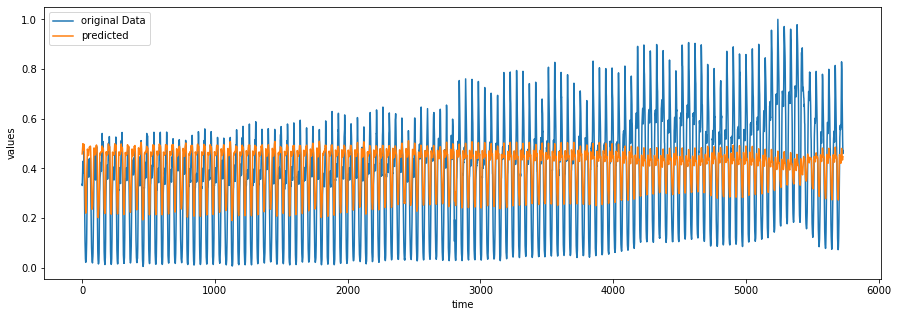

In [50]:
#plot original vs the predicted data
plt.rc('figure', figsize=(15,5))
plt.plot(testY, label ='original Data')
plt.plot(y_pred, label = 'predicted')
plt.xlabel('time')
plt.ylabel('values')
plt.legend()
plt.show()

In [40]:
!pip install h5py

In [0]:
import os
from keras.models import model_from_json

In [0]:
#save best model into json as well as best model weights in h5 format
model_json = model_best.to_json()
with open("/Users/pratik moghe/model_best.json","w") as json_file:
  json_file.write(model_json)
model_best.save_weights("/Users/pratik moghe/model.h5")